In [1]:
from pandas import read_csv, DataFrame
from matplotlib import pyplot
pyplot.rcParams["figure.figsize"] = (20,10)

../../data_set2/data_testing.csv
(1669, 11)


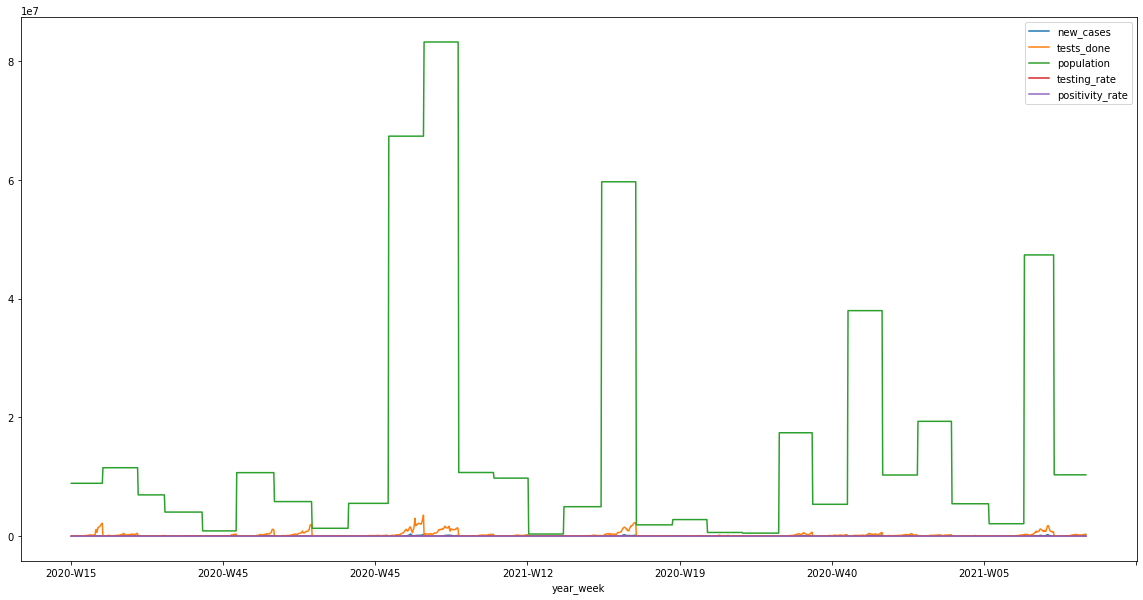

In [14]:
csvs = ['../../data_set2/data_age_based.csv',
        '../../data_set2/data_hospital.csv',
           '../../data_set2/data_response_measures.csv',
               '../../data_set2/data_testing.csv',
           '../../data_set2/data_vaccine.csv']
datasets = []
csv = csvs[3]
data = read_csv(csv, index_col=2, parse_dates=True, squeeze=True)
datasets.append(data)
data.plot()
print(csv)
print(data.shape)
pyplot.show()

In [11]:
dataset_number = 0
country_code = 'AT'

Austria


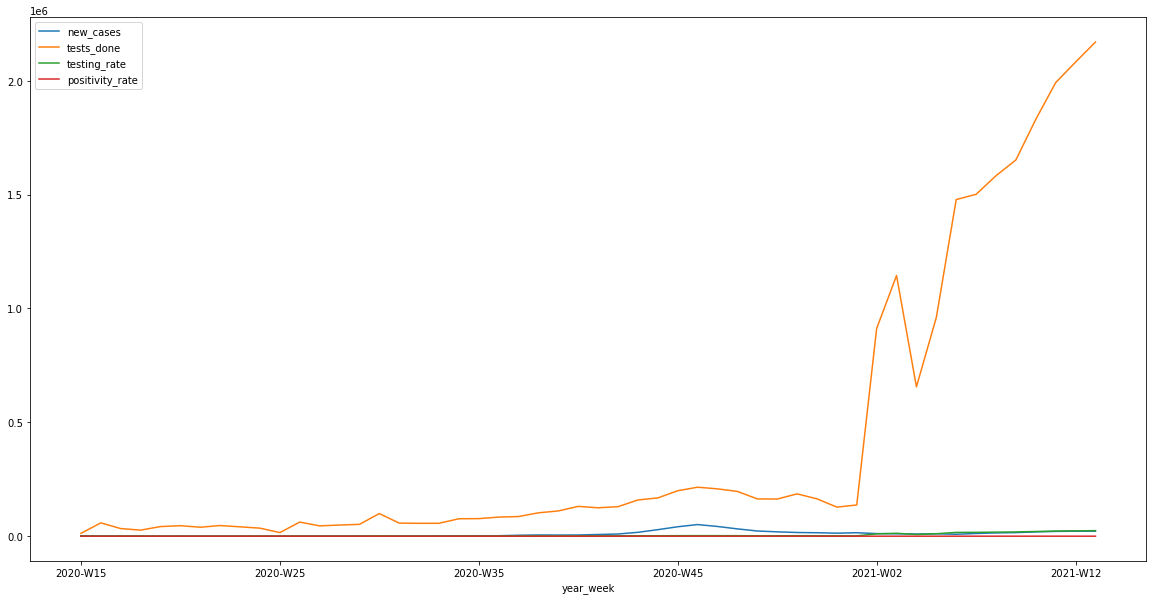

Belgium


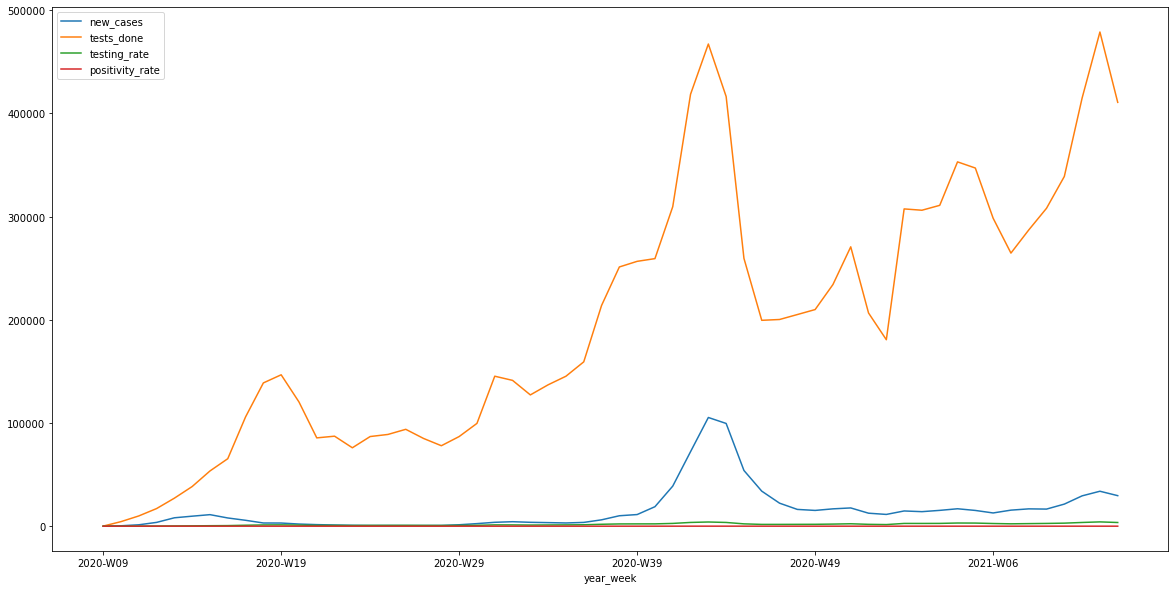

Bulgaria


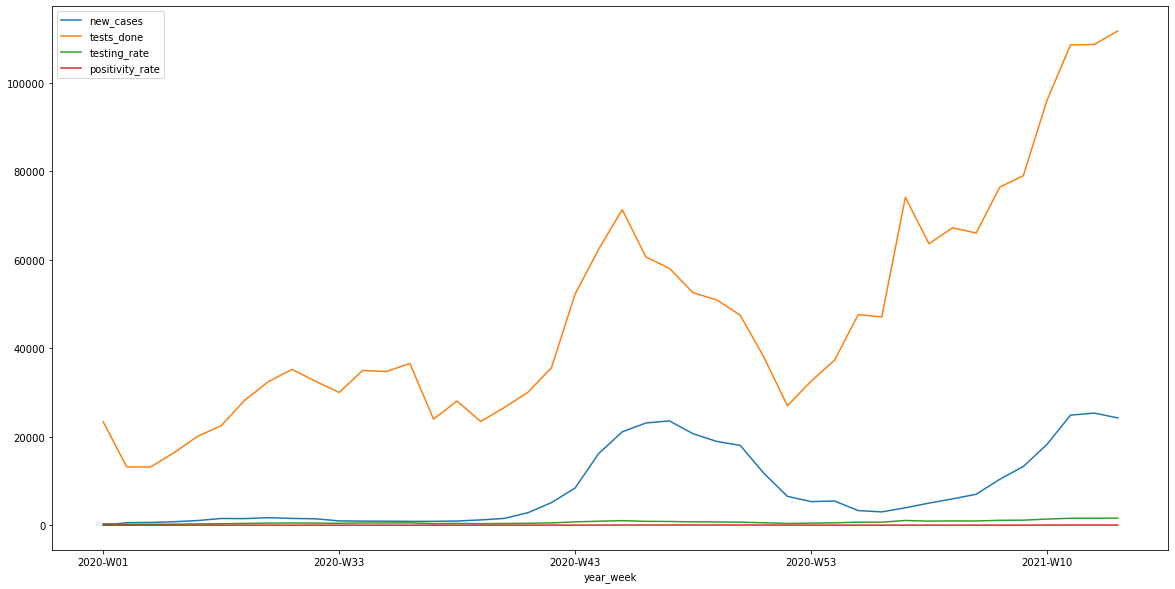

Croatia


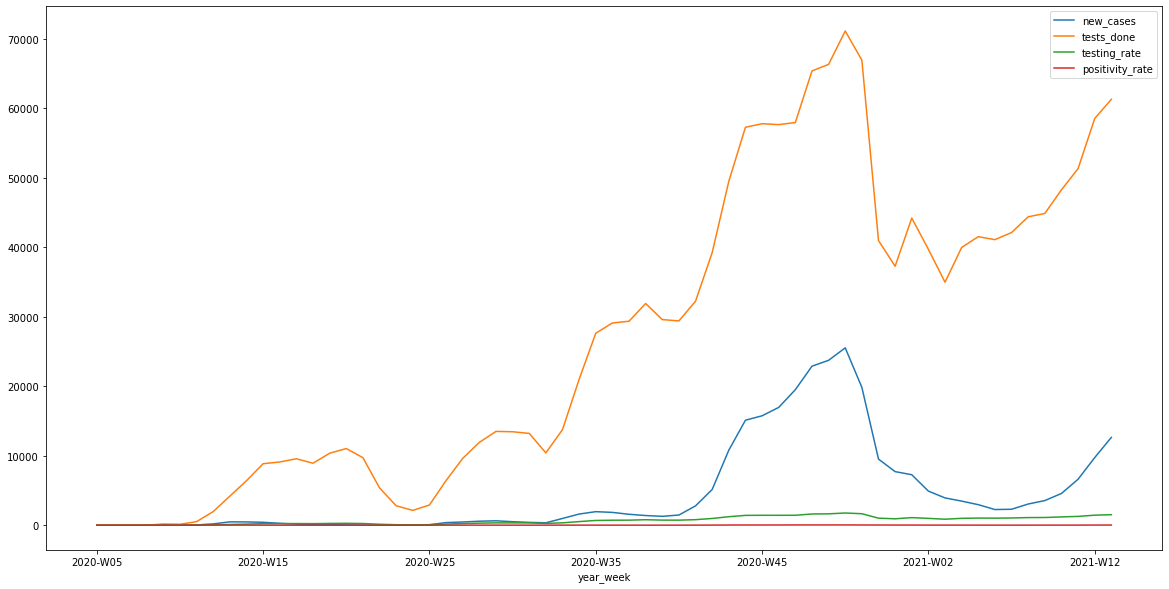

Cyprus


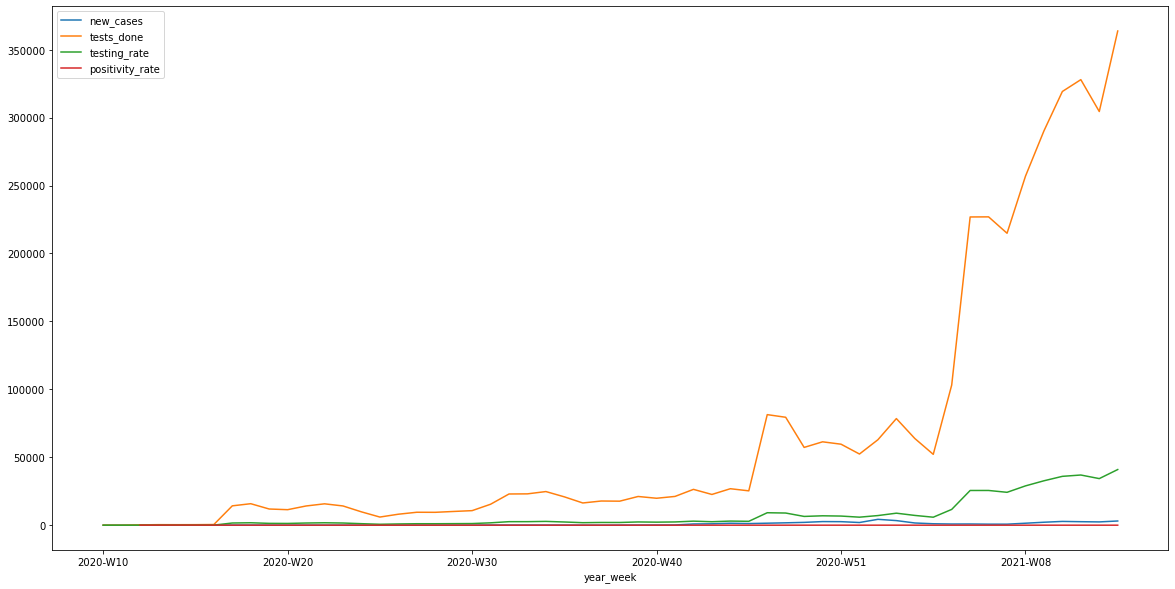

Czechia


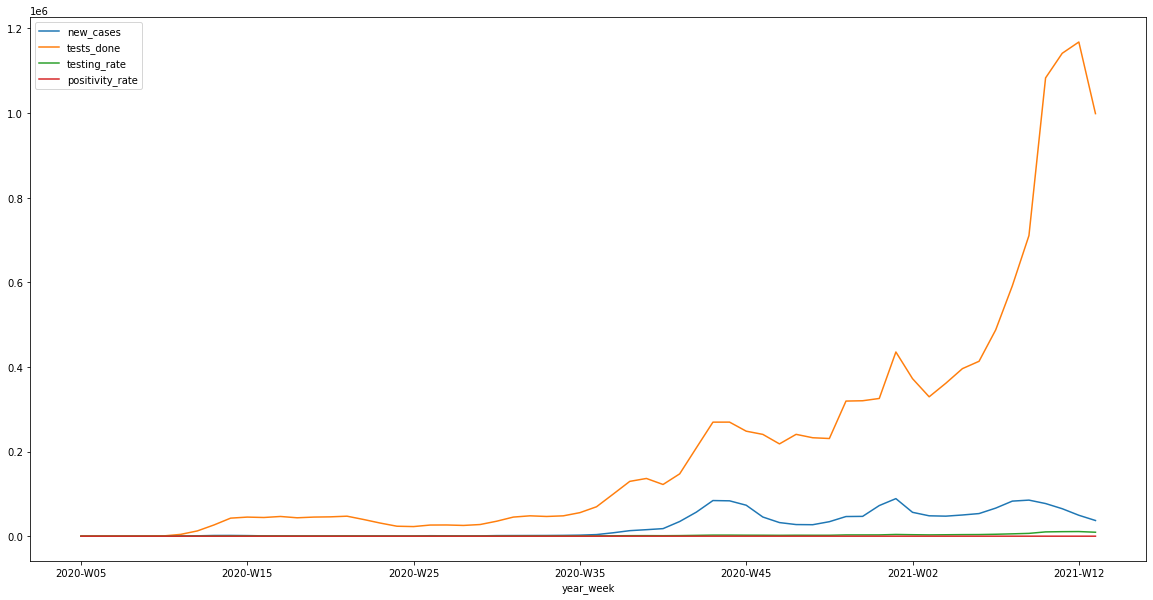

Denmark


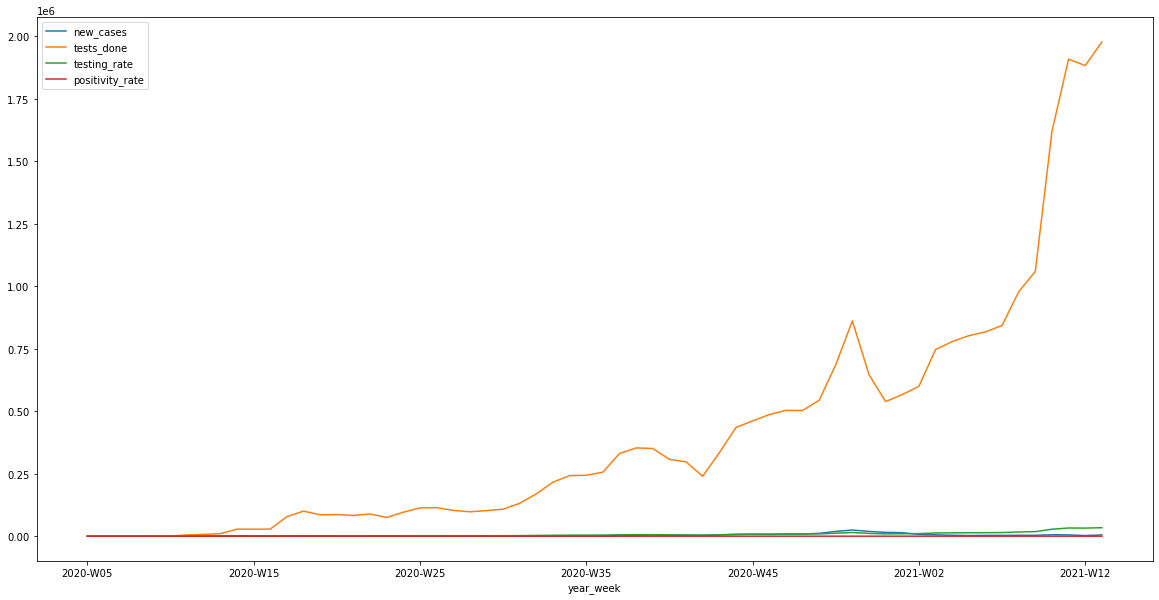

Estonia


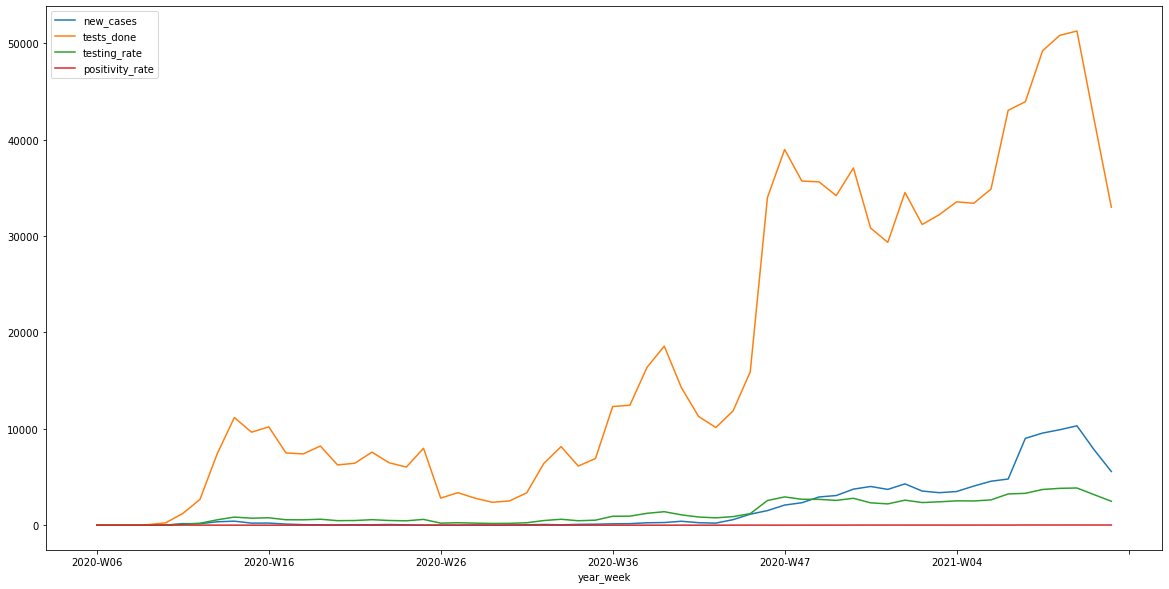

Finland


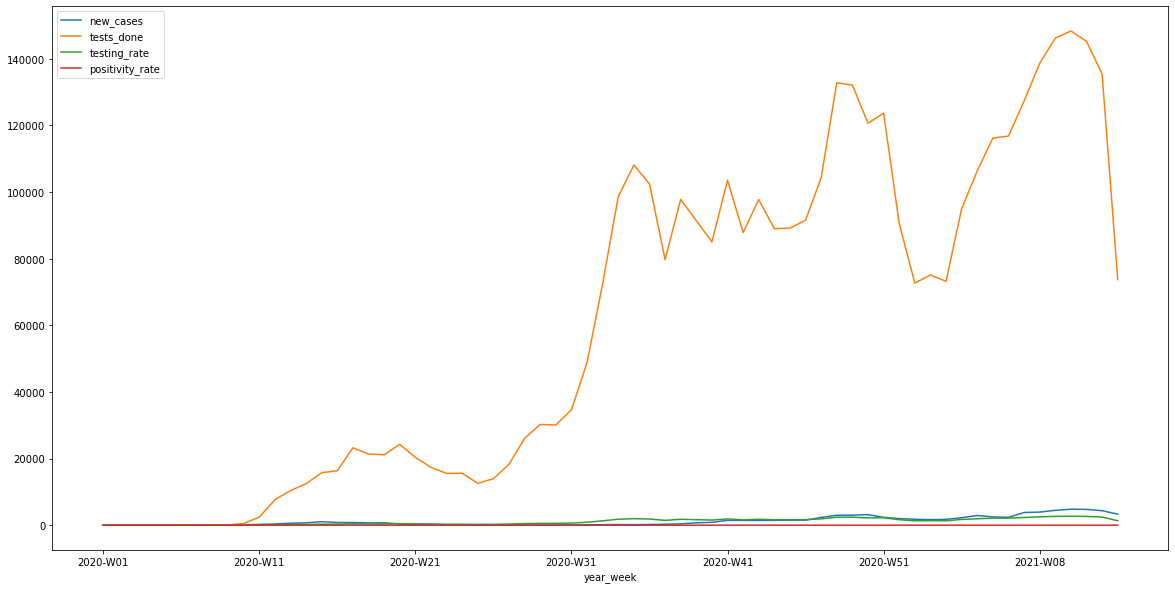

France


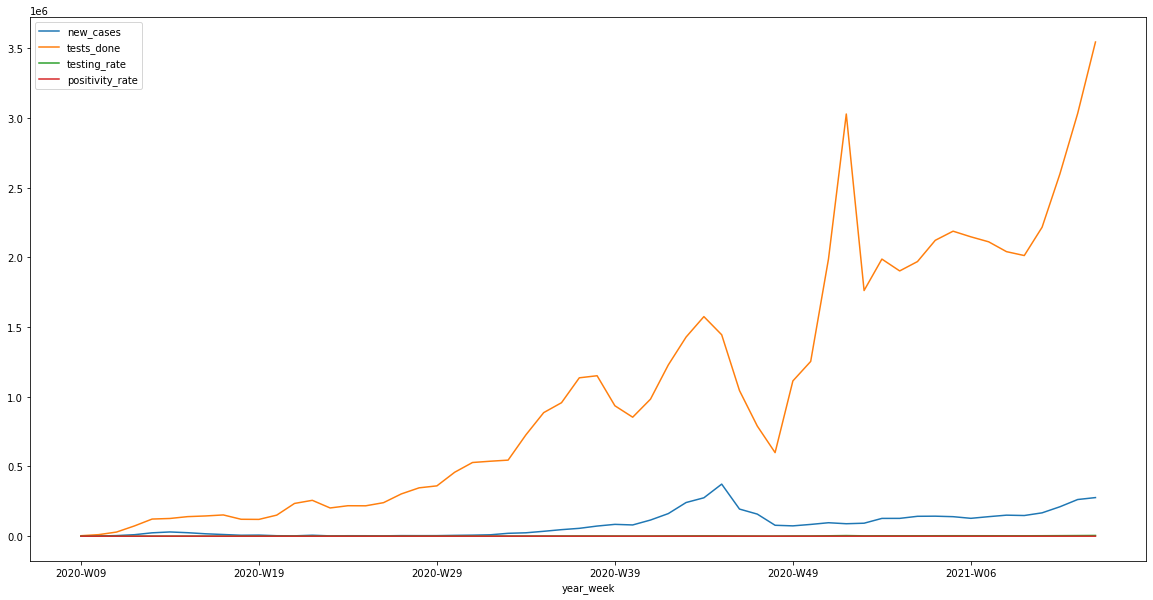

Germany


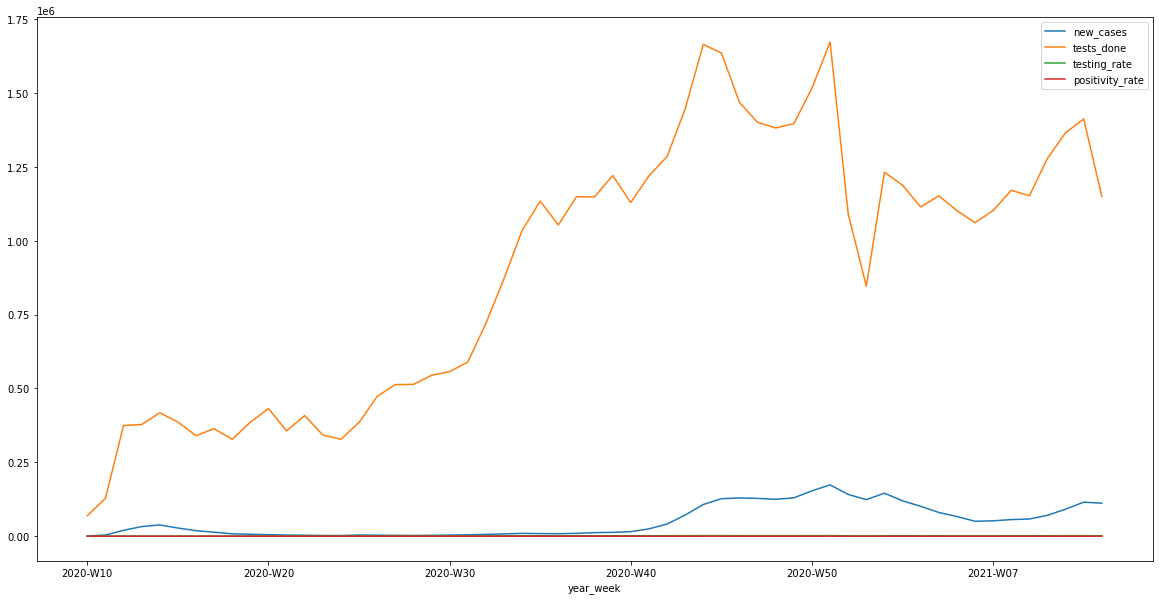

Greece


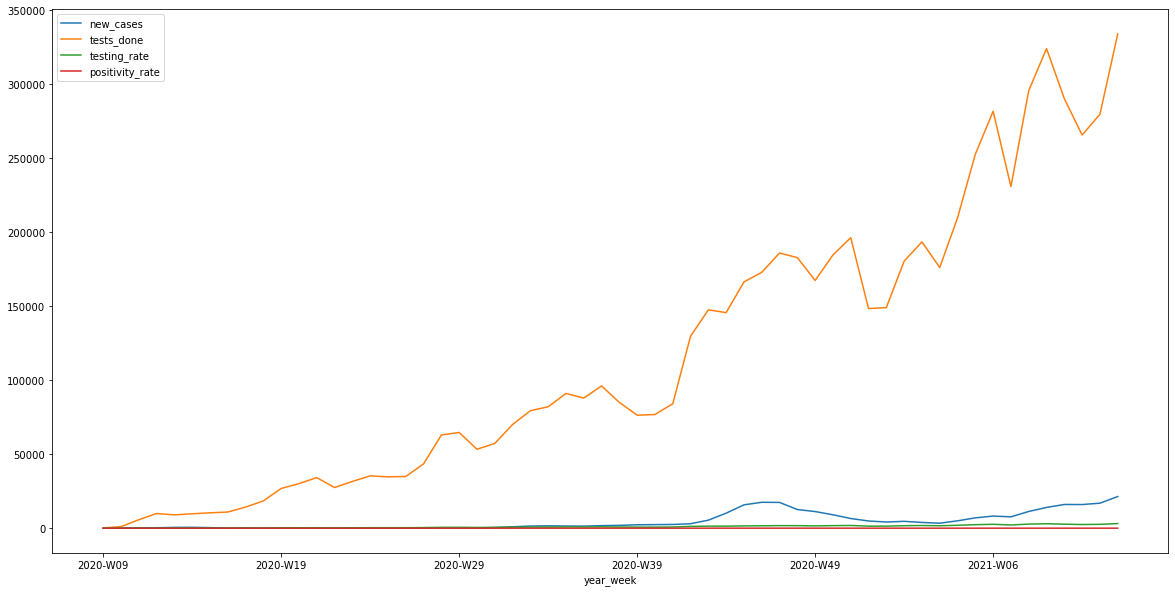

Hungary


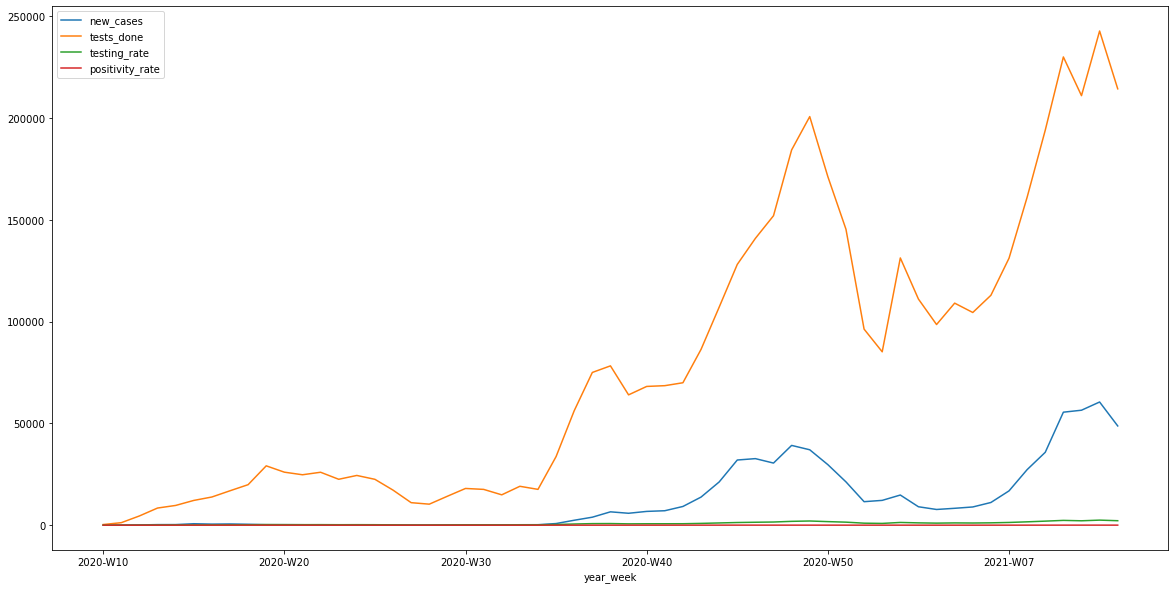

Iceland


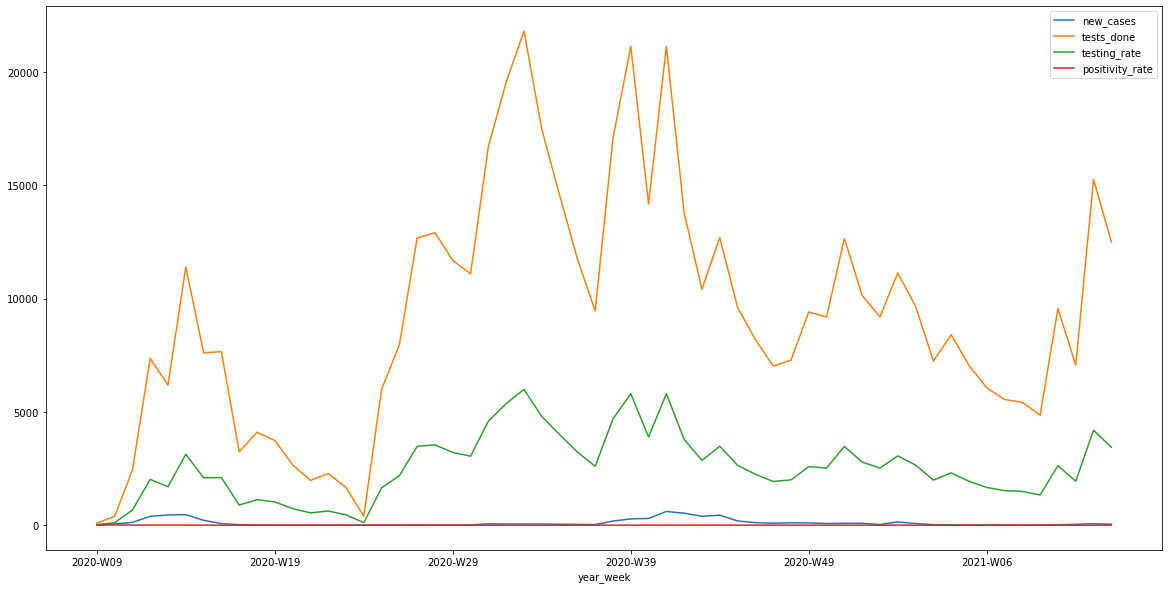

Ireland


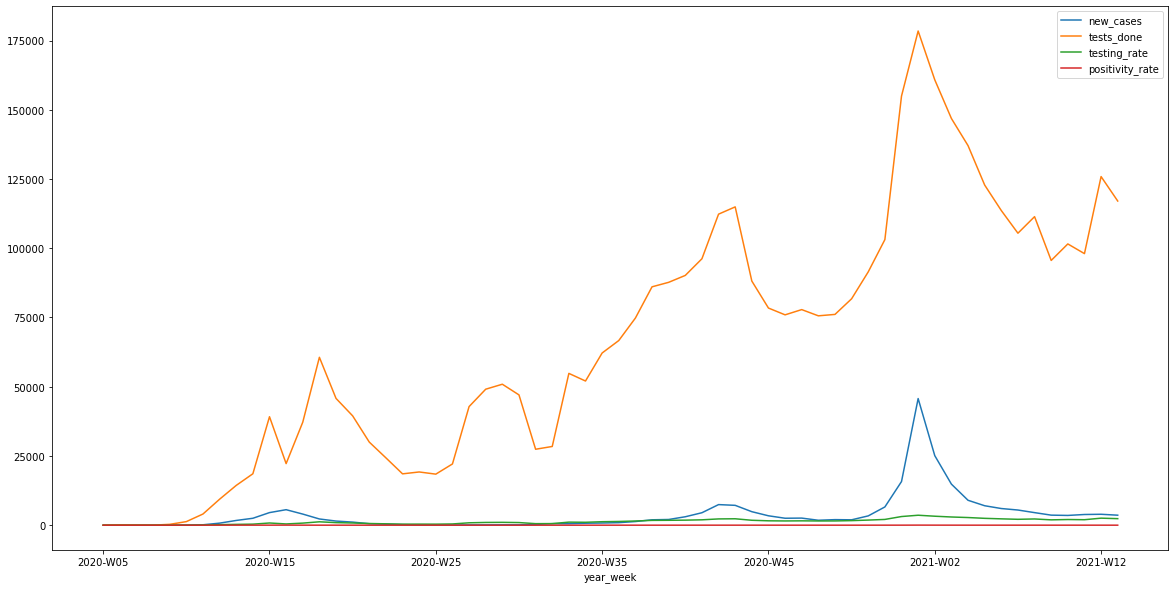

Italy


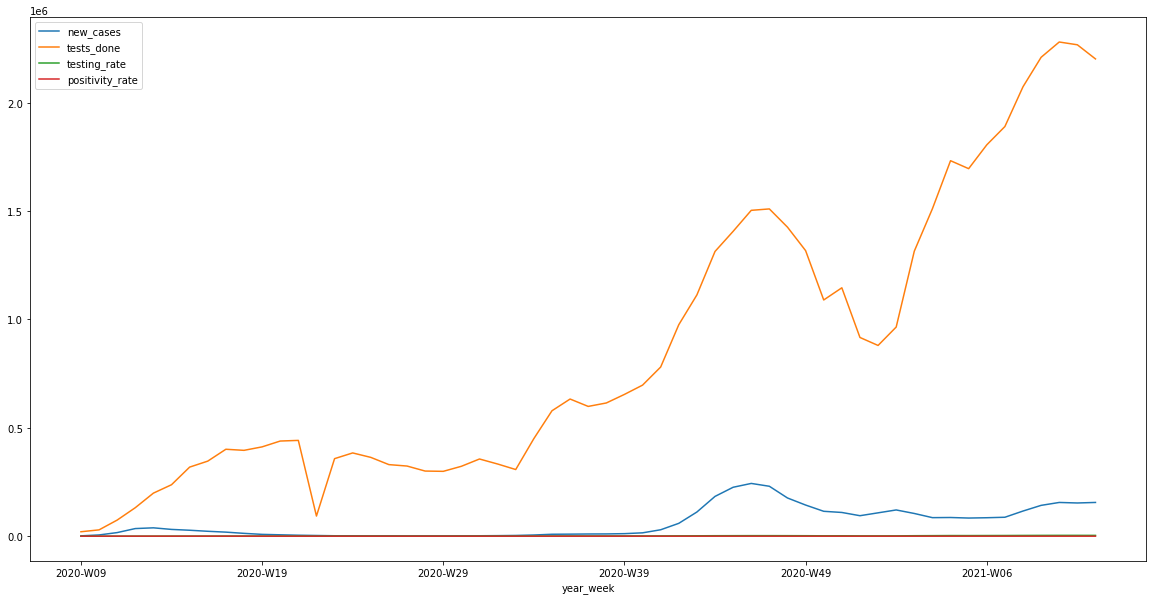

Latvia


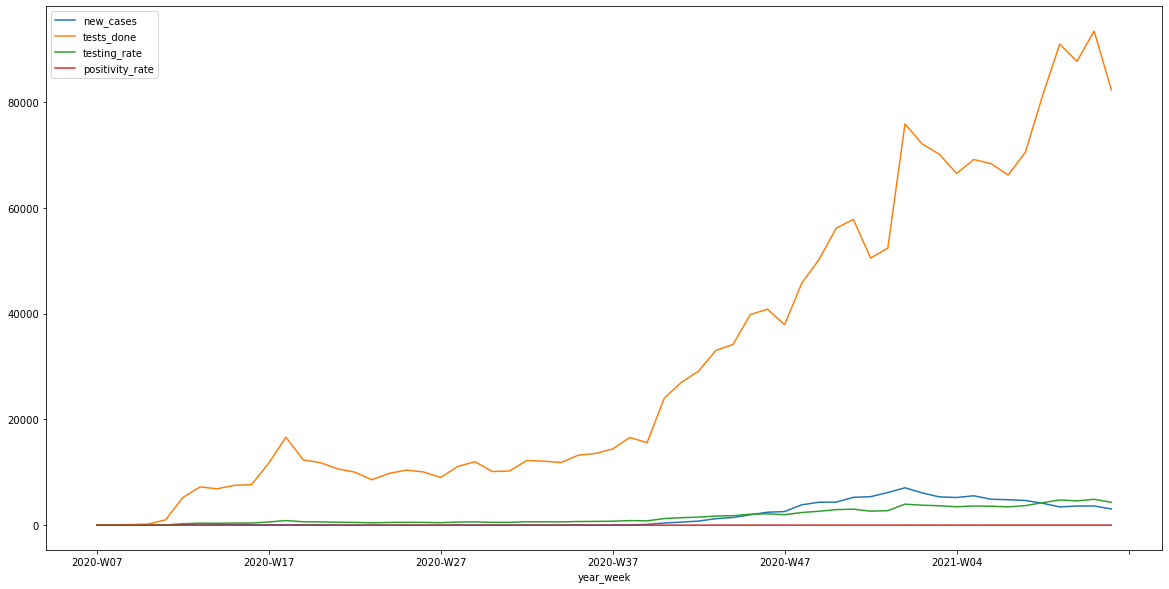

Lithuania


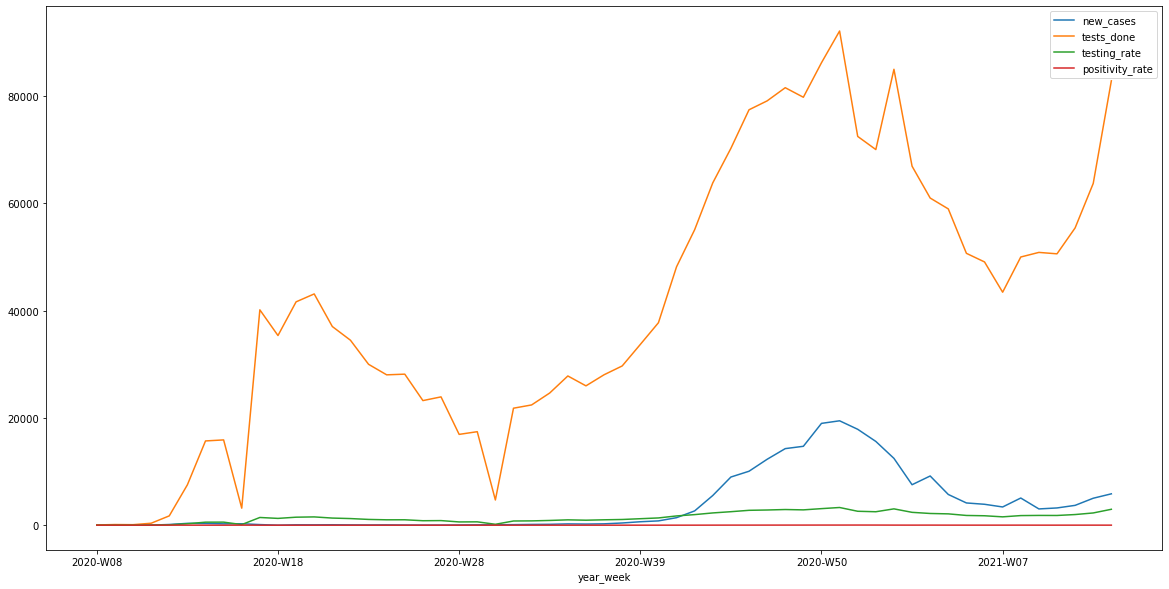

Luxembourg


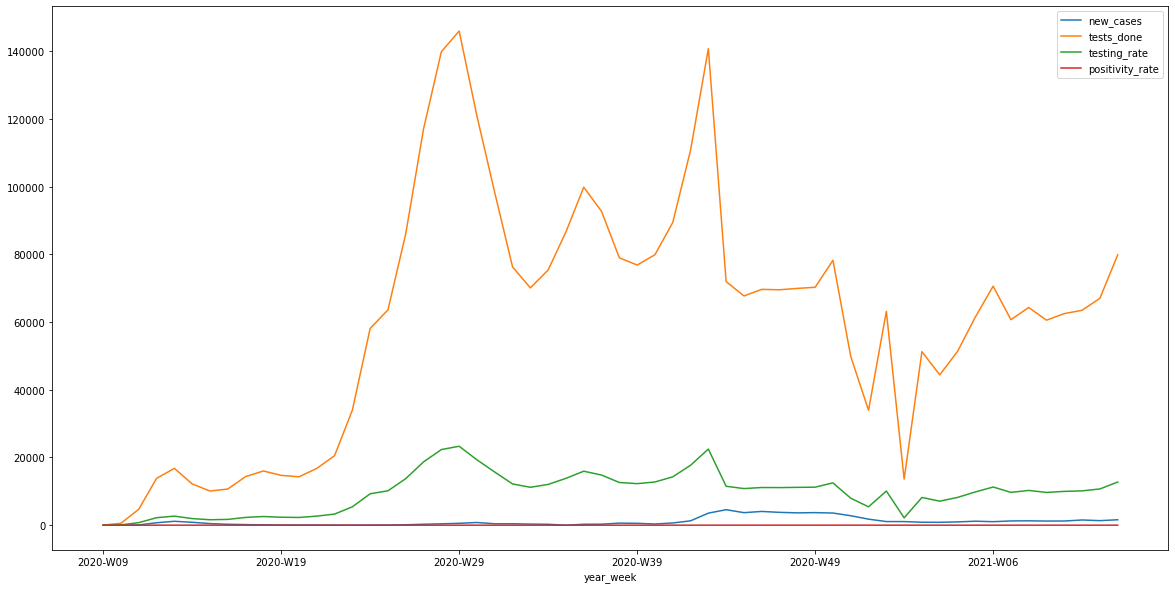

Malta


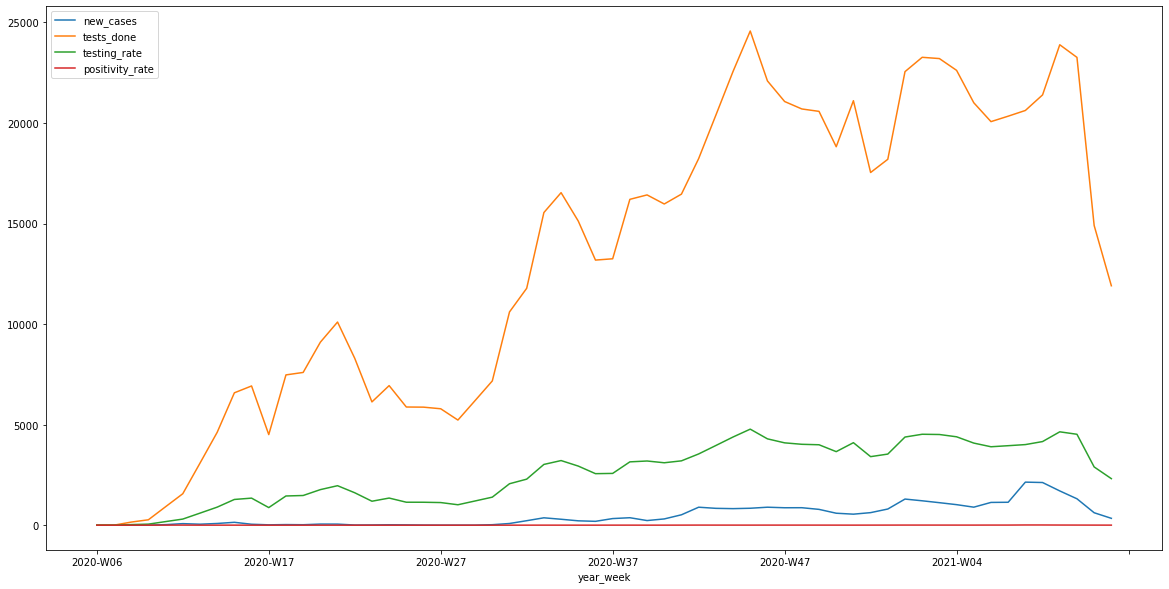

Netherlands


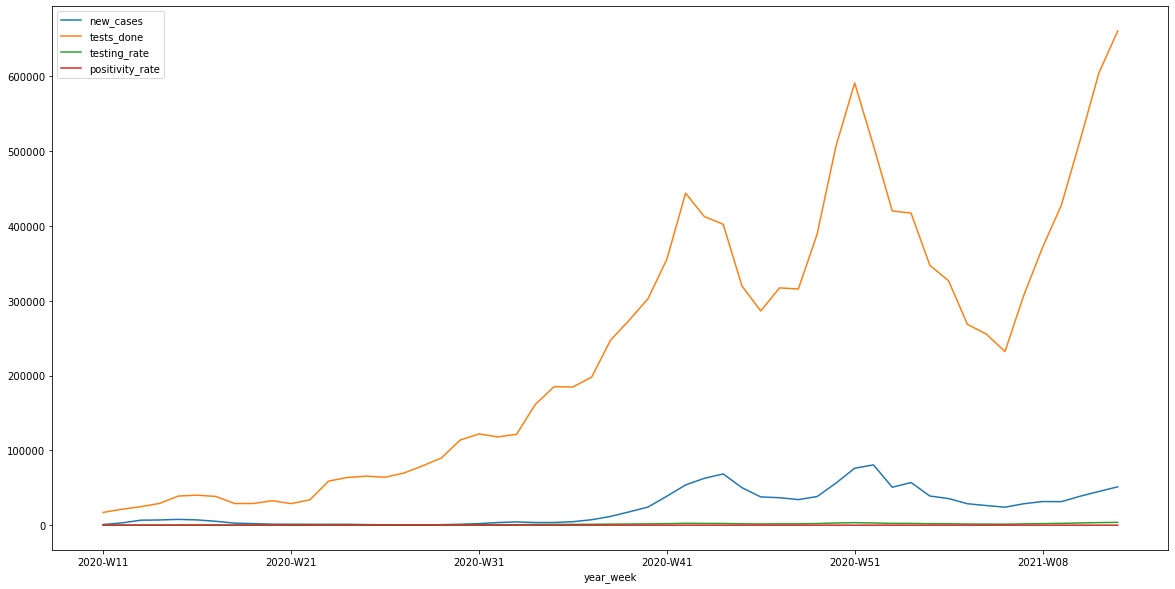

Norway


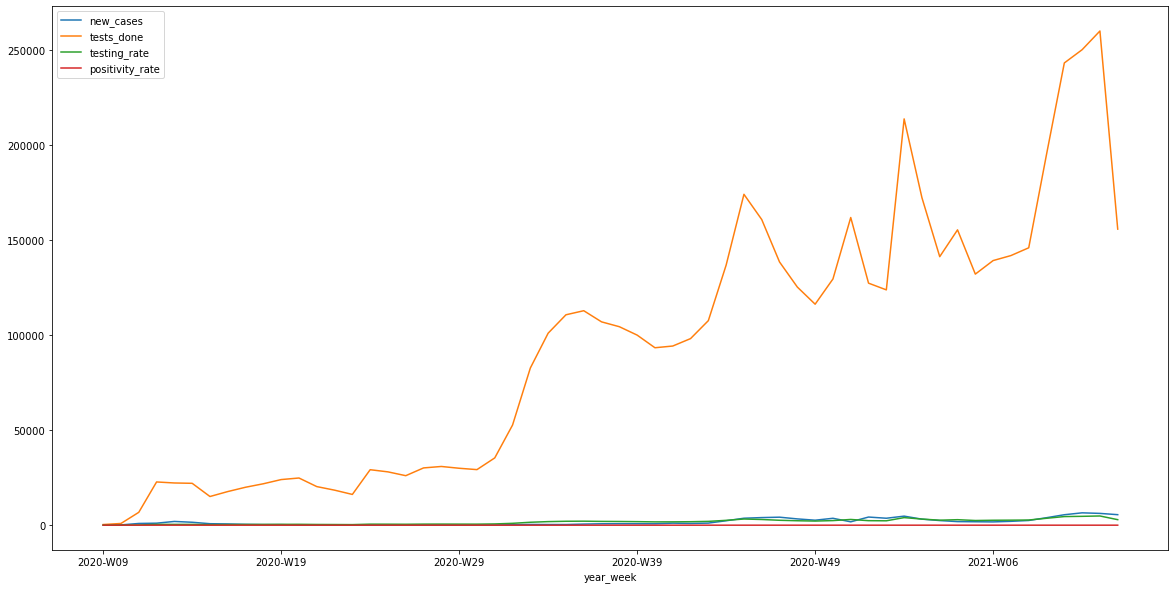

Poland


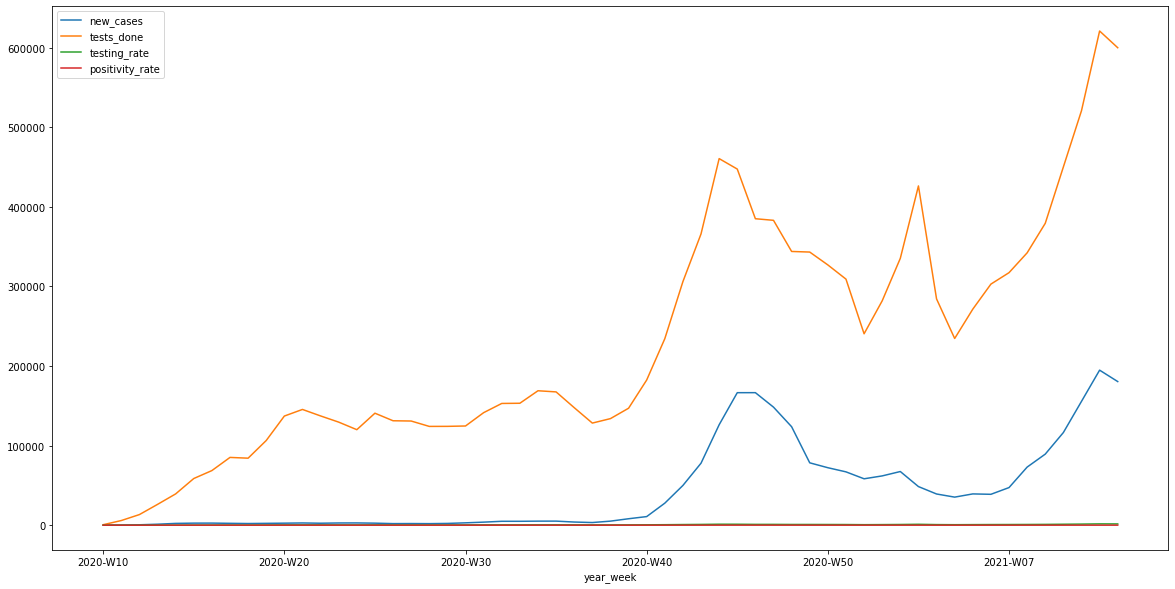

Portugal


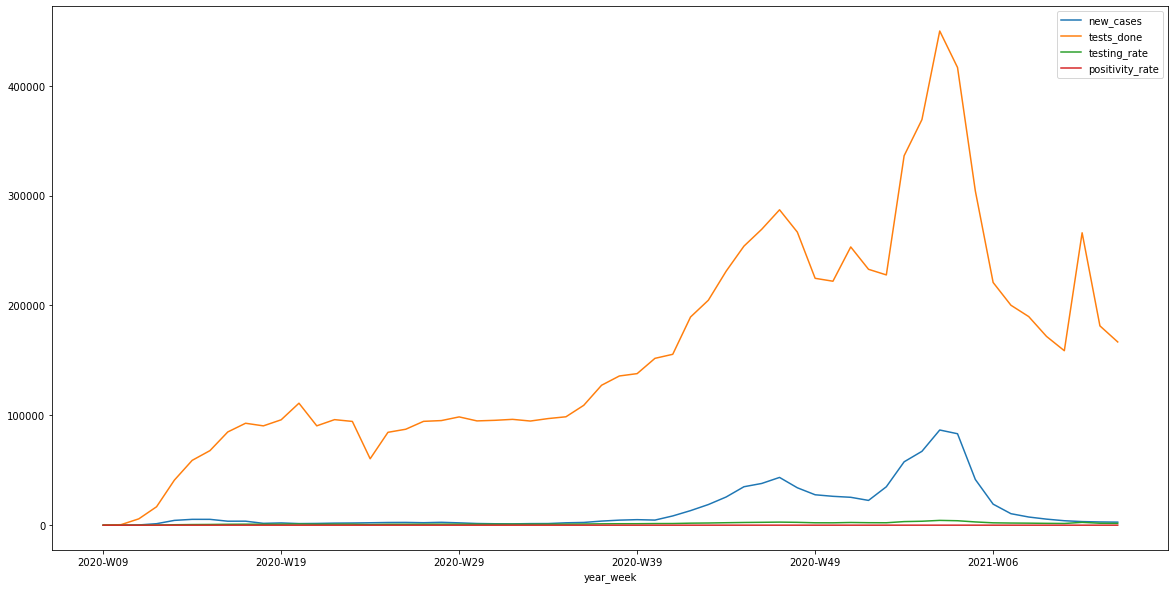

Romania


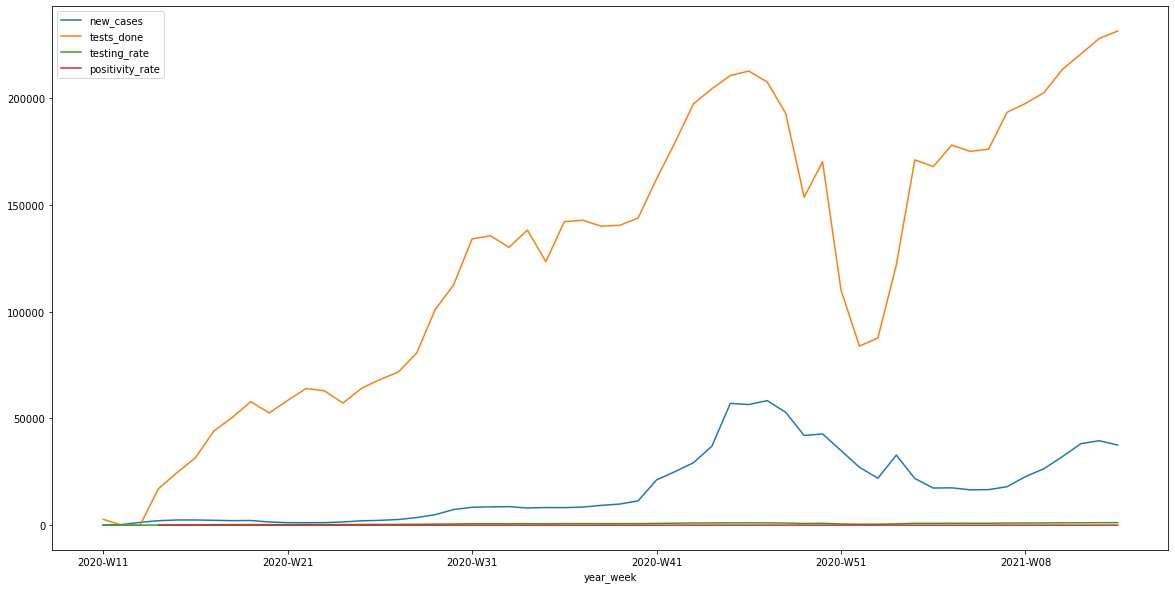

Slovakia


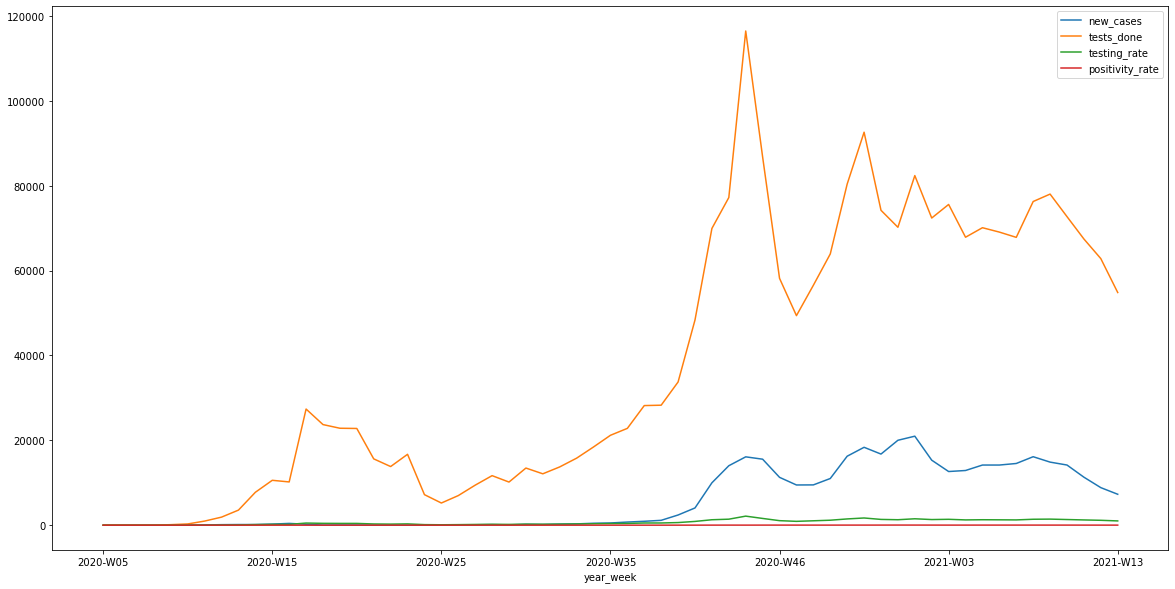

Slovenia


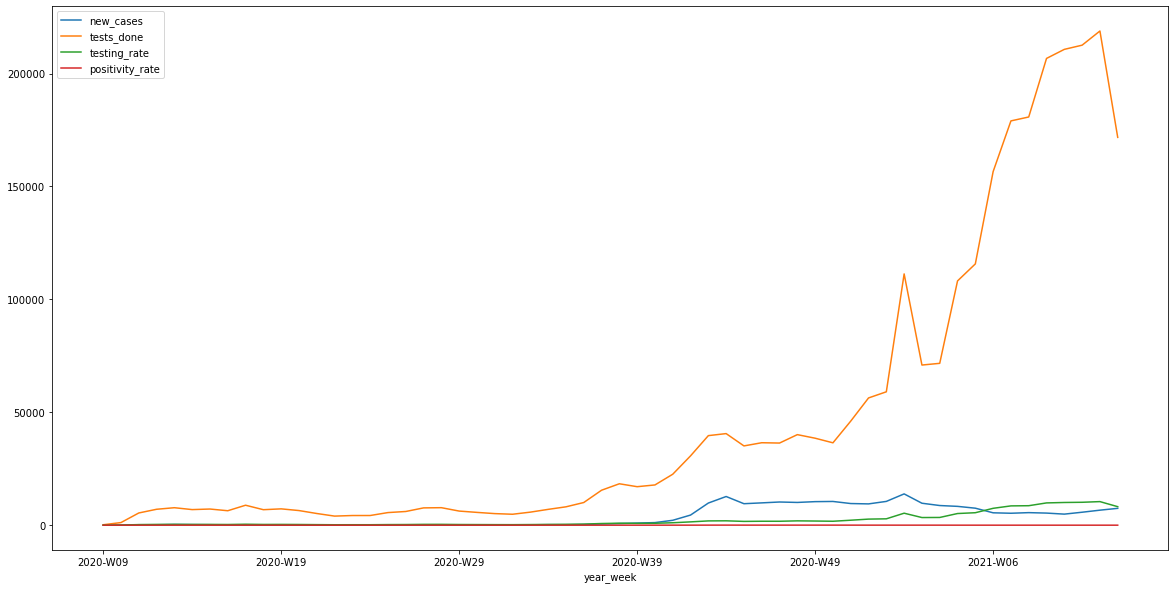

Spain


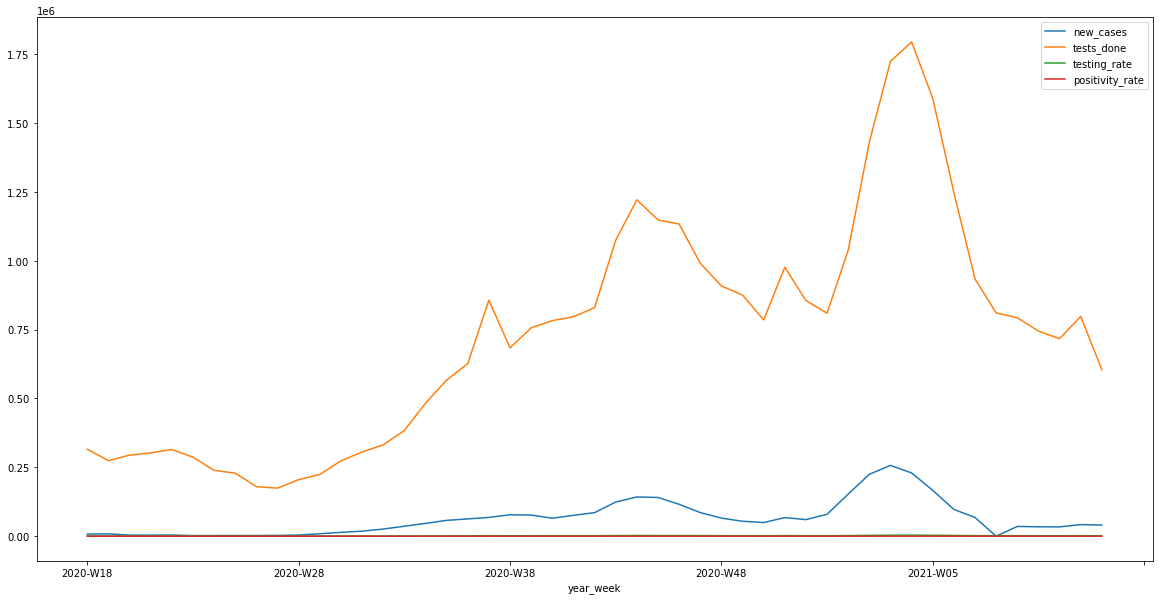

Sweden


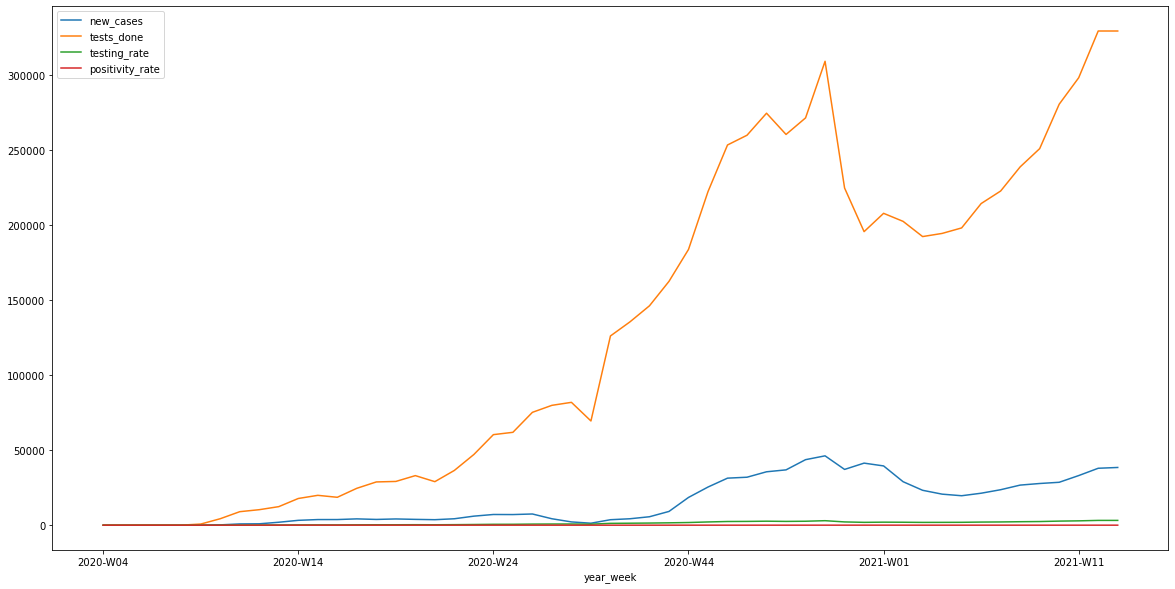

In [16]:
## TODO plot my counntry by dataset
data_orig = datasets[dataset_number]
data = data_orig.copy().drop('population', axis='columns')
countrys = data.groupby(['country'])
for country in countrys:
    print(country[0])
    country[1].plot()
    pyplot.show()

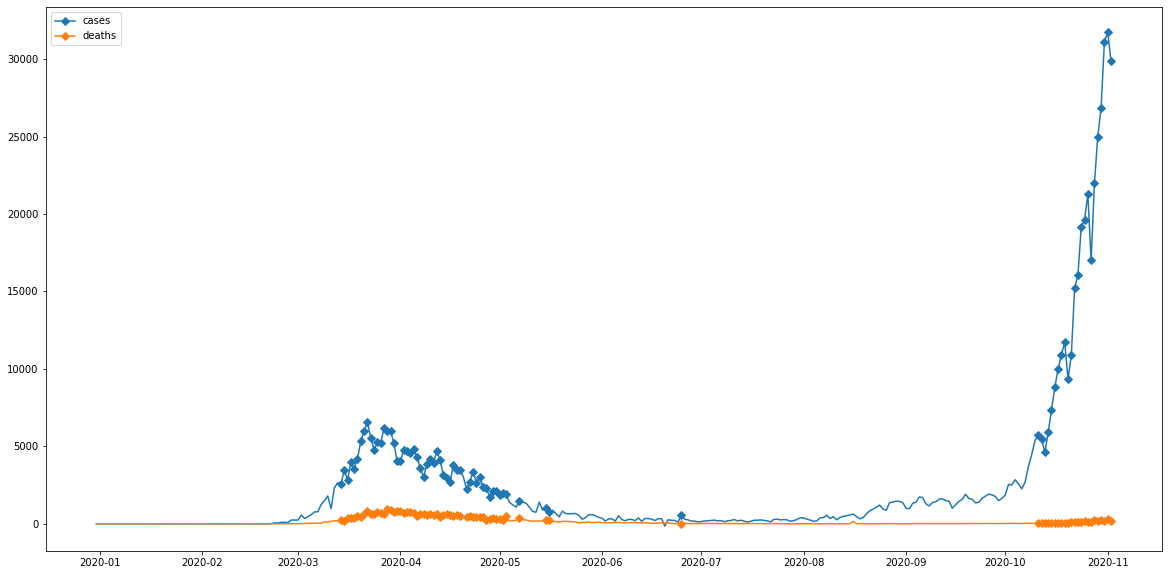

fit on all, predict on all
Number of outliers:
77
CPU times: user 427 ms, sys: 10.2 ms, total: 437 ms
Wall time: 447 ms


In [61]:
%%time
#fit on all, predict on all
from sklearn.ensemble import IsolationForest
dataset = datasets[dataset_number]
dataset_no_country = dataset[dataset['country']==counrty_code].copy().drop('country', axis='columns')
clf = IsolationForest(random_state=0).fit(dataset_no_country)
pred = clf.predict(dataset_no_country)
indices = [index for index, element in enumerate(pred) if element == -1]
pyplot.plot(dataset_no_country, '-D', markevery=indices)
pyplot.legend(['cases', 'deaths'])
pyplot.show()
print("fit on all, predict on all")
print("Number of outliers:")
print(len(indices))

In [32]:
def split_dataframe(df, chunk_size = 100): 
    chunks = list()
    num_chunks = len(df) // chunk_size + 1
    for i in range(num_chunks):
        chunk = df[i*chunk_size:(i+1)*chunk_size]
        if len(chunk) > 0:
            chunks.append(chunk)
    return chunks

def join_dataframe(list_of_datraframes):
    df = DataFrame()
    for dataframe in list_of_datraframes:
        df = df.append(dataframe)
    return df

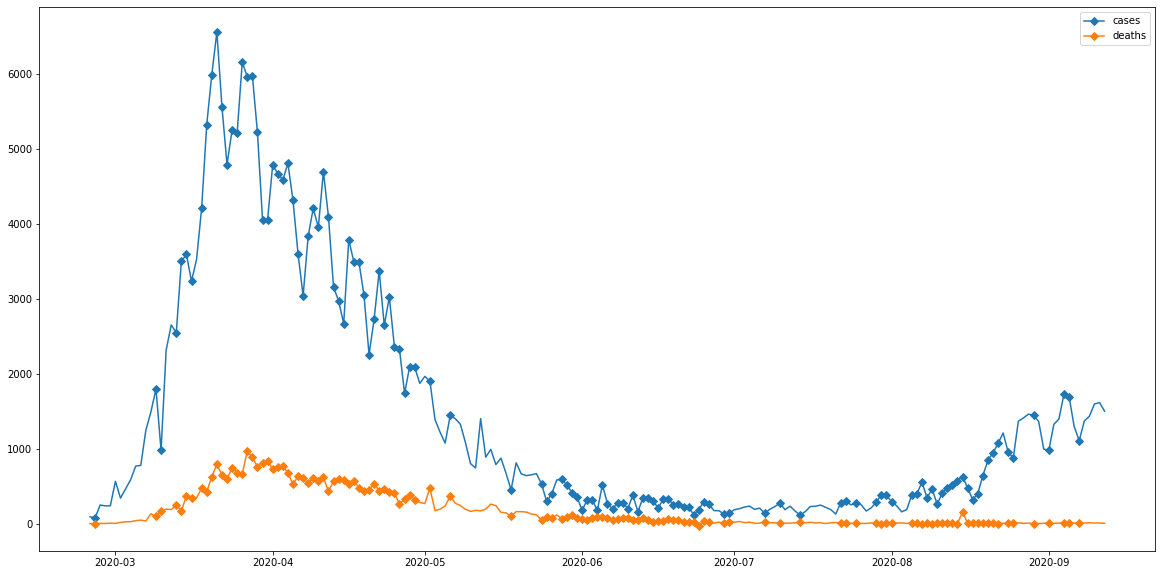

CPU times: user 849 ms, sys: 15.8 ms, total: 864 ms
Wall time: 870 ms


In [33]:
%%time
#fit on half a period, predict on period, period == chunck_size
from sklearn.ensemble import IsolationForest
dataset = datasets[dataset_number]
dataset_no_country = dataset[dataset['country']==country_code].copy().drop('country', axis='columns')
#split in chuncks of x days
fit_size = 30
chunck_size = fit_size * 2
chuncks = split_dataframe(dataset_no_country, chunck_size)
pred = []
for chunck in chuncks:
    time_frame = split_dataframe(chunck, fit_size)
    clf = IsolationForest(random_state=0).fit(time_frame[0])
    pred.extend(clf.predict(chunck).tolist())
# -1 is an anomaly and 1 is ok
indices = [index for index, element in enumerate(pred) if element == -1]
pyplot.plot(dataset_no_country, '-D', markevery=indices)
pyplot.legend(['cases', 'deaths'])
pyplot.show()

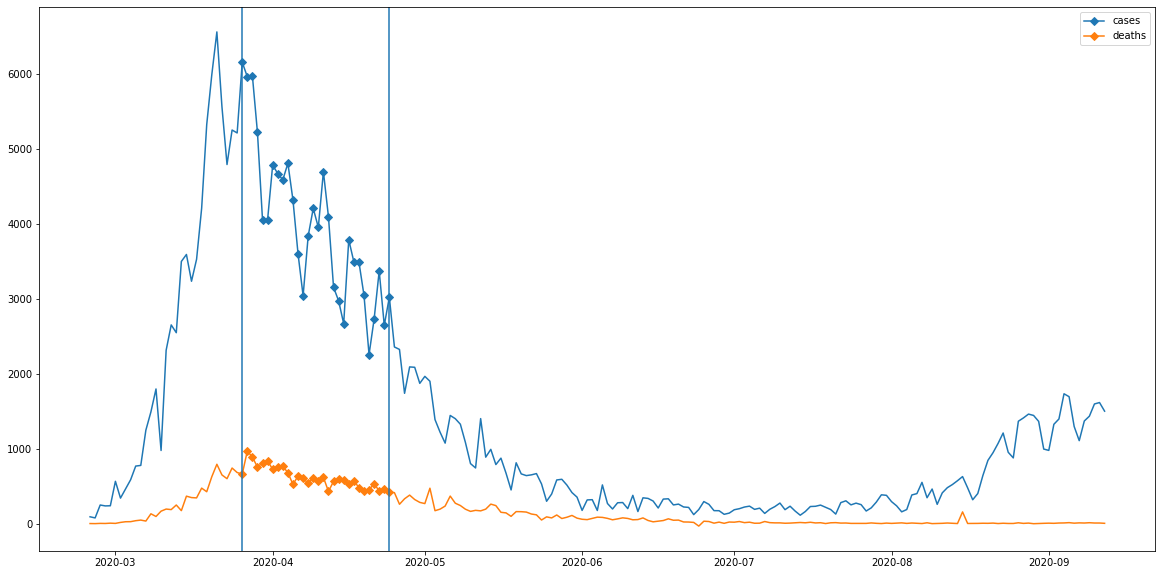

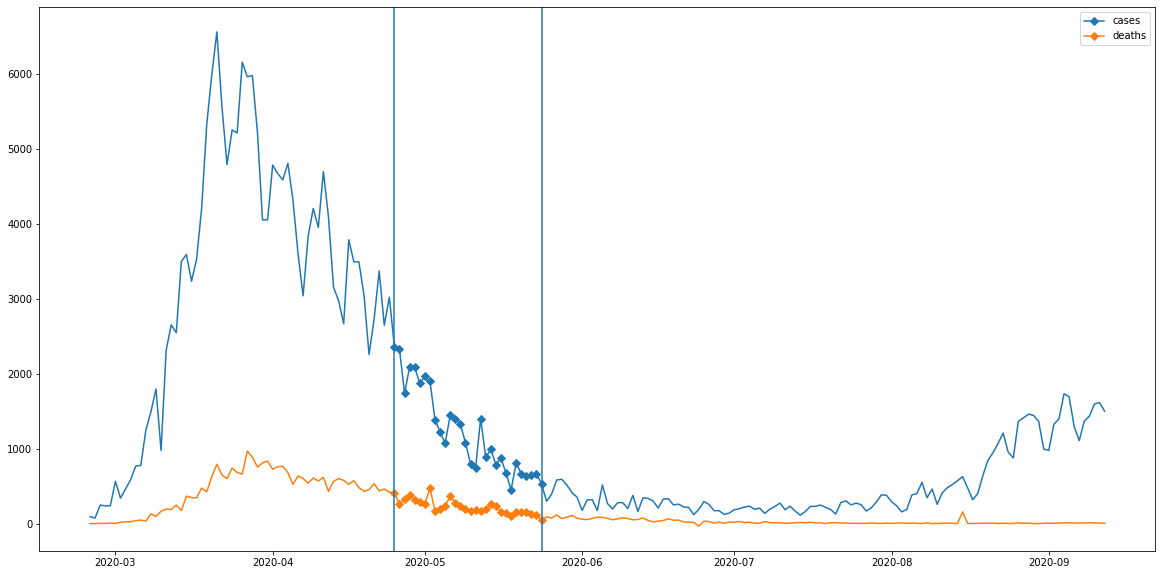

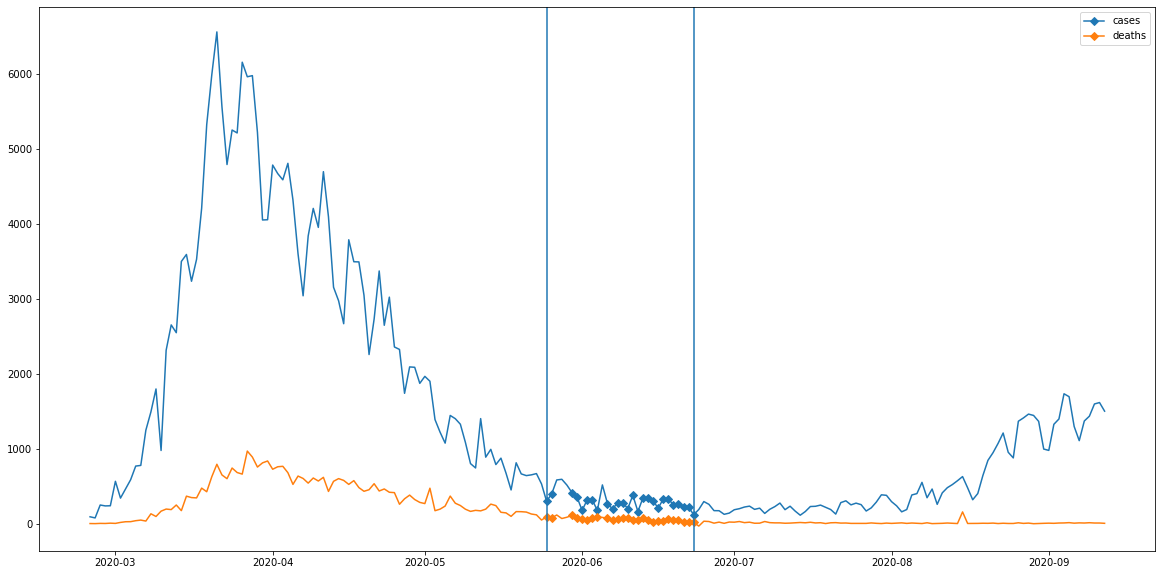

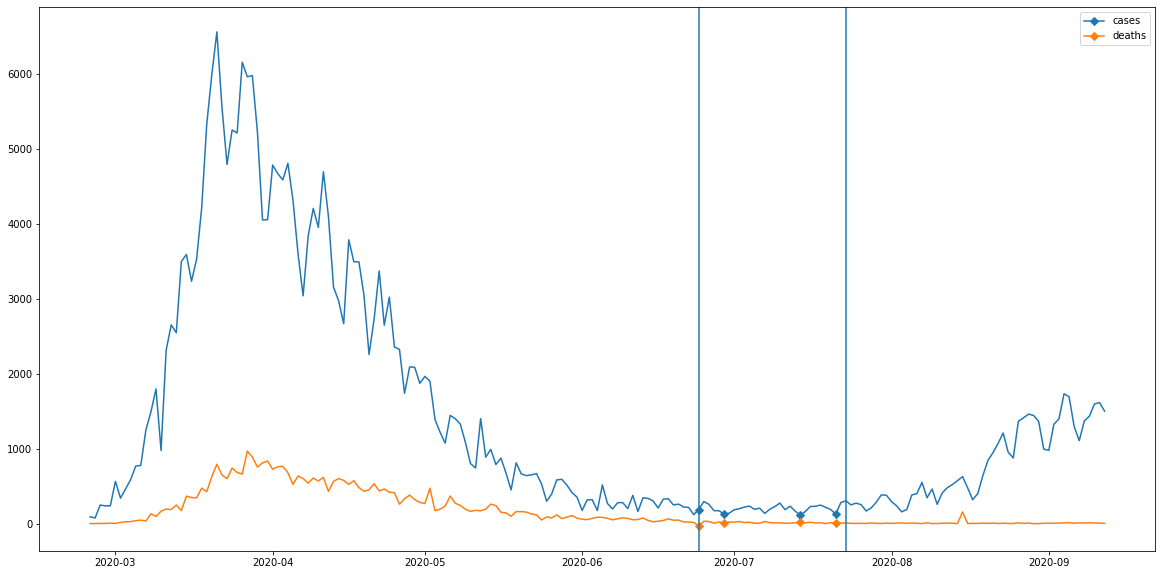

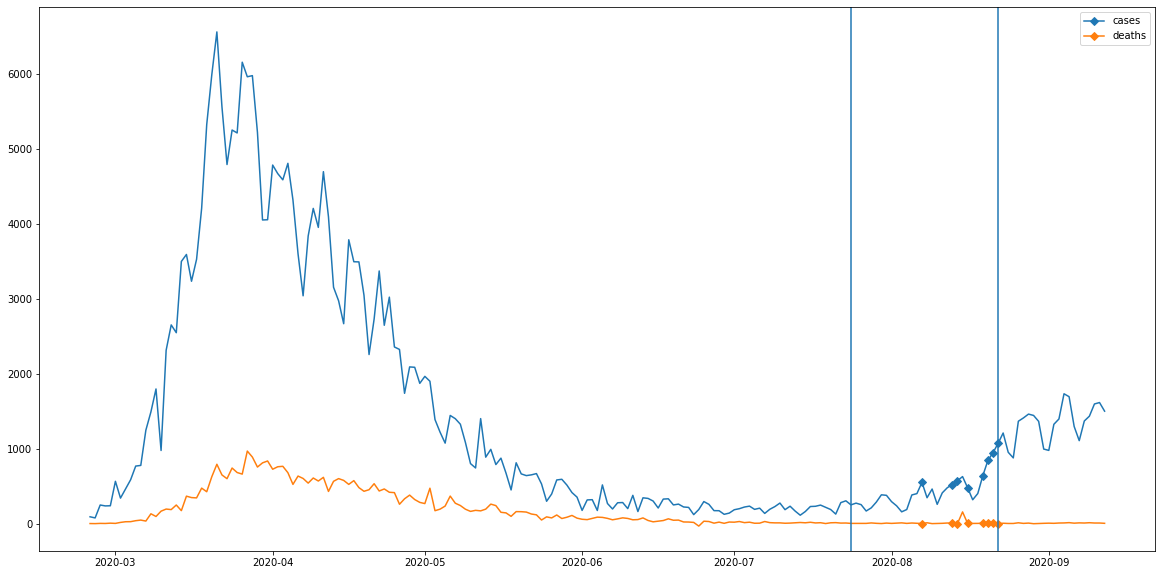

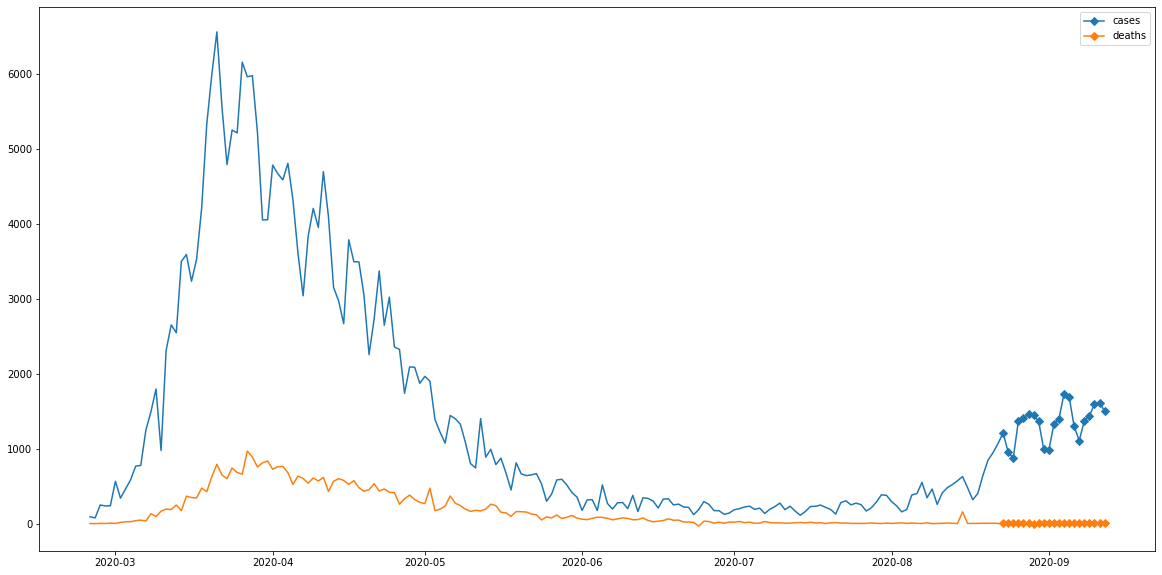

overlapped
total outliers: 119


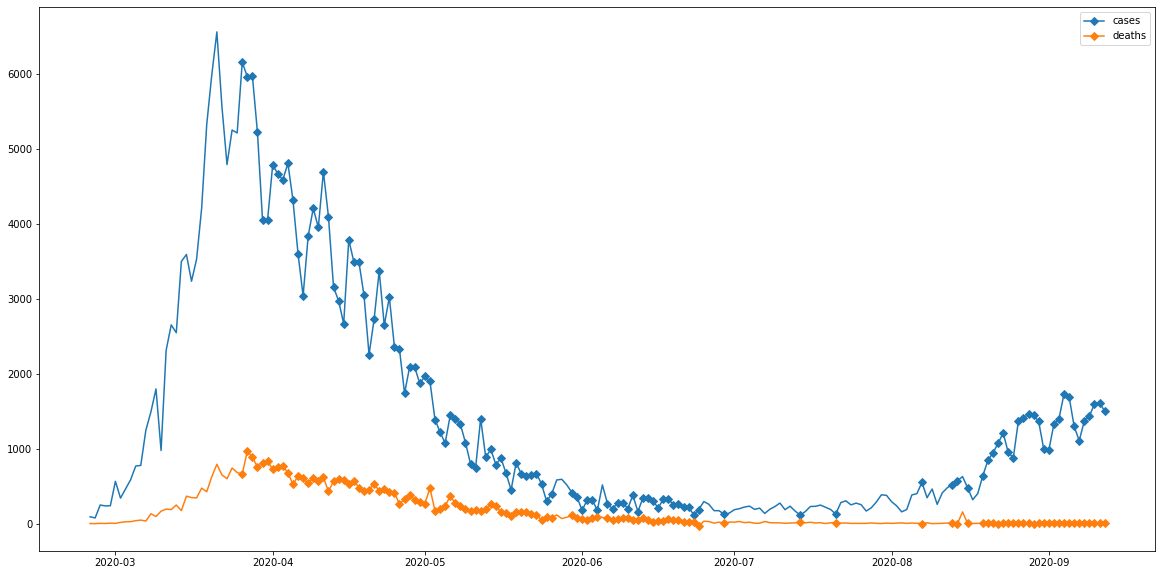

CPU times: user 2.73 s, sys: 582 ms, total: 3.32 s
Wall time: 2.36 s


In [34]:
%%time
#fit on past, predict on current month
from sklearn.ensemble import IsolationForest
dataset = datasets[dataset_number]
dataset_no_country = dataset[dataset['country']==country_code].copy().drop('country', axis='columns')
#split in chuncks of x days
chunck_size = 30
chuncks = split_dataframe(dataset_no_country, chunck_size)
total_indices = []
for index, current in enumerate(chuncks[1:], start=1):
    until_current = join_dataframe(chuncks[:index])
    clf = IsolationForest(random_state=0).fit(until_current)
    pred = clf.predict(current).tolist()
    indices = [num + index * chunck_size for num, element in enumerate(pred) if element == -1]
    total_indices.extend(indices)
    vertical_marks = []
    pyplot.plot(dataset_no_country, '-D', markevery=indices)
    try:
        start_incides = index * chunck_size
        end_incides = ( index + 1 ) * chunck_size - 1 
        vertical_marks = [dataset_no_country.iloc[start_incides].name, dataset_no_country.iloc[end_incides].name]
        pyplot.axvline(x=vertical_marks[0])
        pyplot.axvline(x=vertical_marks[1])
    except:
        pass
    pyplot.legend(['cases', 'deaths'])
    pyplot.show()
    
print("overlapped")
print(f"total outliers: {len(total_indices)}")
pyplot.plot(dataset_no_country, '-D', markevery=total_indices)
pyplot.legend(['cases', 'deaths'])
pyplot.show()

In [35]:
## DEPRECATED
# %%time
# from datetime import datetime
# def to_epoch(value: str):
#     return datetime.timestamp(value)

# from pandas import Series
# #fit on all, predict on all + use time as input
# from sklearn.ensemble import IsolationForest
# dataset = datasets[2]
# dataset_no_country = dataset[dataset['country']=='ITA'].copy().drop('country', axis='columns')
# dataset_with_time = dataset_no_country.copy()
# dataset_with_time['time']= dataset_with_time.index.values
# dataset_with_time['time'] = dataset_with_time['time'].map(to_epoch)
# clf = IsolationForest(random_state=0).fit(dataset_with_time)
# pred = clf.predict(dataset_with_time)
# indices = [index for index, element in enumerate(pred) if element == -1]
# pyplot.plot(dataset_no_country, '-D', markevery=indices)
# pyplot.show()
# print("fit on all, predict on all + use time as input")
# dataset_no_country.head()
# print("Number of outliers:")
# print(len(indices))

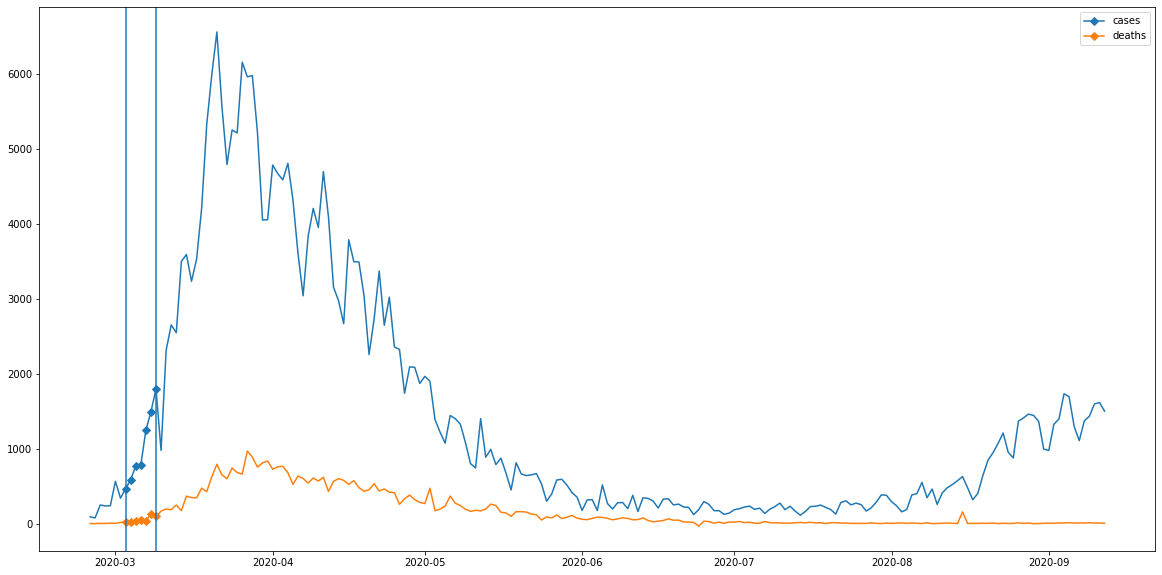

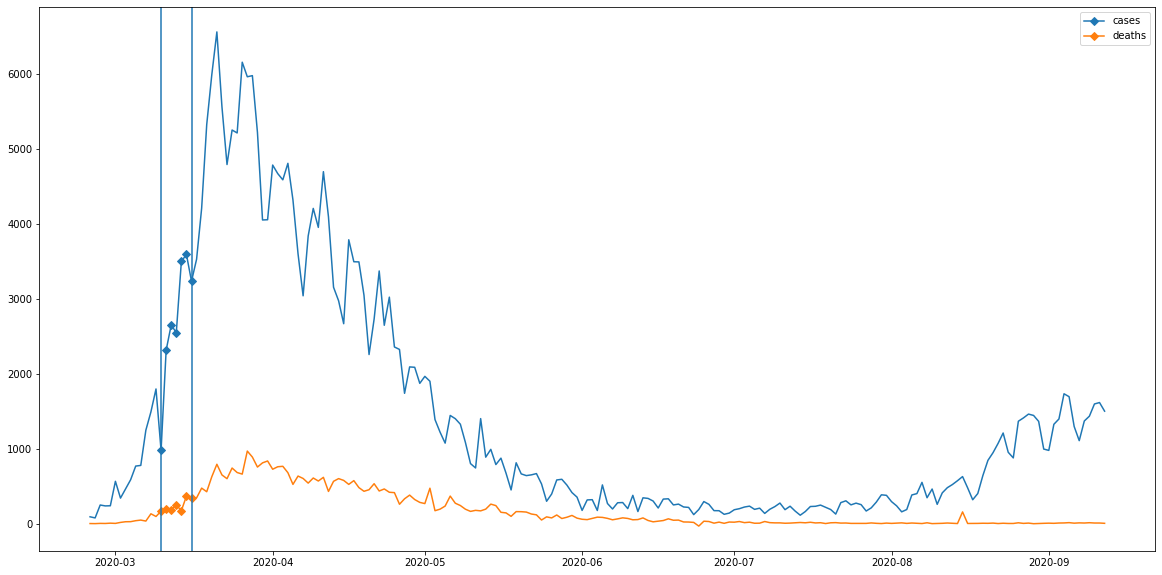

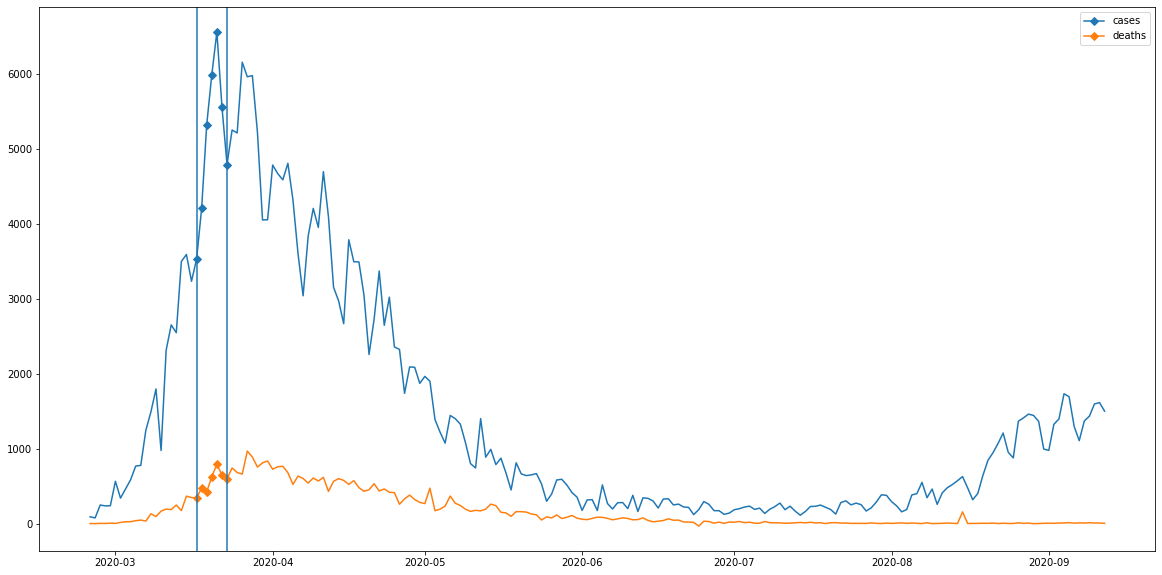

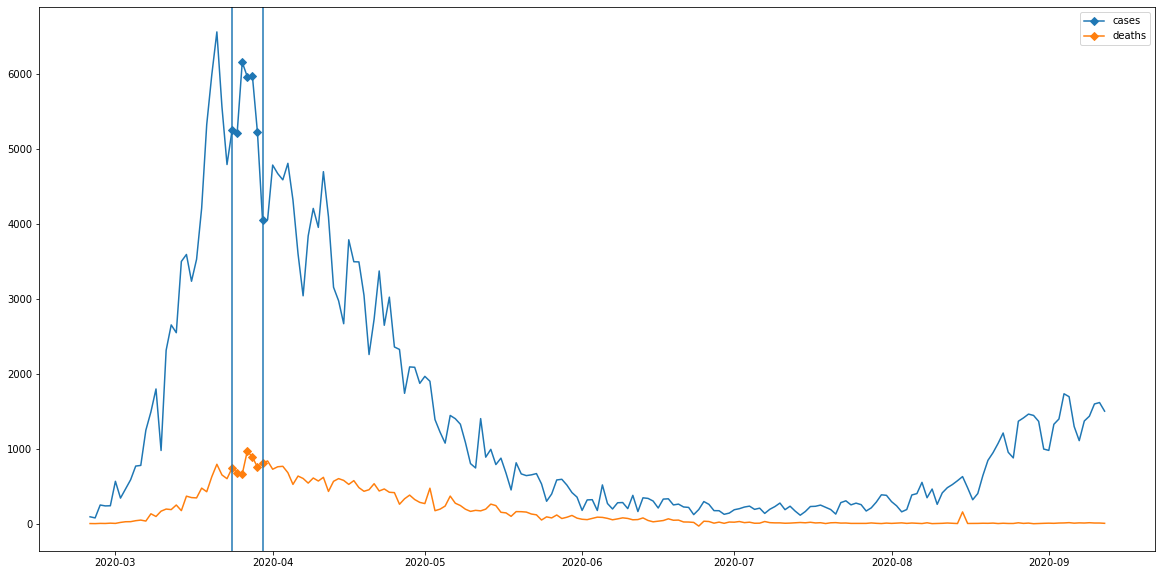

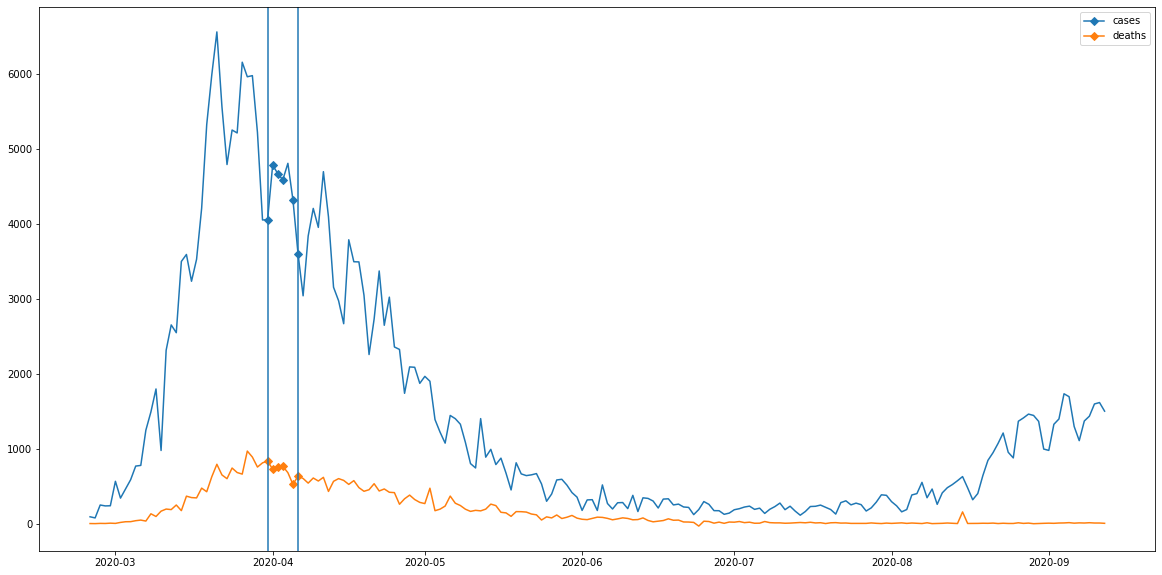

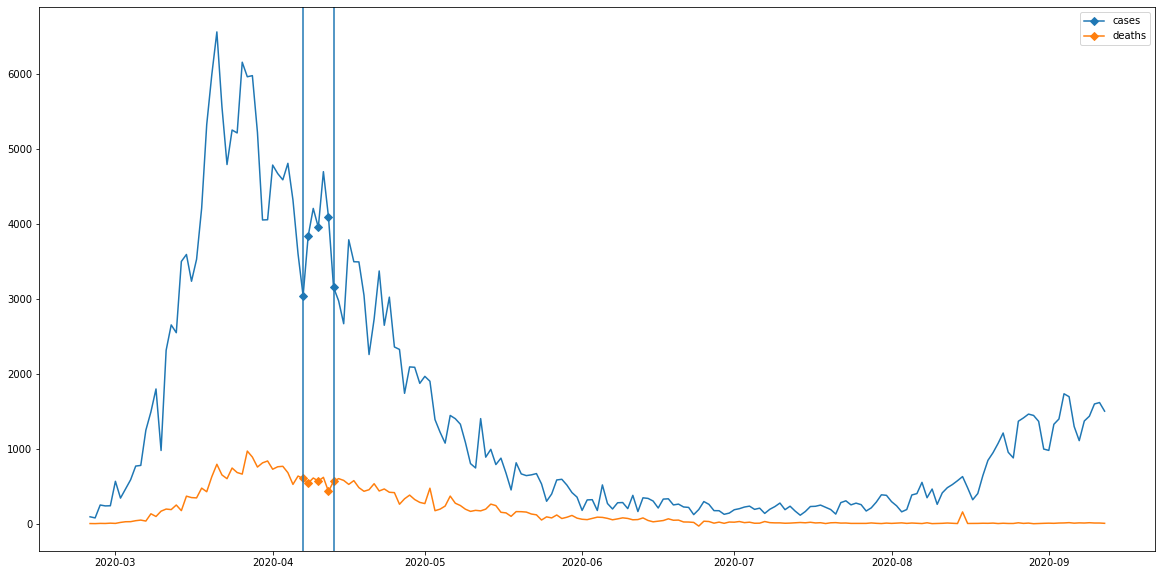

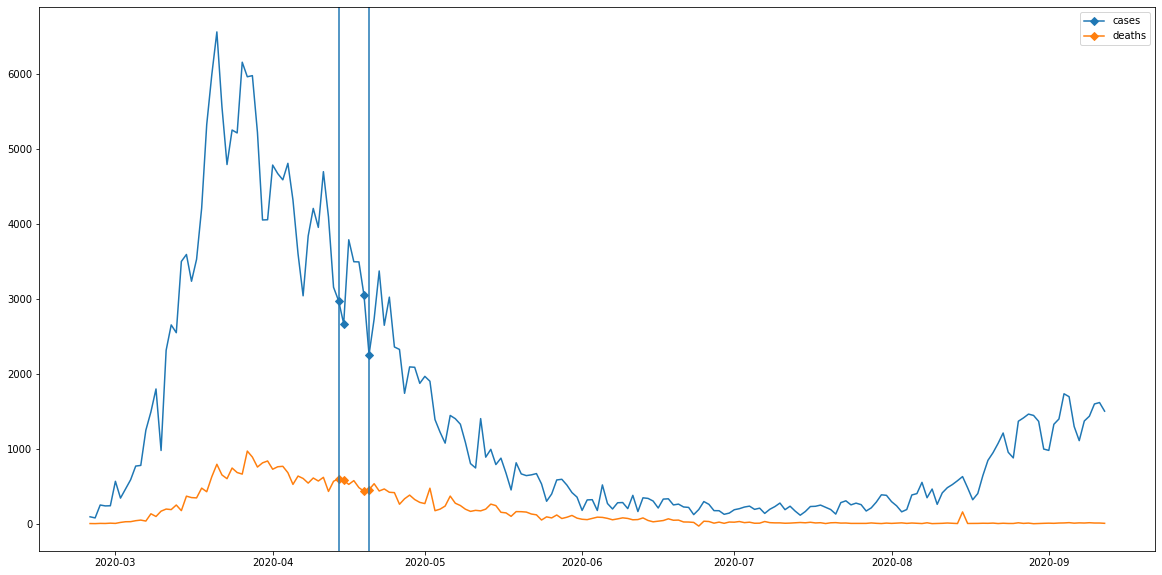

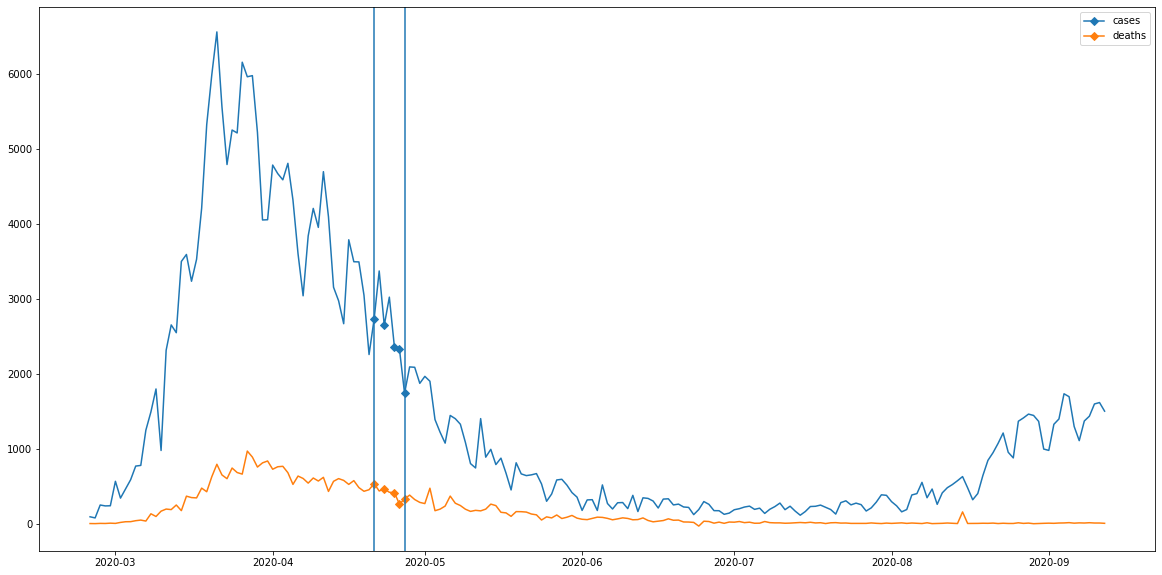

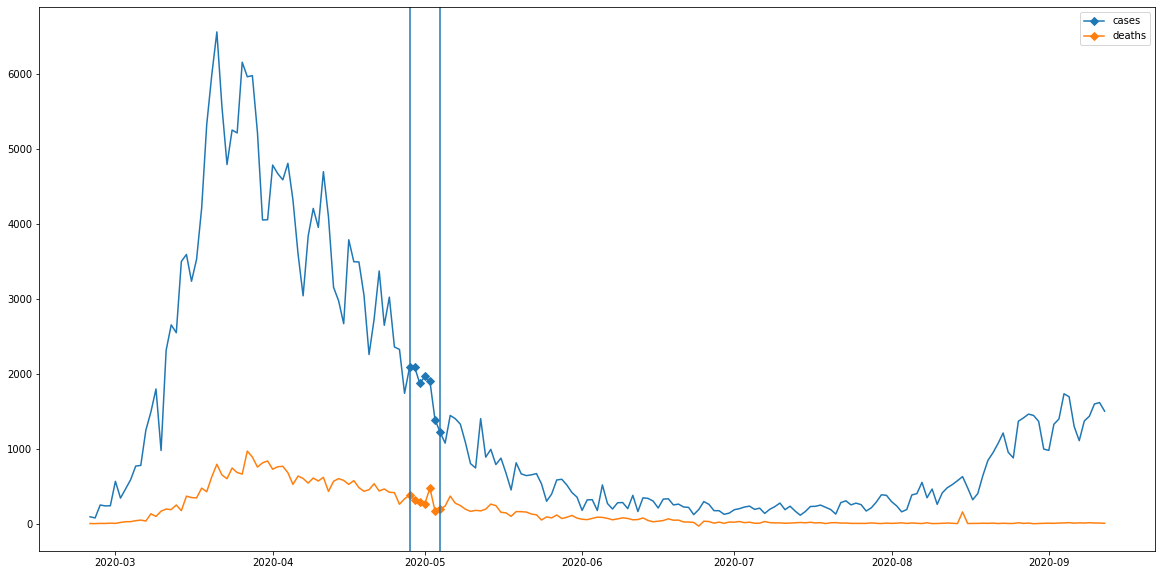

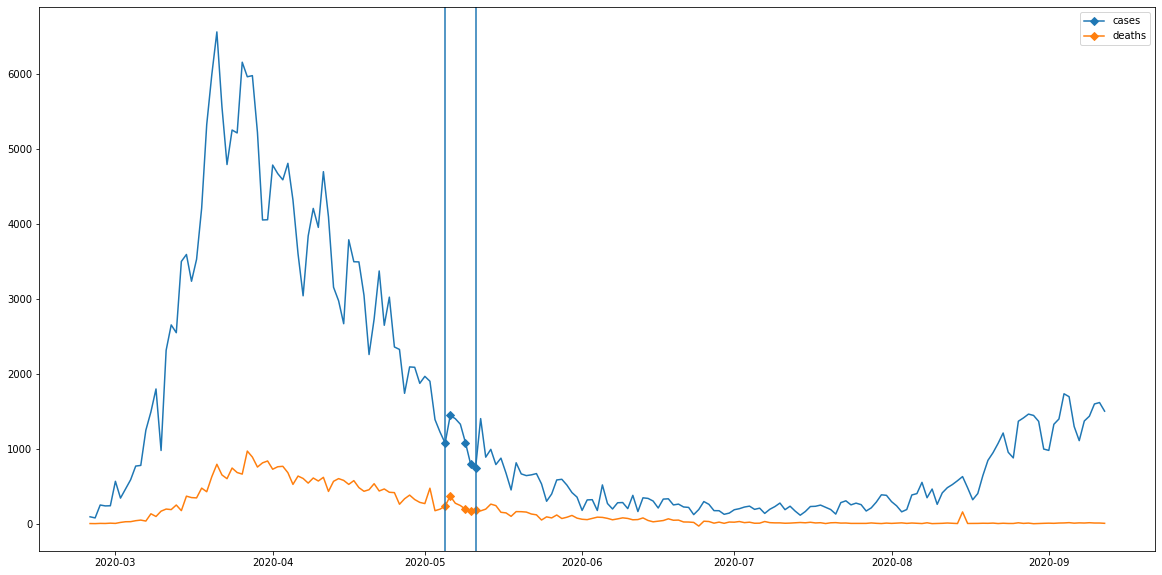

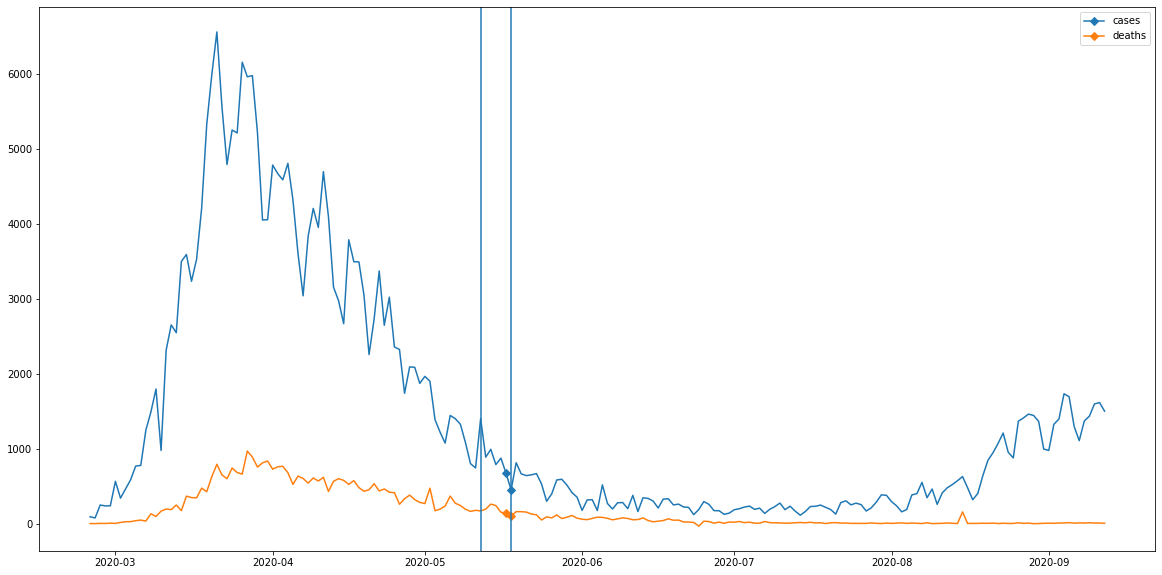

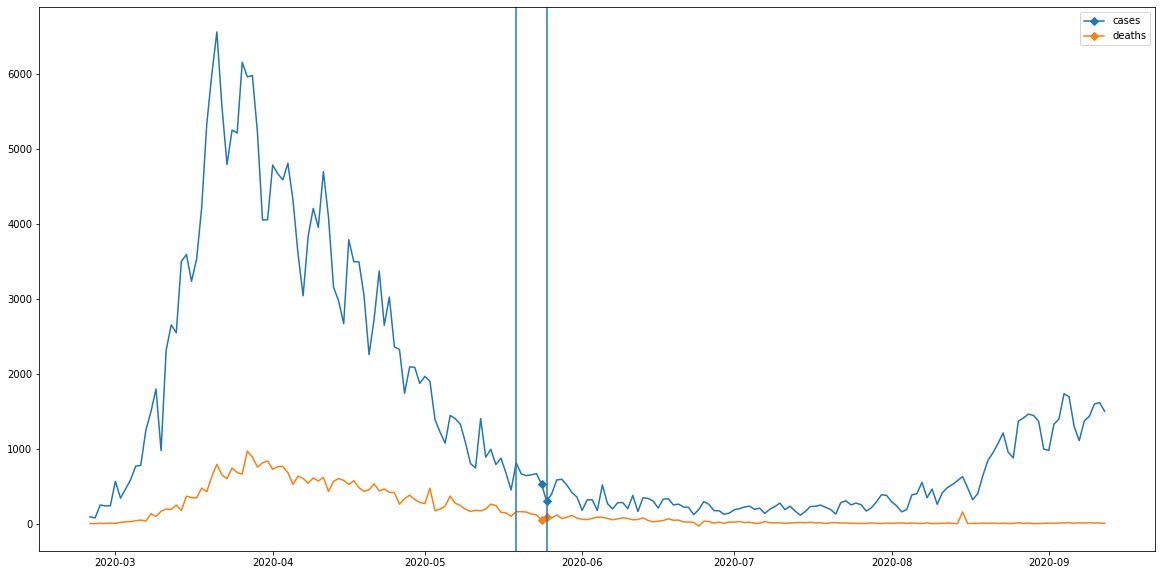

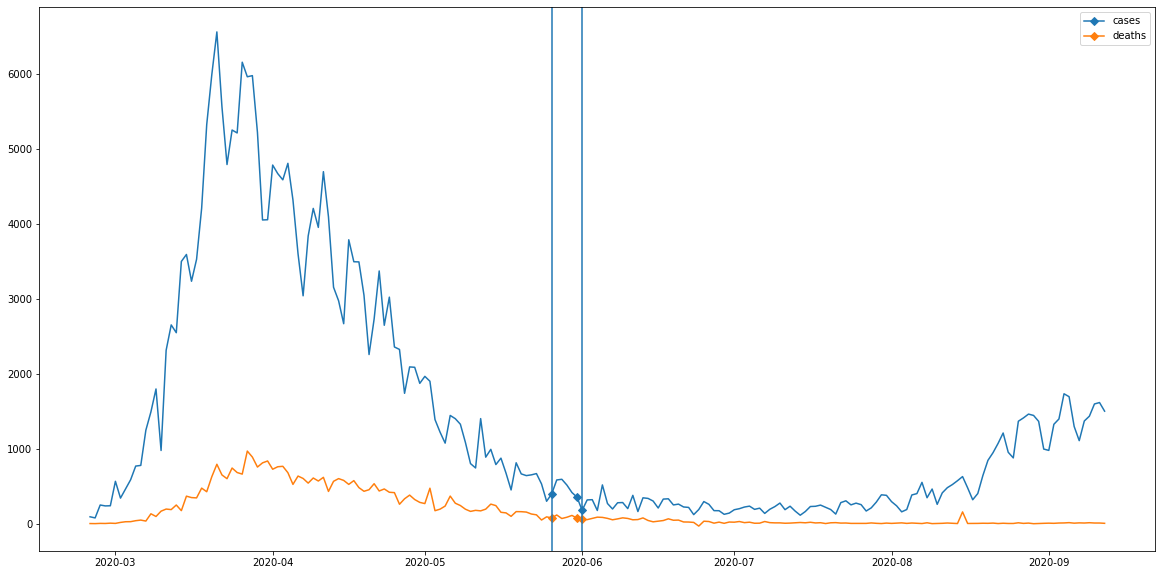

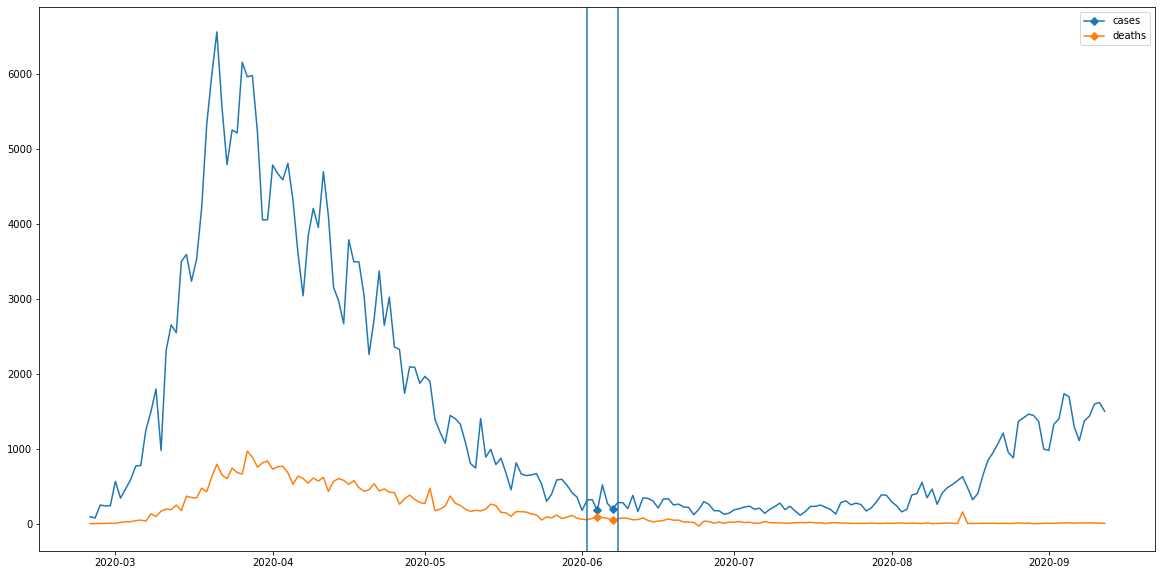

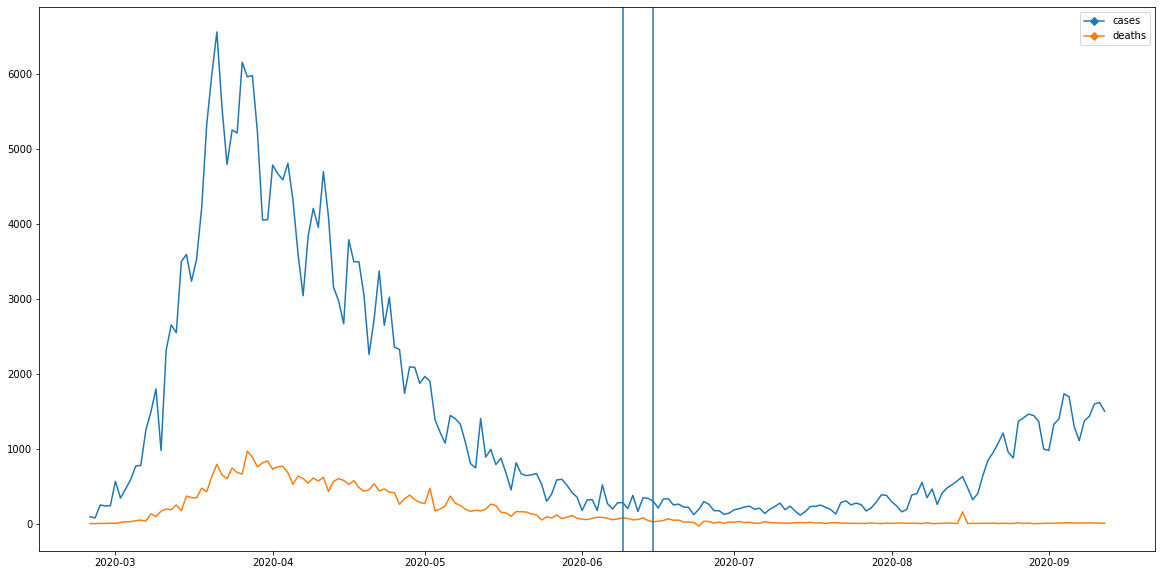

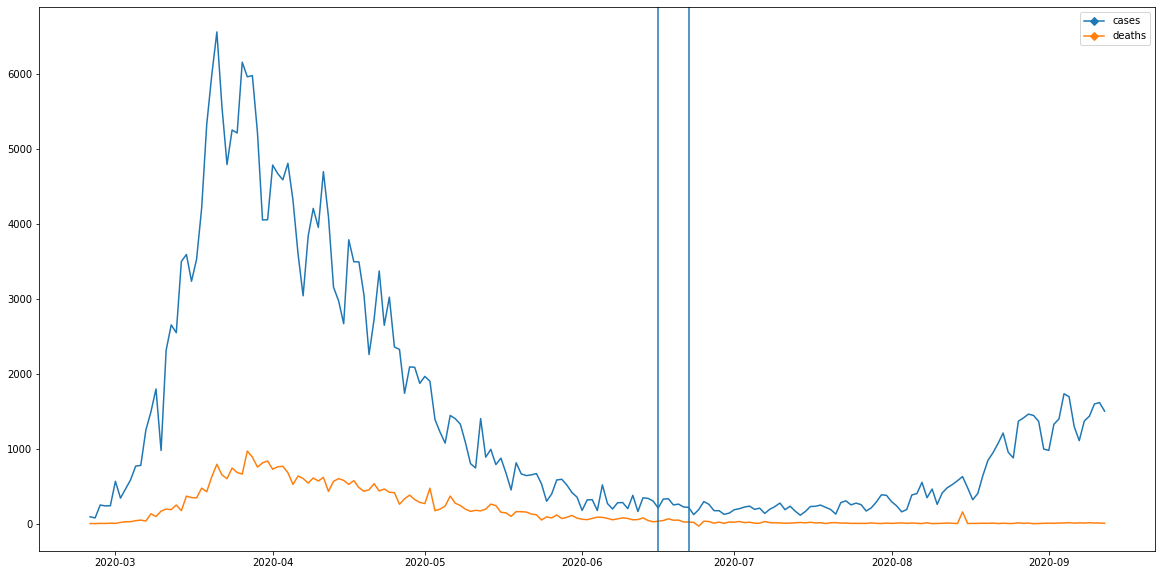

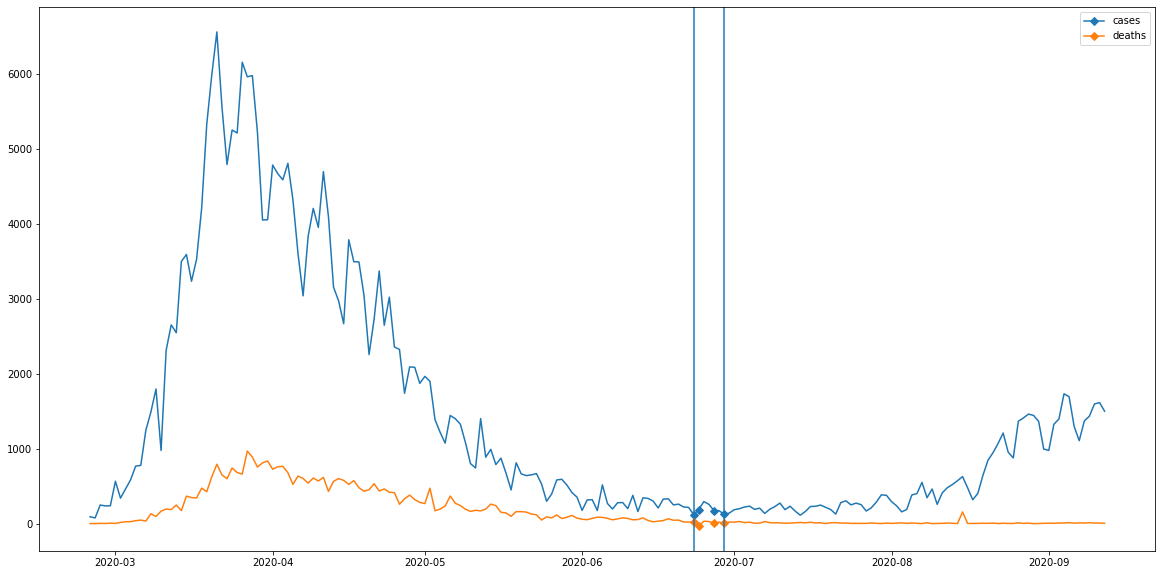

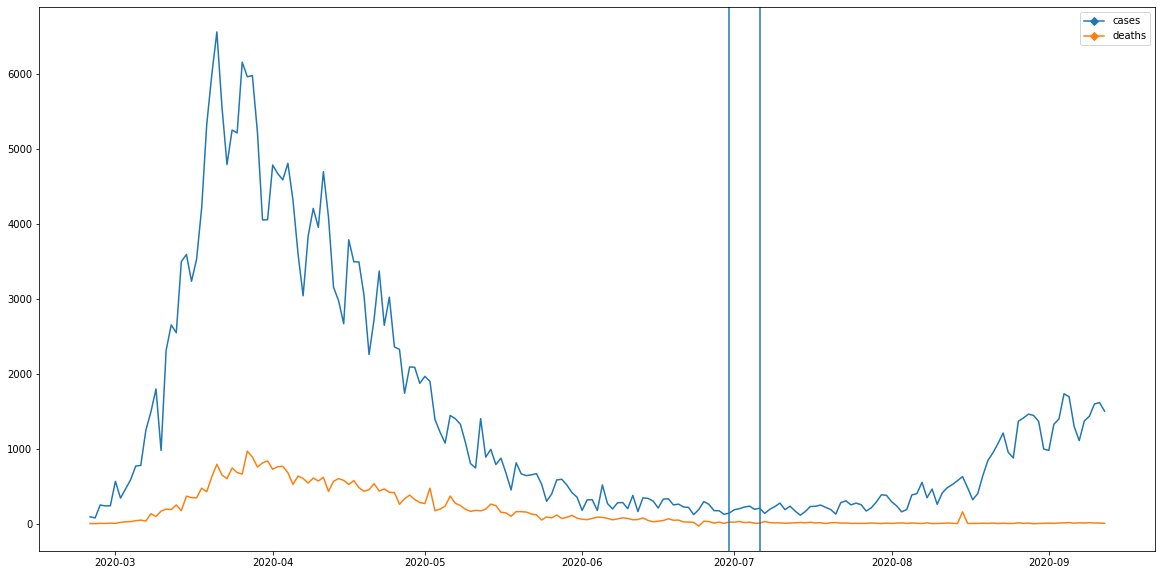

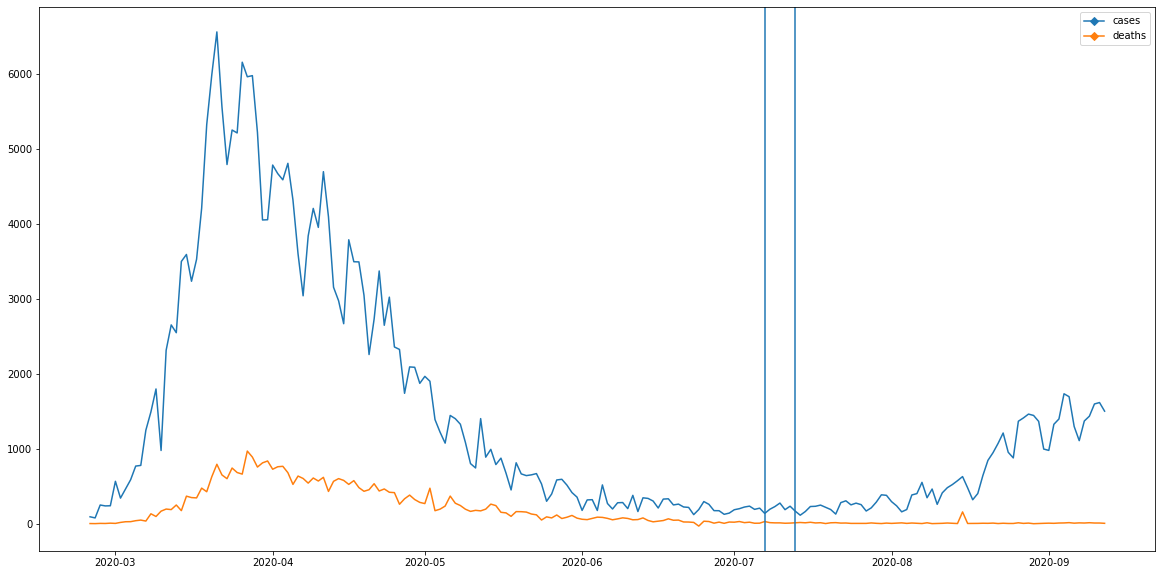

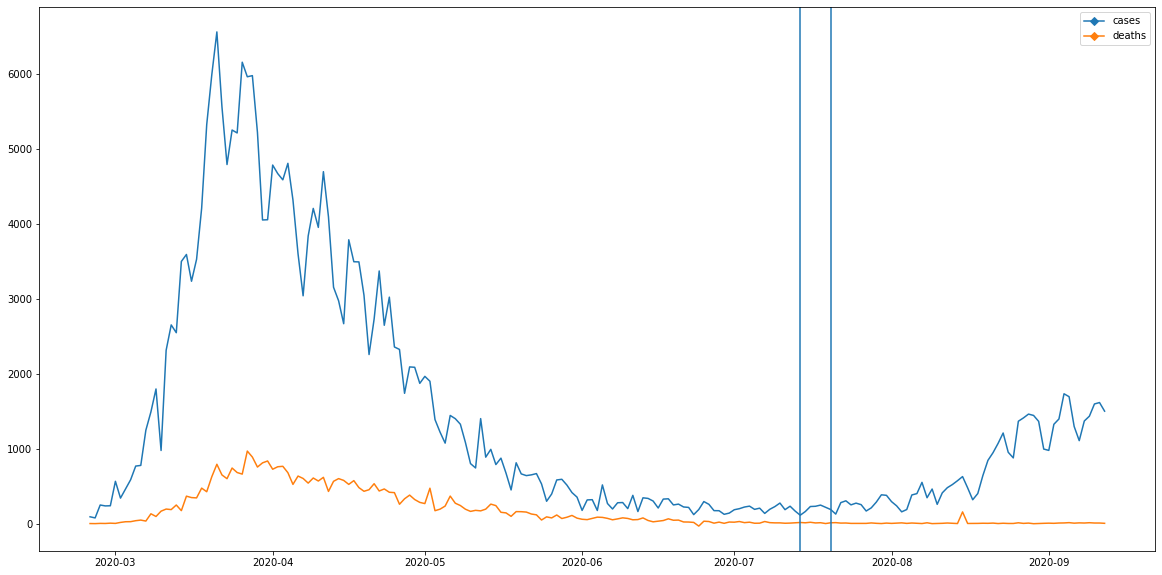

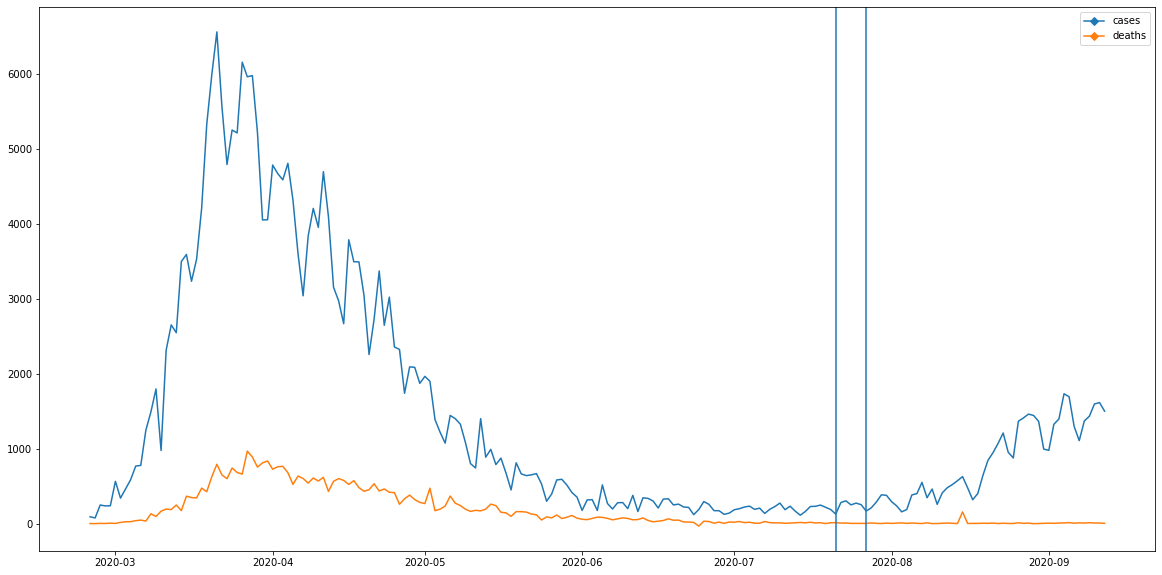

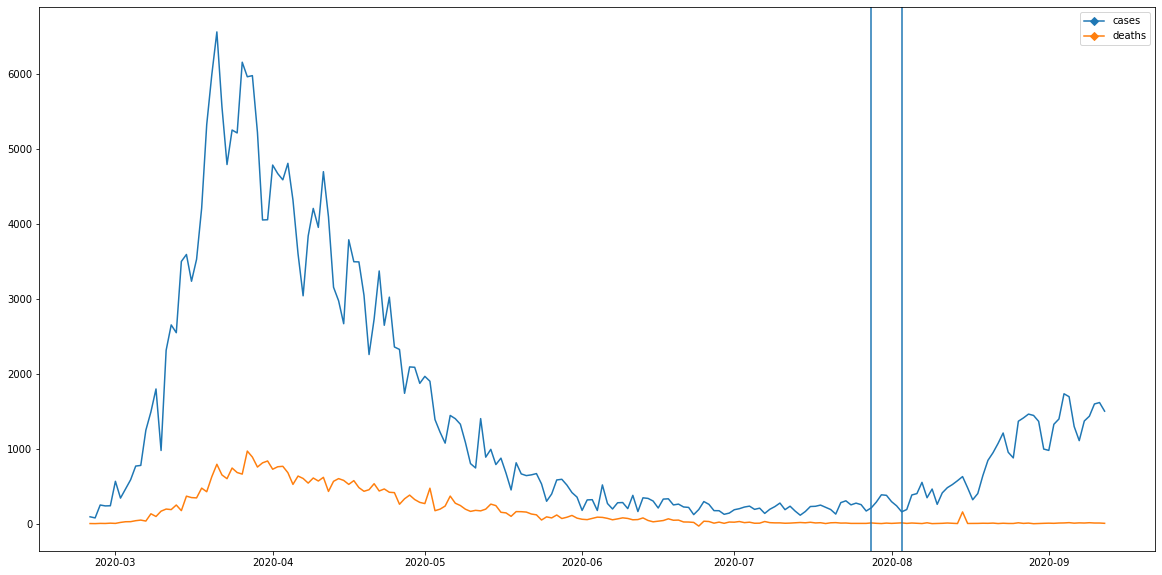

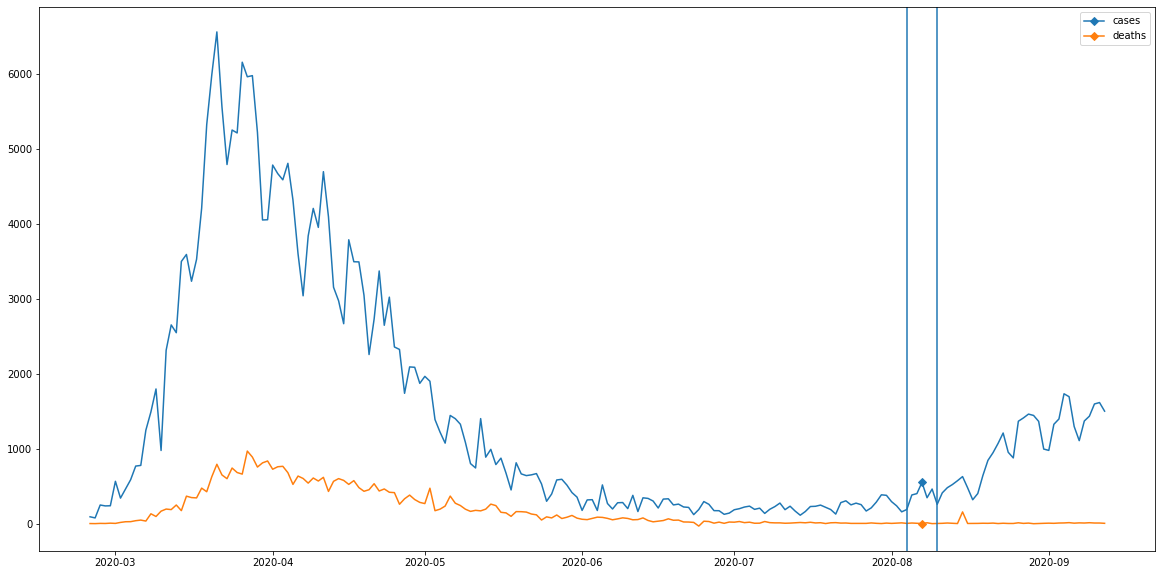

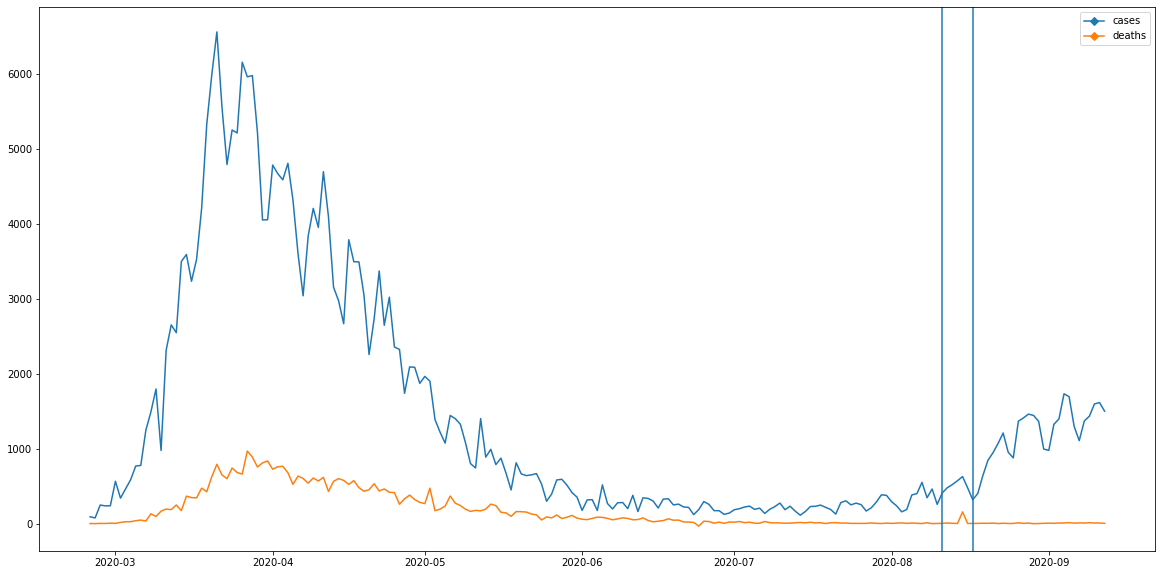

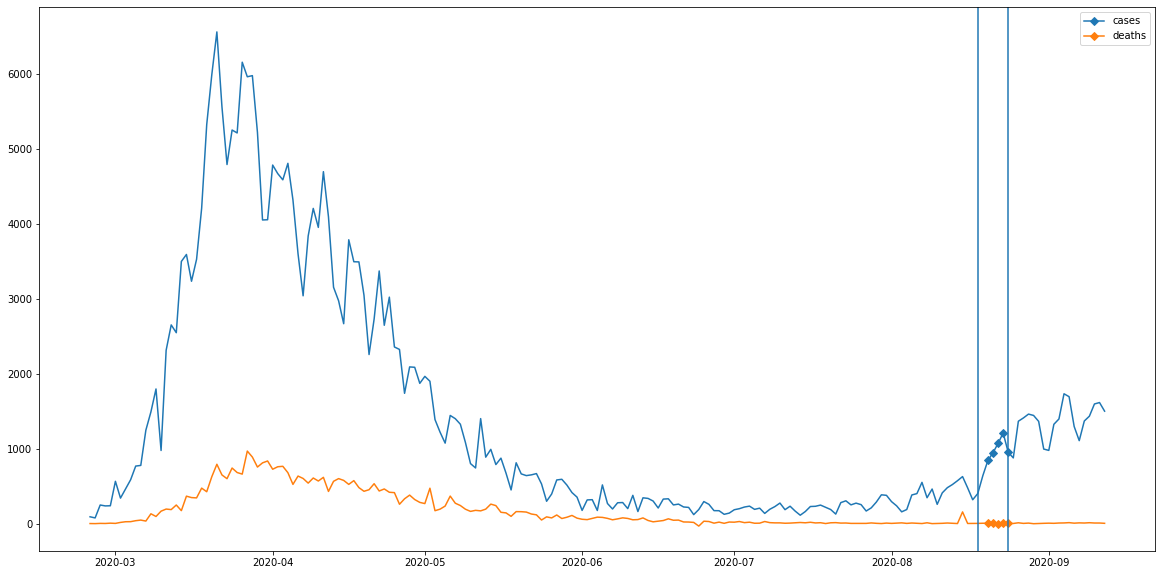

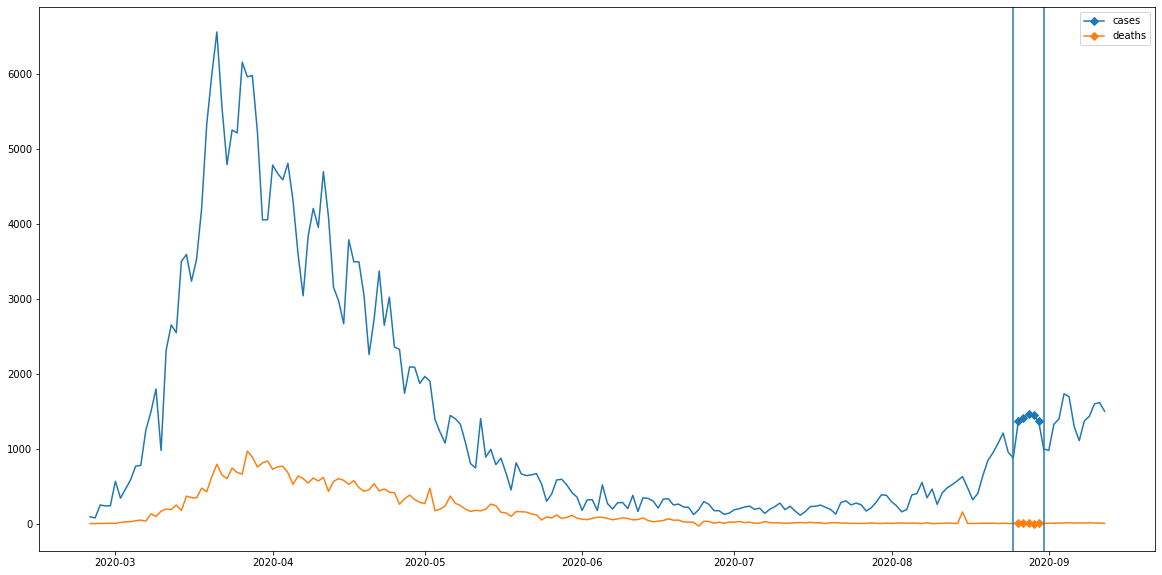

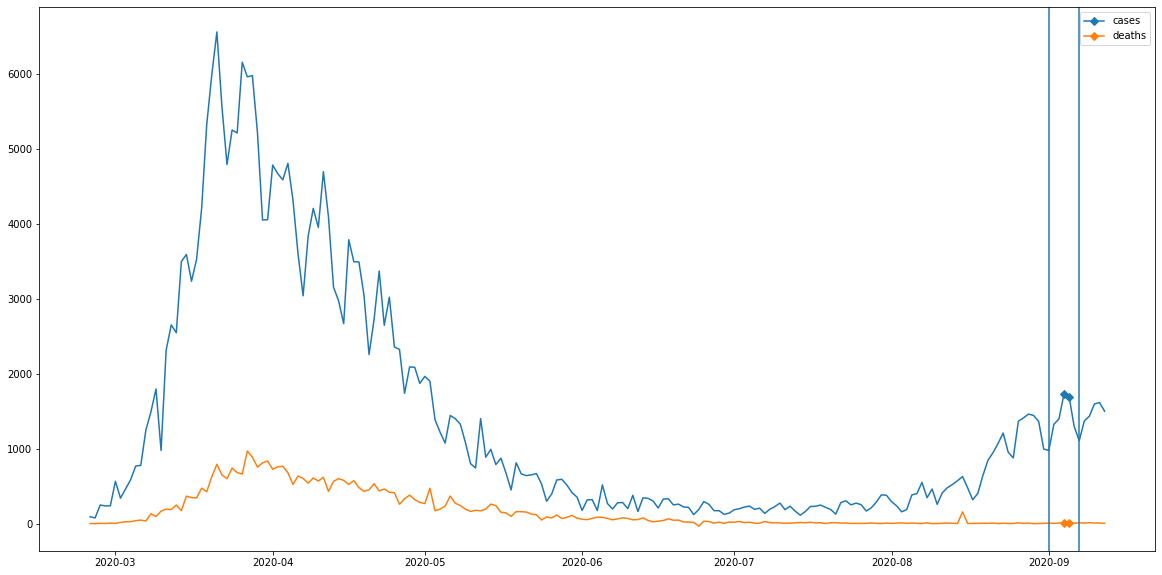

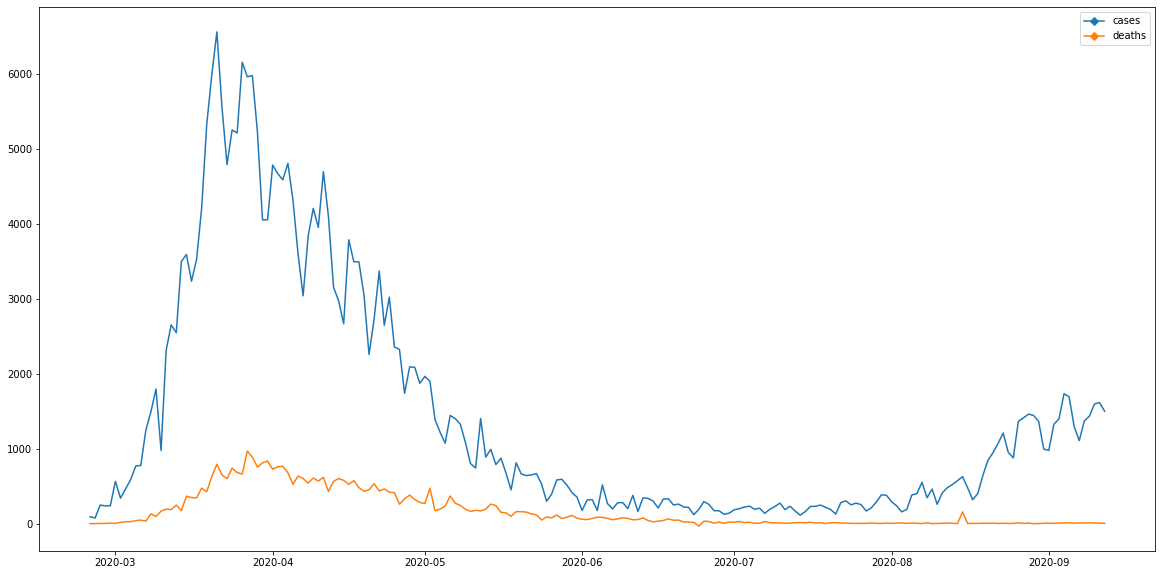

overlapped
total outliers: 86


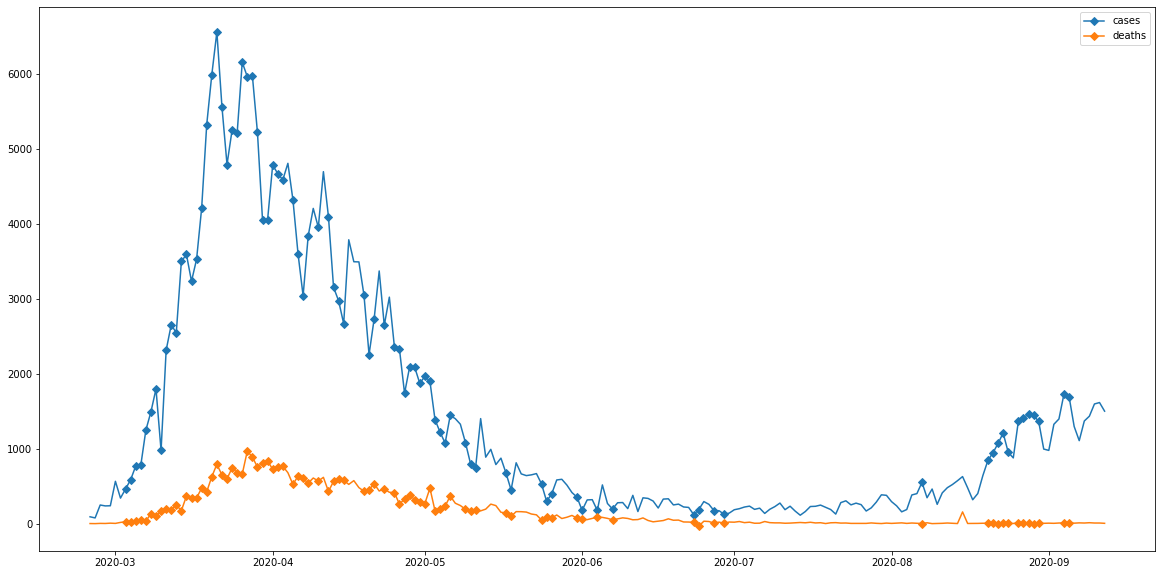

CPU times: user 12.9 s, sys: 2.75 s, total: 15.6 s
Wall time: 10.5 s


In [36]:
%%time
#fit on past, predict on current week
from sklearn.ensemble import IsolationForest
dataset = datasets[dataset_number]
dataset_no_country = dataset[dataset['country']==country_code].copy().drop('country', axis='columns')
#split in chuncks of x days
chunck_size = 7
chuncks = split_dataframe(dataset_no_country, chunck_size)
total_indices = []
for index, current in enumerate(chuncks[1:], start=1):
    until_current = join_dataframe(chuncks[:index])
    clf = IsolationForest(random_state=0).fit(until_current)
    pred = clf.predict(current).tolist()
    indices = [num + index * chunck_size for num, element in enumerate(pred) if element == -1]
    total_indices.extend(indices)
    vertical_marks = []
    pyplot.plot(dataset_no_country, '-D', markevery=indices)
    try:
        start_incides = index * chunck_size
        end_incides = ( index + 1 ) * chunck_size - 1 
        vertical_marks = [dataset_no_country.iloc[start_incides].name, dataset_no_country.iloc[end_incides].name]
        pyplot.axvline(x=vertical_marks[0])
        pyplot.axvline(x=vertical_marks[1])
    except:
        pass
    pyplot.legend(['cases', 'deaths'])
    pyplot.show()
    
print("overlapped")
print(f"total outliers: {len(total_indices)}")
pyplot.plot(dataset_no_country, '-D', markevery=total_indices)
pyplot.legend(['cases', 'deaths'])
pyplot.show()


overlapped
total outliers: 77


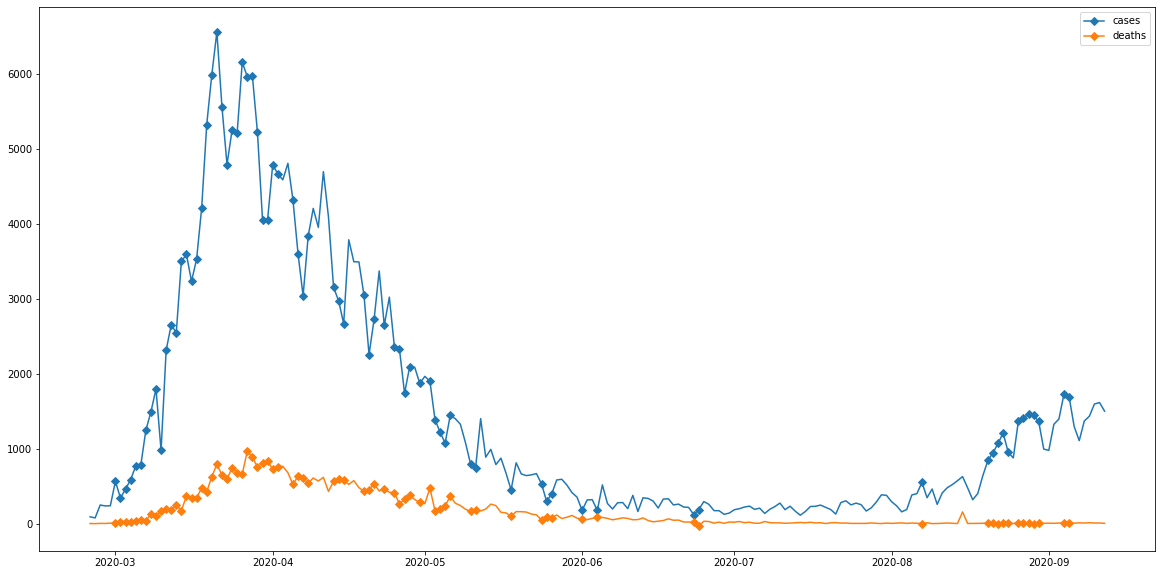

CPU times: user 21.3 s, sys: 125 ms, total: 21.4 s
Wall time: 21.5 s


In [59]:
%%time
#fit on past, predict on day
from sklearn.ensemble import IsolationForest
dataset = datasets[dataset_number]
dataset_no_country = dataset[dataset['country']==country_code].copy().drop('country', axis='columns')
#split in chuncks of x days
chunck_size = 2
chuncks = split_dataframe(dataset_no_country, chunck_size)
total_indices = []
for index, current in enumerate(chuncks[1:], start=1):
    until_current = join_dataframe(chuncks[:index])
    clf = IsolationForest(random_state=0).fit(until_current)
    pred = clf.predict(current).tolist()
    indices = [num + index * chunck_size for num, element in enumerate(pred) if element == -1]
    total_indices.extend(indices)
#     vertical_marks = []
#     pyplot.plot(dataset_no_country, '-D', markevery=indices)
#     try:
#         start_incides = index * chunck_size
#         end_incides = ( index + 1 ) * chunck_size - 1 
#         vertical_marks = [dataset_no_country.iloc[start_incides].name, dataset_no_country.iloc[end_incides].name]
#         pyplot.axvline(x=vertical_marks[0])
#         pyplot.axvline(x=vertical_marks[1])
#     except:
#         pass
#     pyplot.legend(['cases', 'deaths'])
#     pyplot.show()
    
print("overlapped")
print(f"total outliers: {len(total_indices)}")
pyplot.plot(dataset_no_country, '-D', markevery=total_indices)
pyplot.legend(['cases', 'deaths'])
pyplot.show()




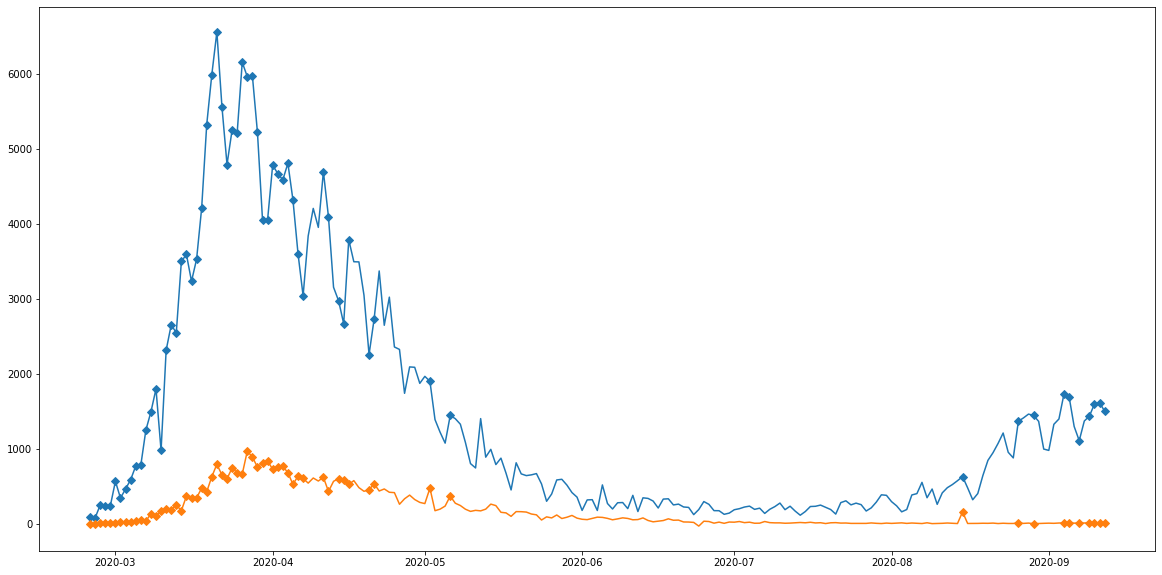

fit on all, predict on all + use time as input
Number of outliers:
62


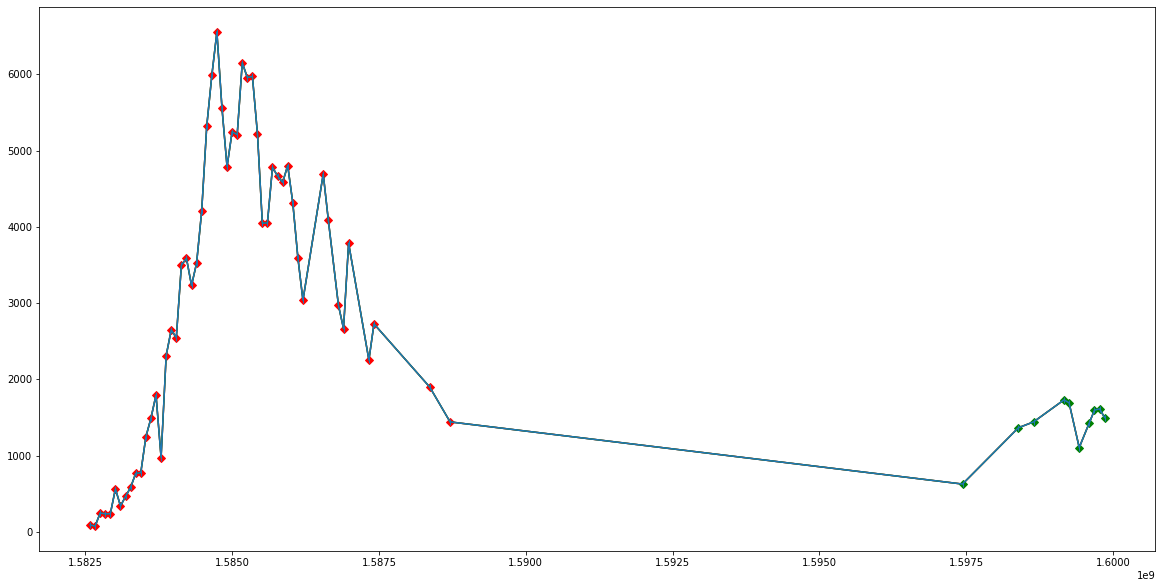

In [38]:
# DEPRECATED
#%%time
from datetime import datetime
def to_epoch(value: str):
    return datetime.timestamp(value)

from pandas import Series
#fit on all, predict on all + use time as input
from sklearn.ensemble import IsolationForest
dataset = datasets[dataset_number]
dataset_no_country = dataset[dataset['country']==country_code].copy().drop('country', axis='columns')
dataset_with_time = dataset_no_country.copy()
dataset_with_time['time']= dataset_with_time.index.values
dataset_with_time['time'] = dataset_with_time['time'].map(to_epoch)
clf = IsolationForest(random_state=0).fit(dataset_with_time)
pred = clf.predict(dataset_with_time)
indices = [index for index, element in enumerate(pred) if element == -1]
pyplot.plot(dataset_no_country, '-D', markevery=indices)
pyplot.show()
print("fit on all, predict on all + use time as input")
dataset_no_country.head()
print("Number of outliers:")
print(len(indices))

# cluster by Kmeans on cases
anomaly =  dataset_with_time.copy()
anomaly =  anomaly.drop('deaths', axis='columns')
from sklearn.cluster import KMeans
anomaly = anomaly.iloc[indices]
kmeans = KMeans(n_clusters=2, random_state=0).fit(anomaly)
anomaly_cluster1= [index for index, element in enumerate(kmeans.labels_) if element == 0]
anomaly_cluster2= [index for index, element in enumerate(kmeans.labels_) if element == 1]
anomaly.index = anomaly['time']

pyplot.plot(anomaly['cases'], '-Dr', markevery=anomaly_cluster1)
pyplot.plot(anomaly['cases'], '-Dg', markevery=anomaly_cluster2)
pyplot.plot(anomaly['cases'], '-|')

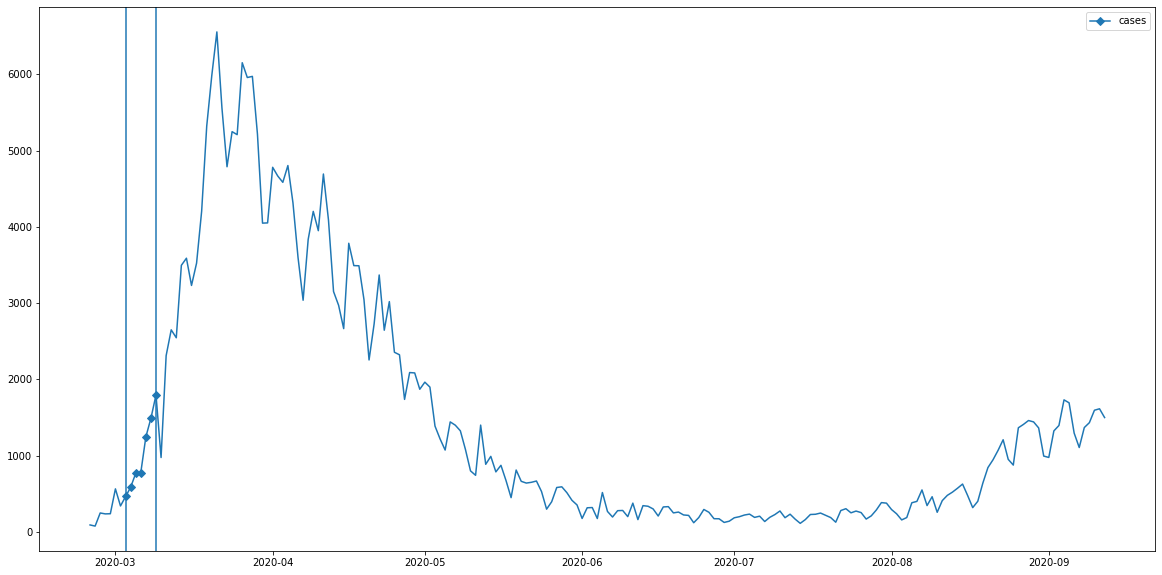

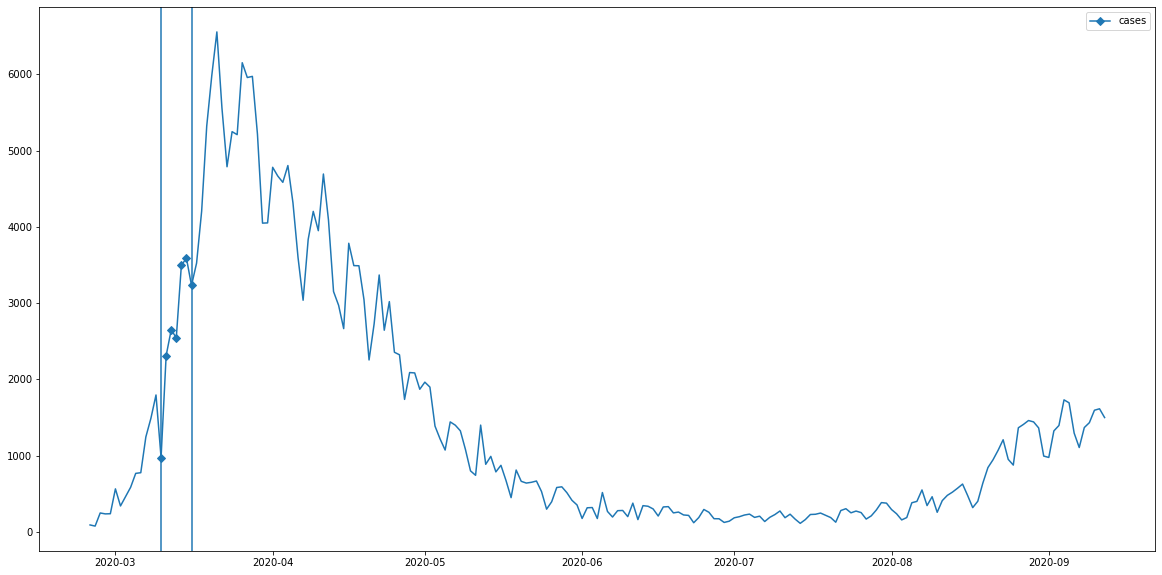

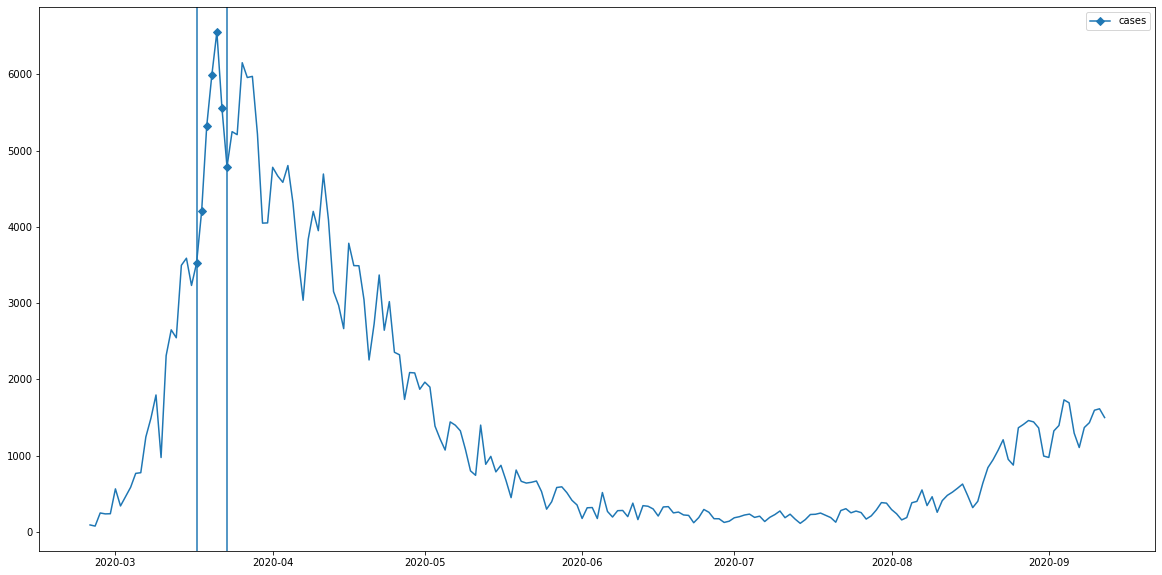

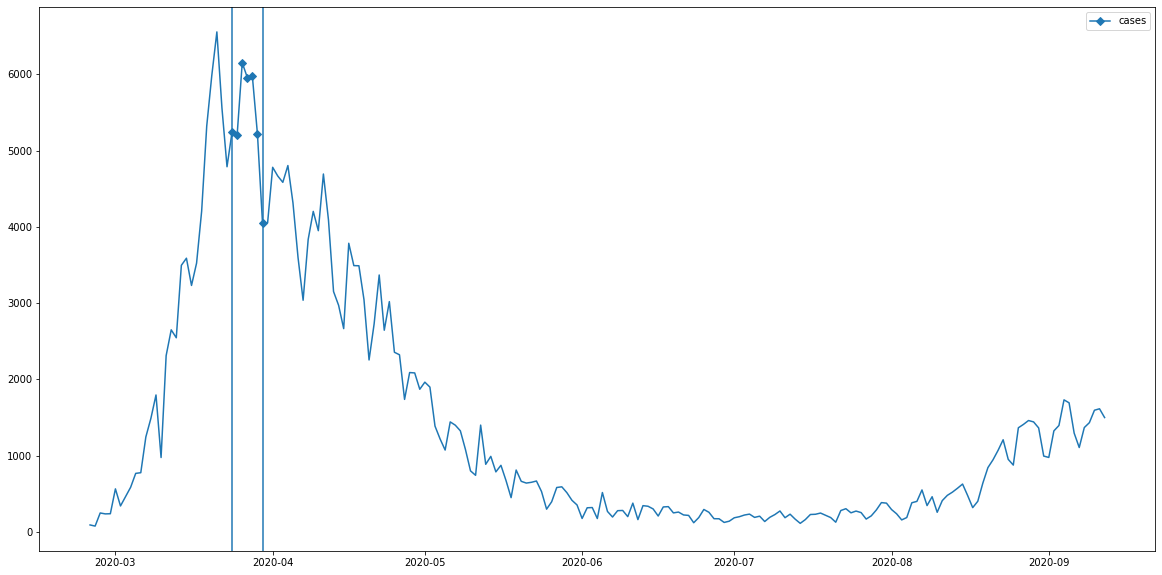

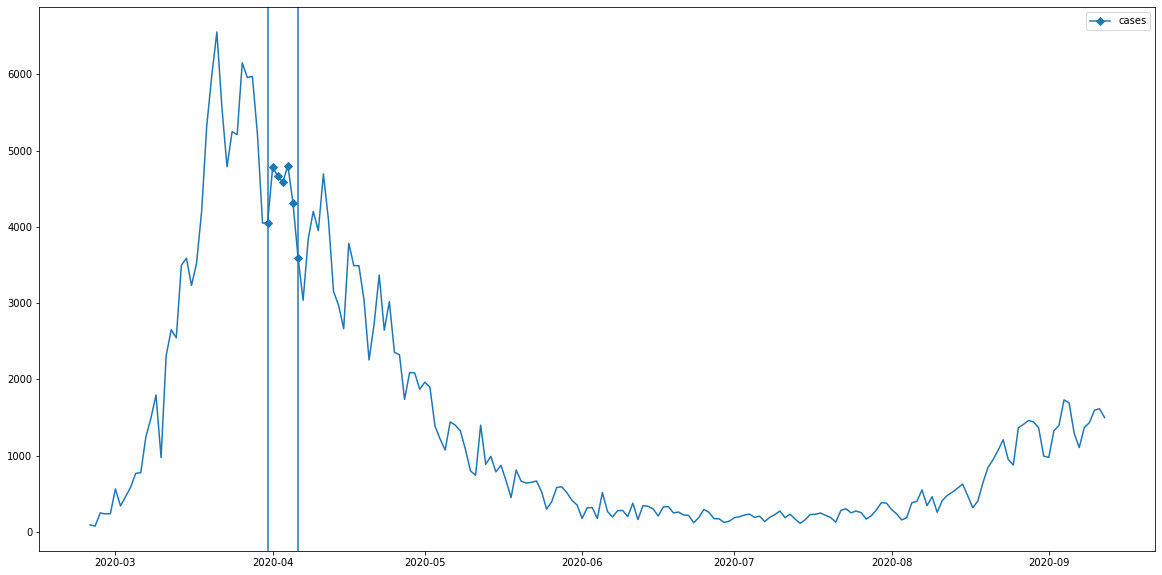

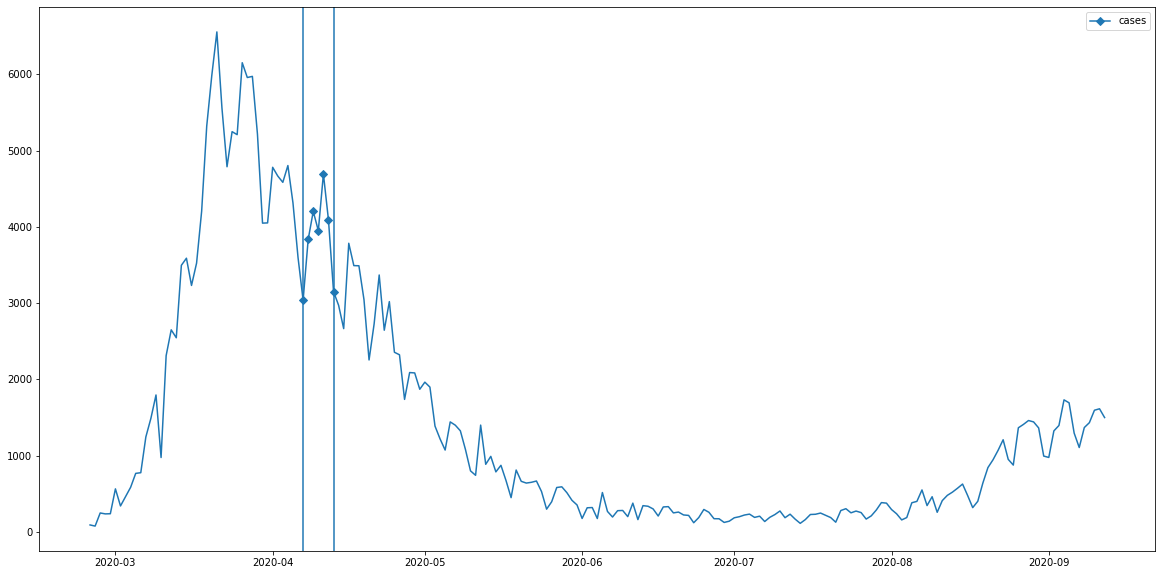

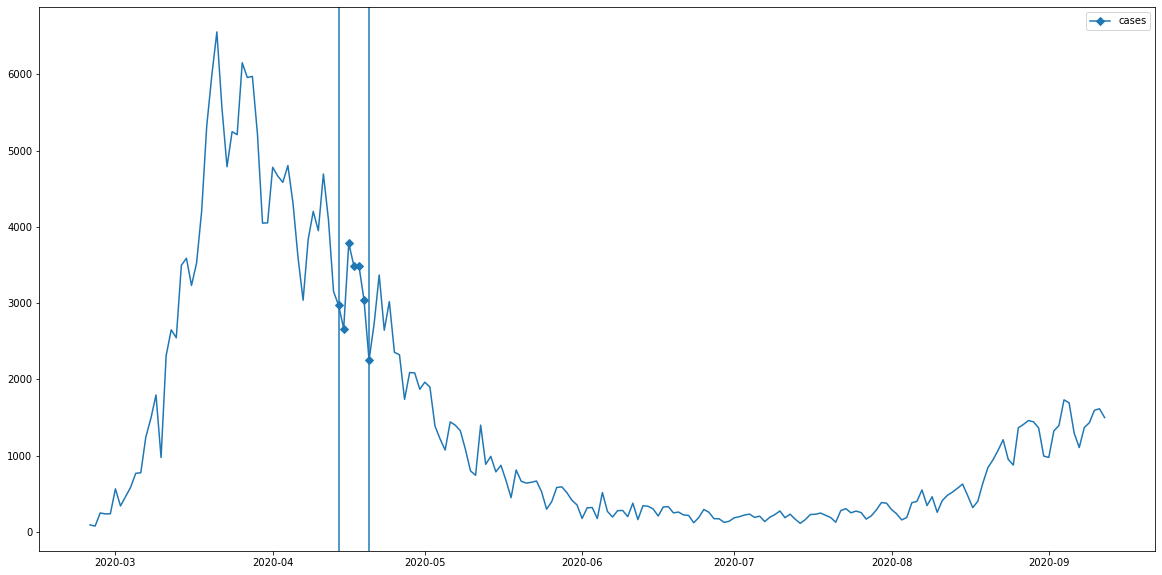

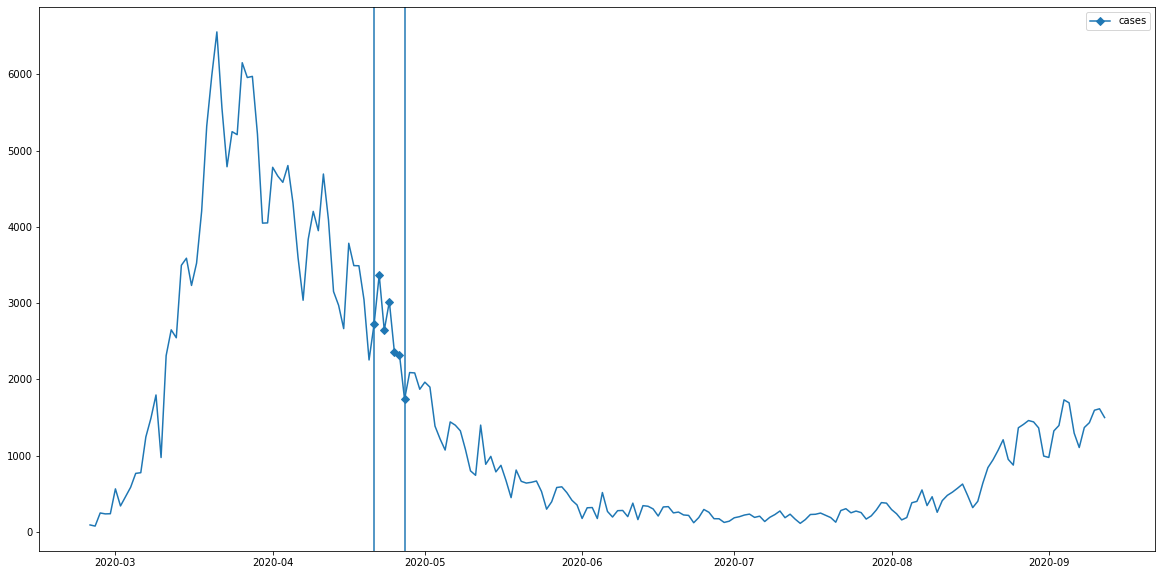

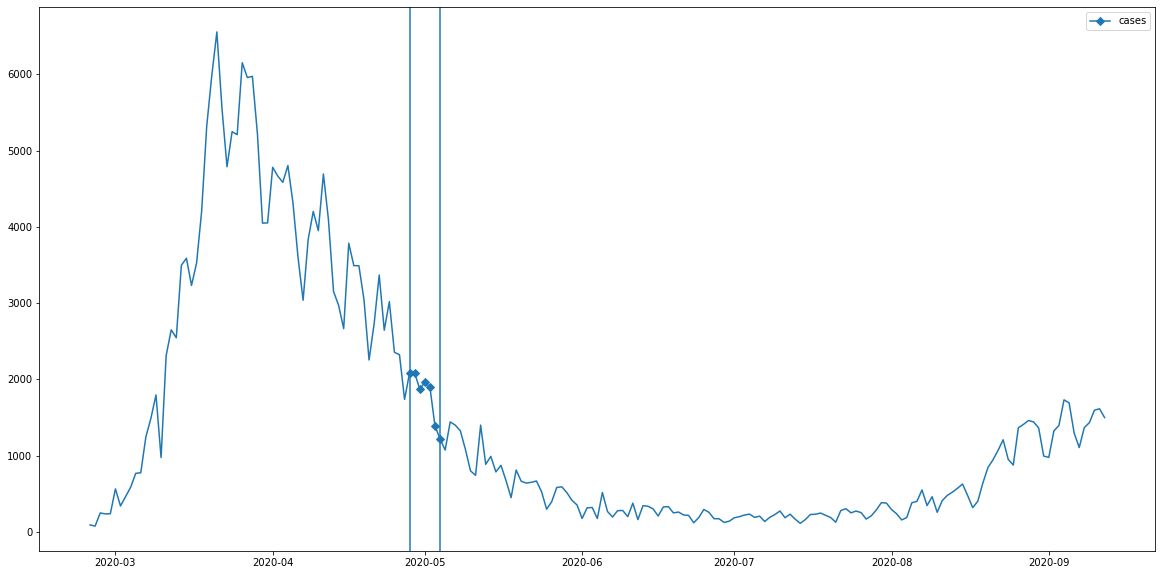

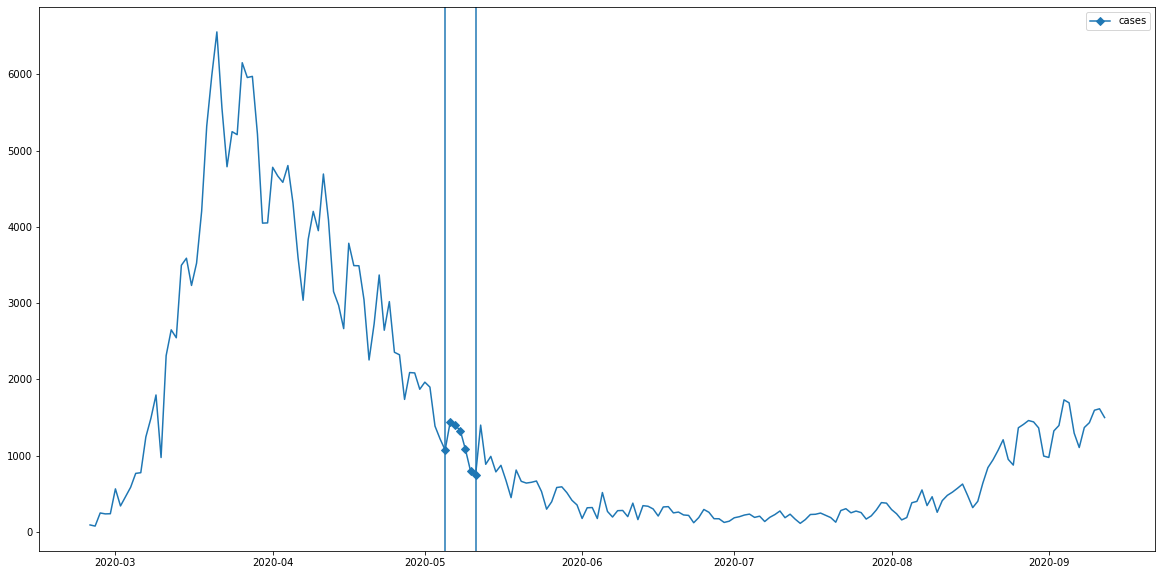

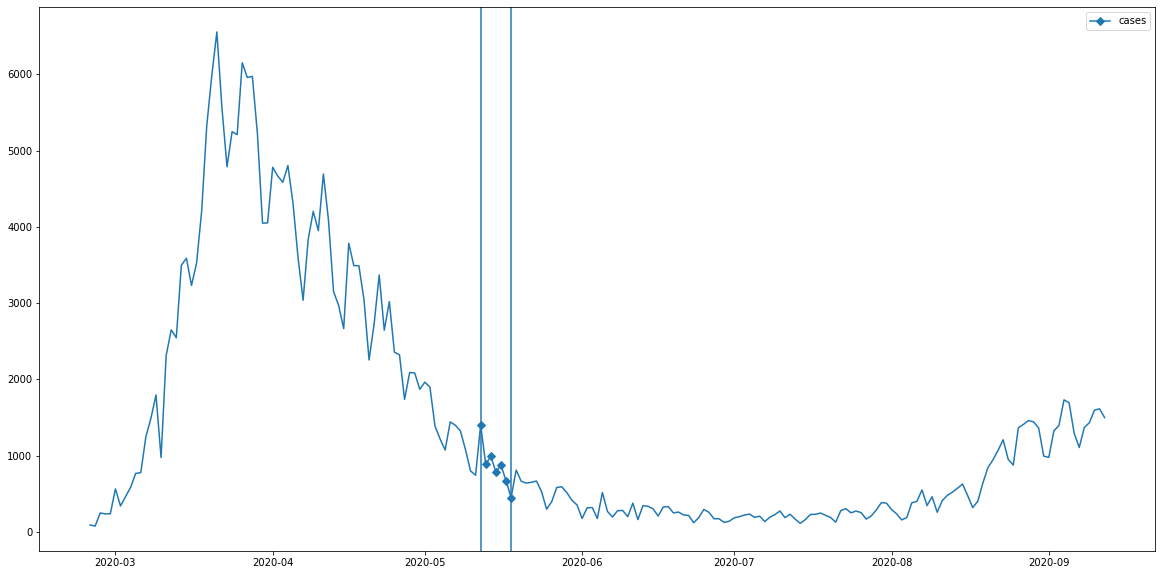

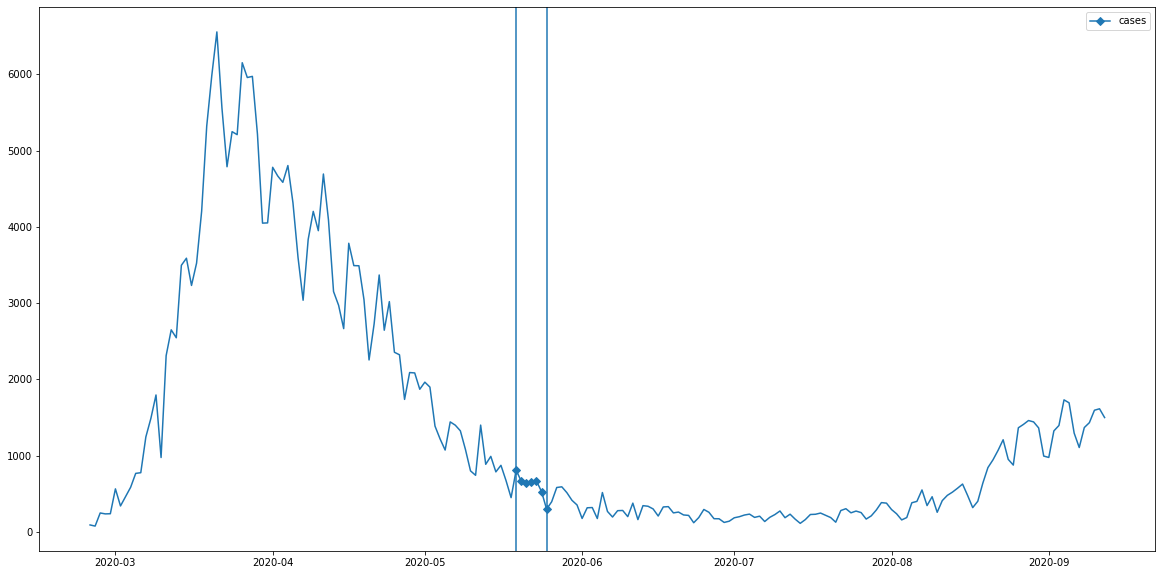

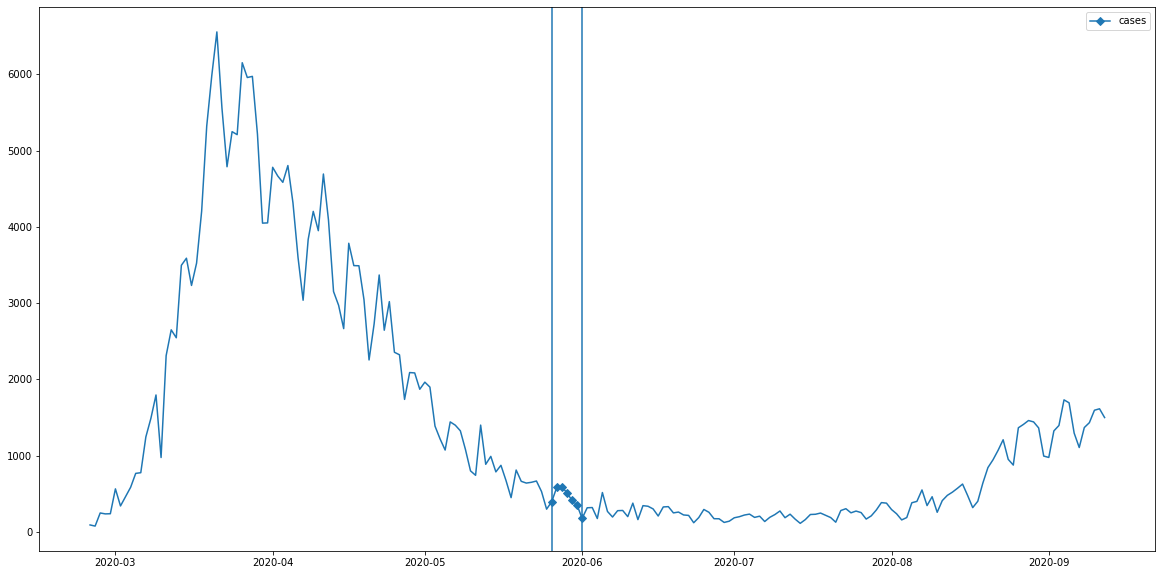

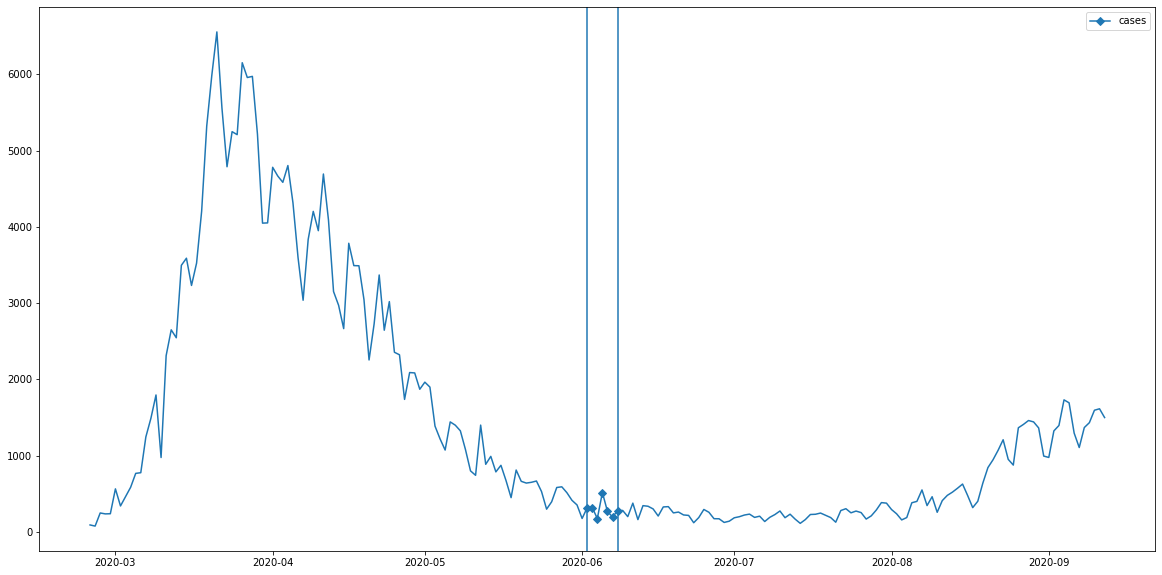

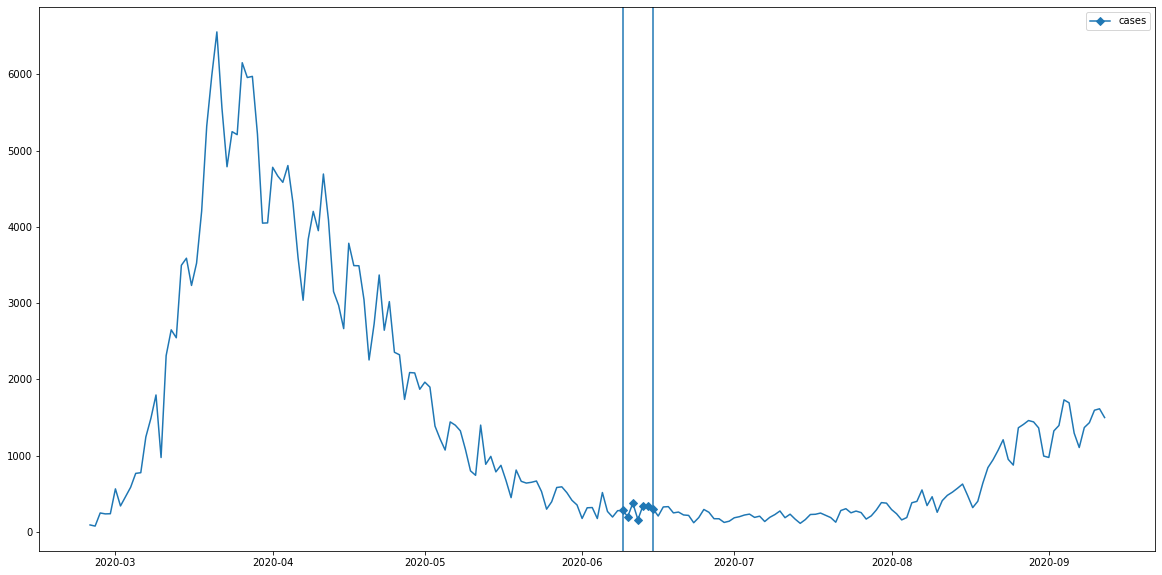

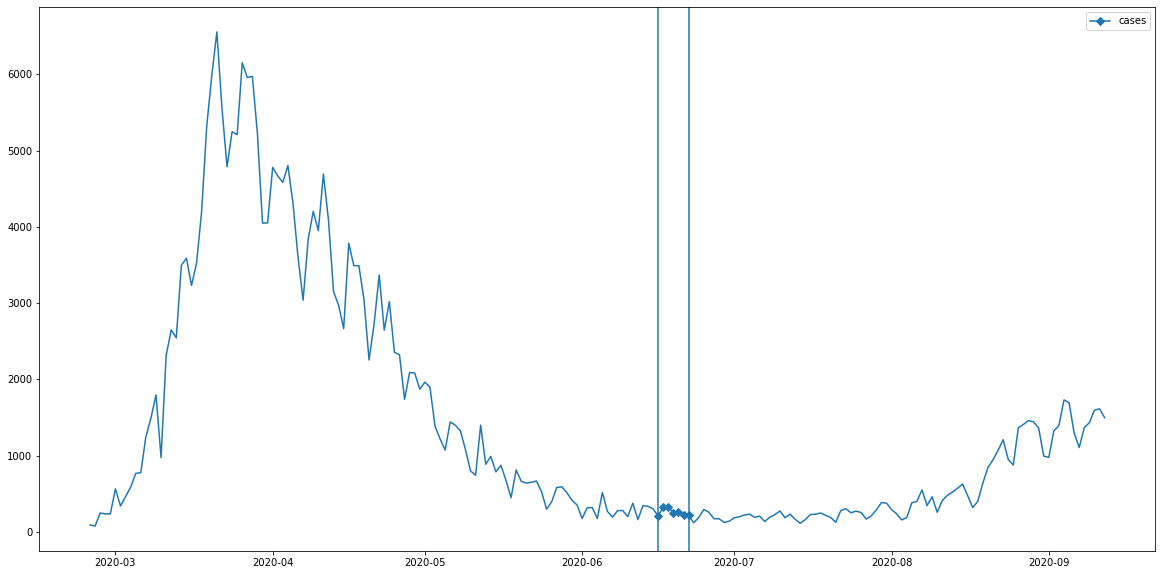

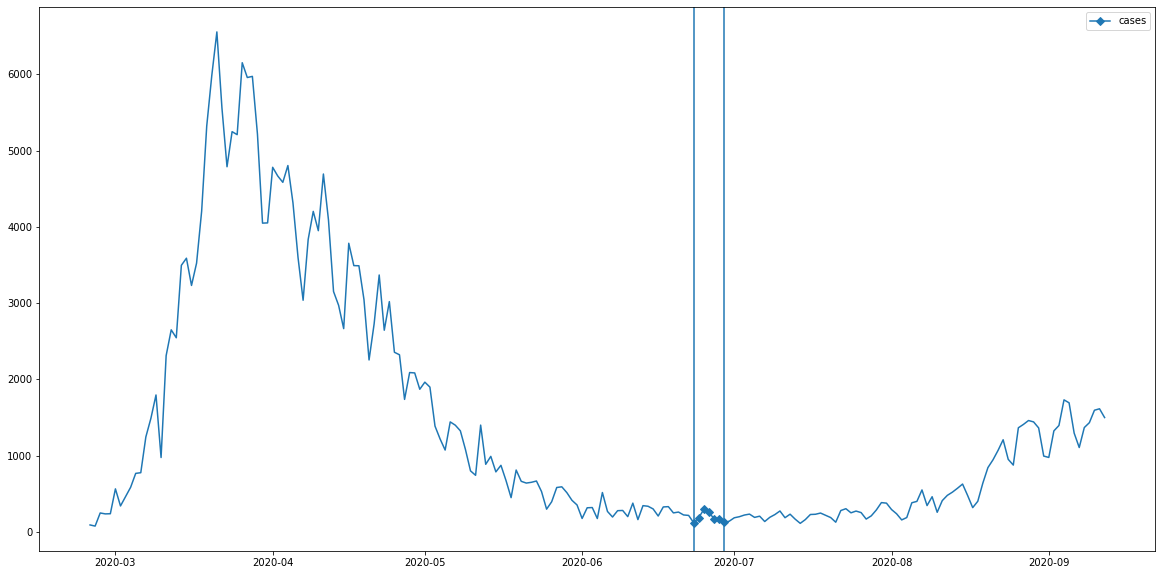

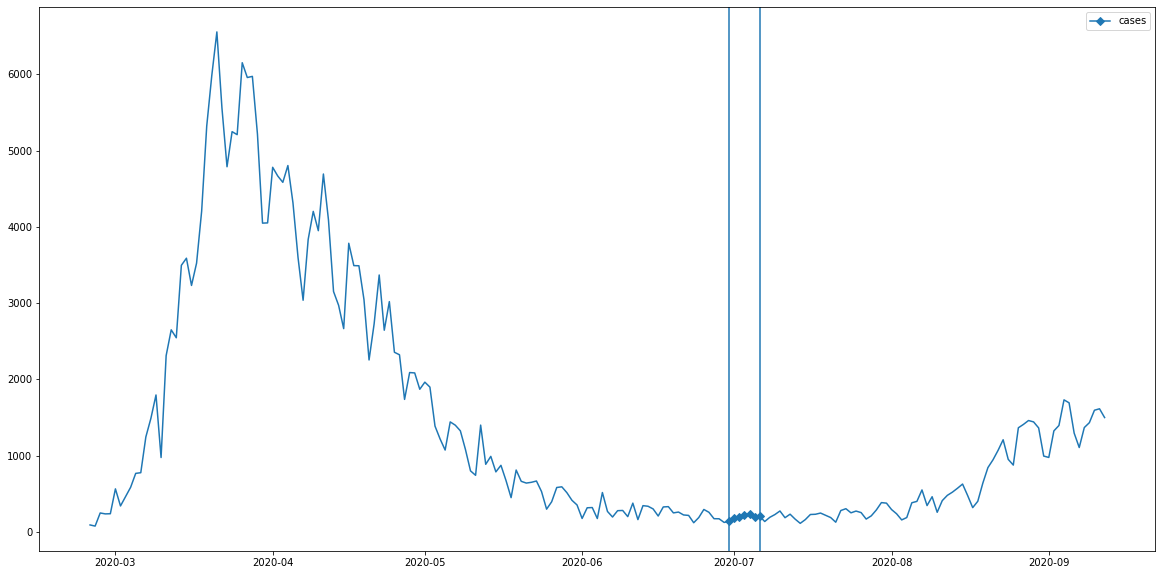

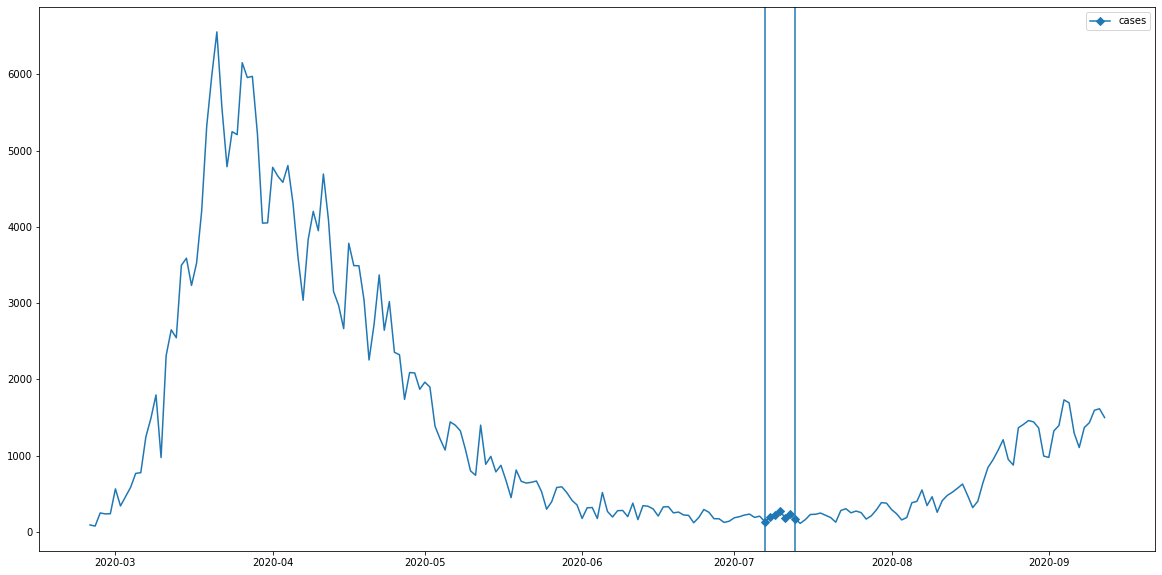

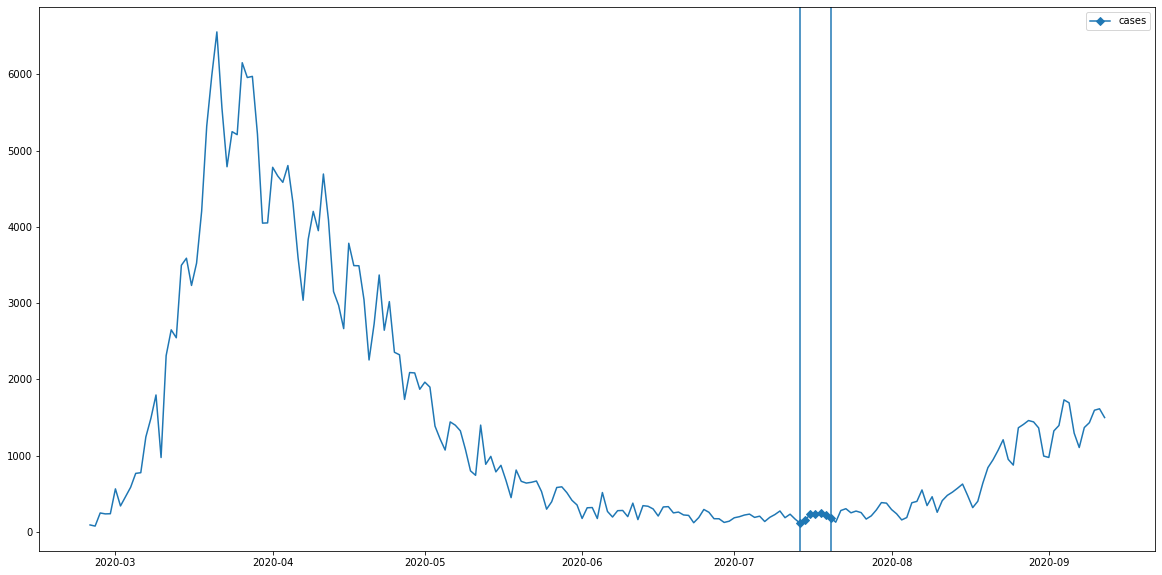

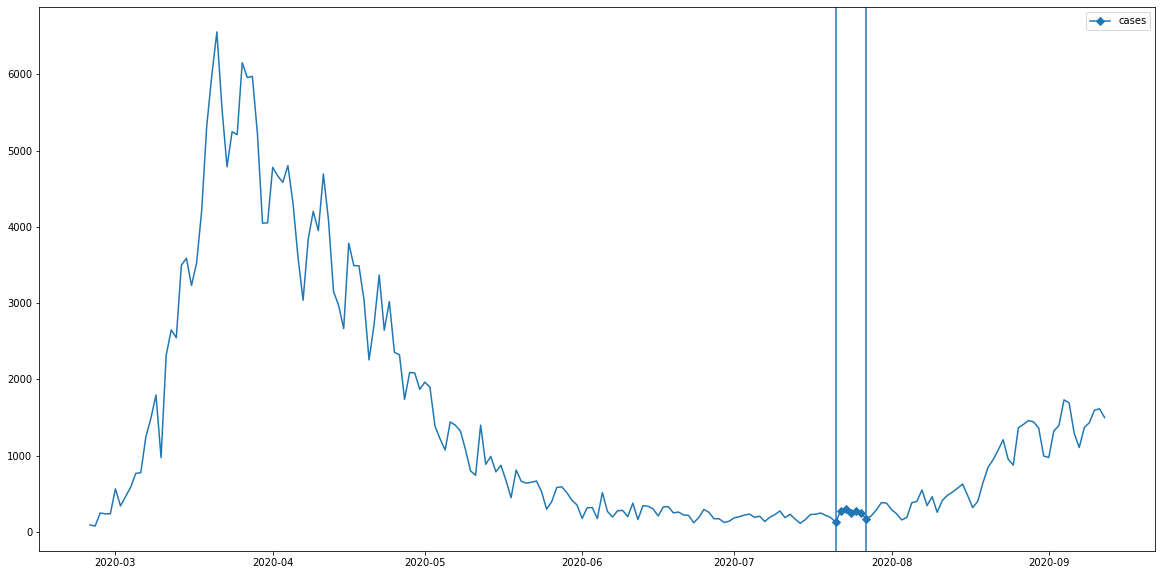

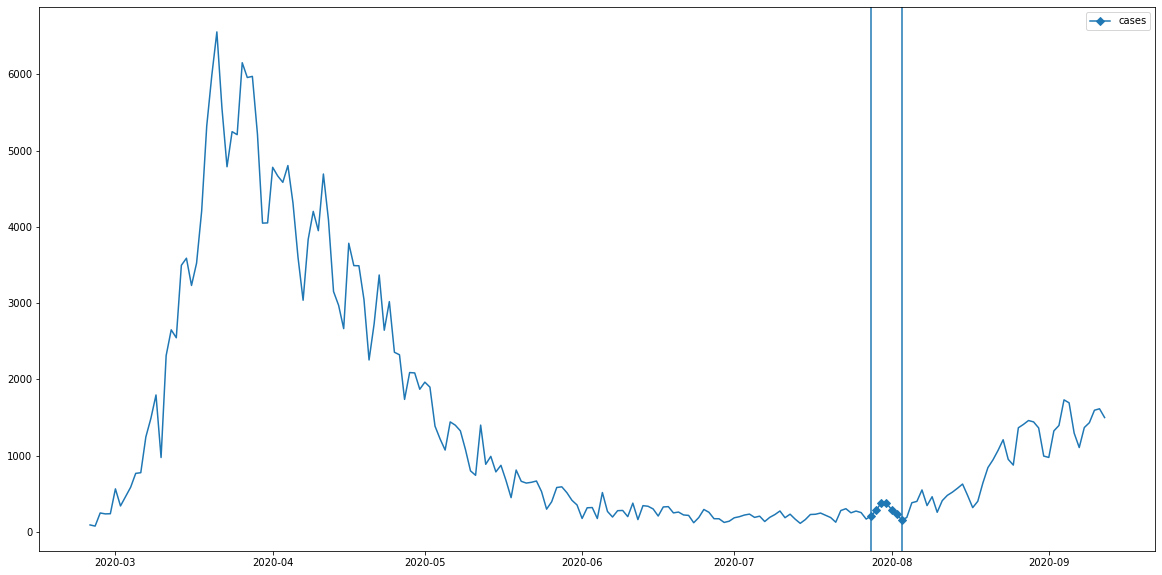

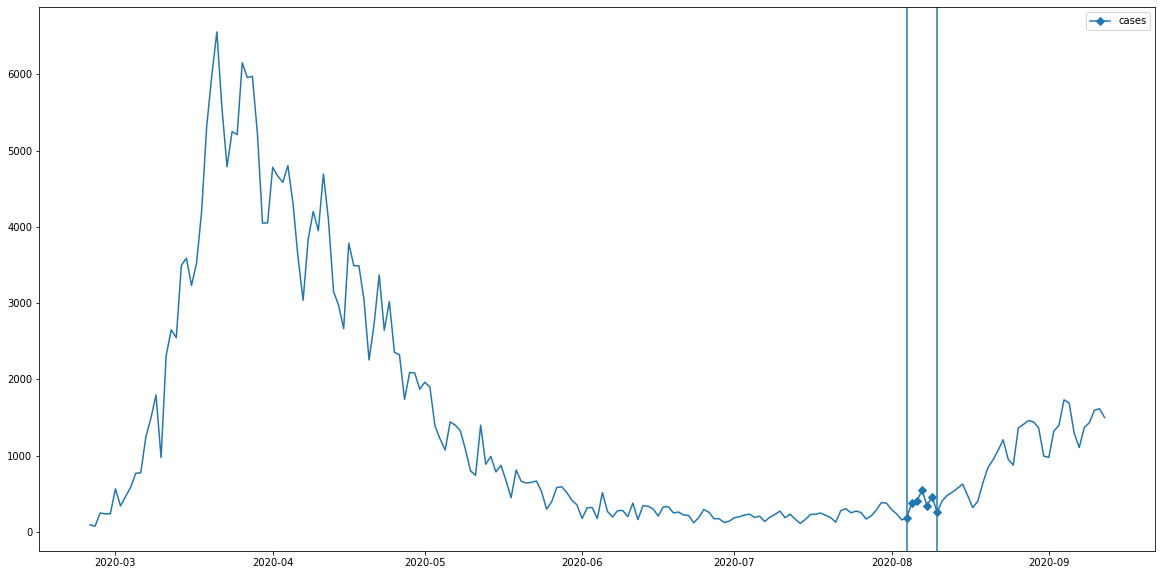

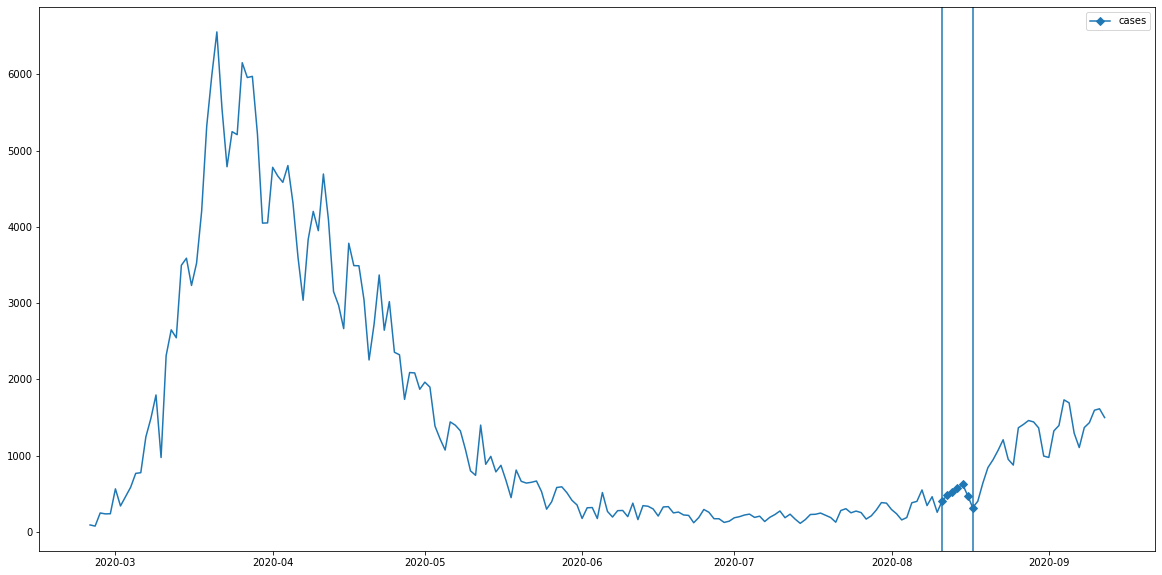

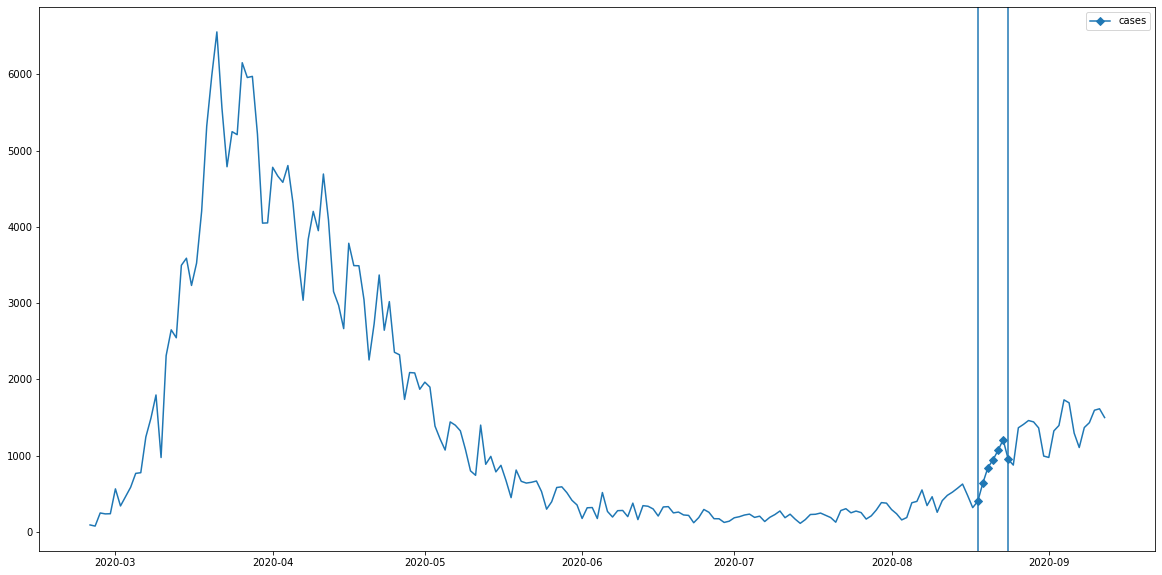

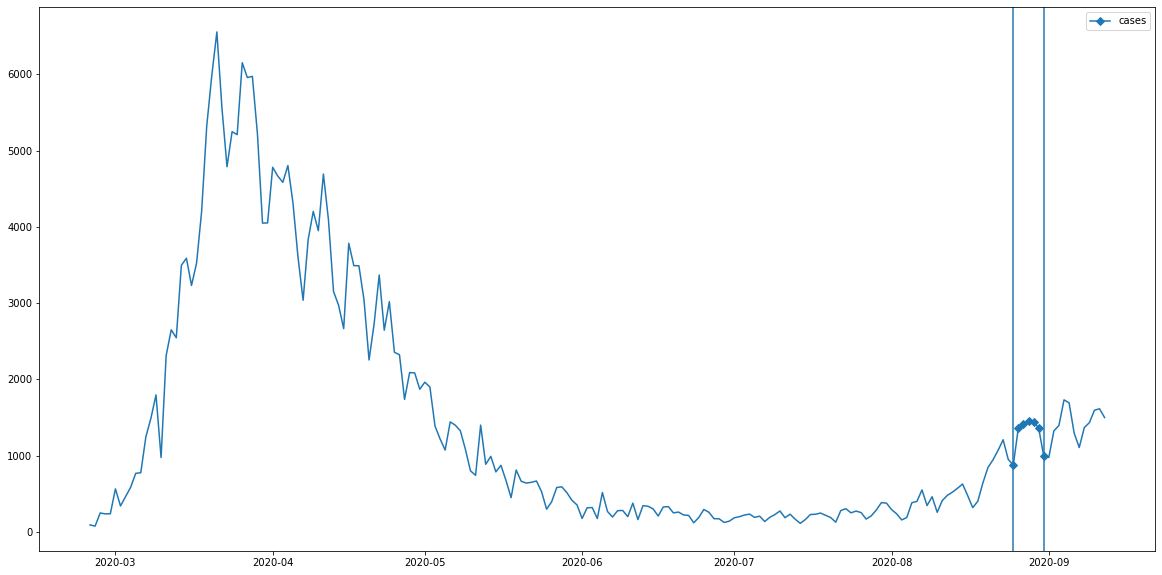

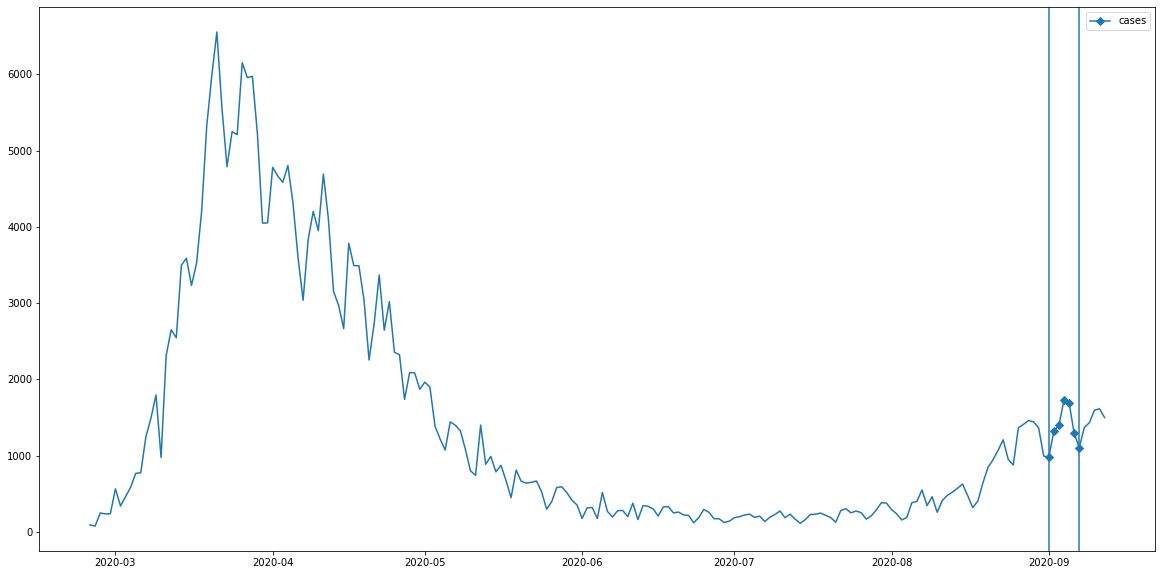

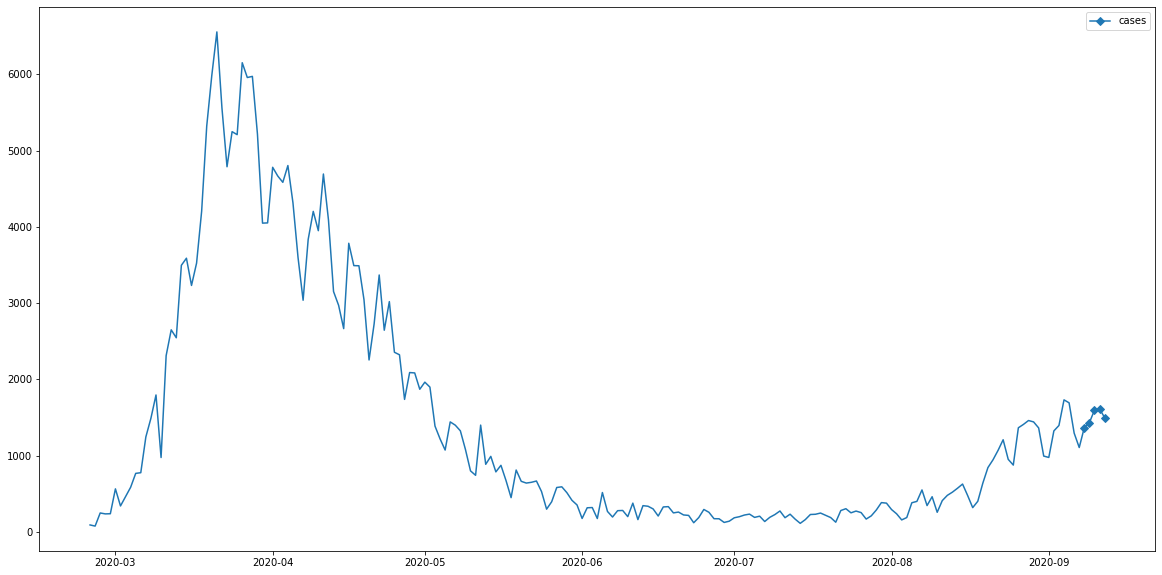

overlapped
total outliers: 194


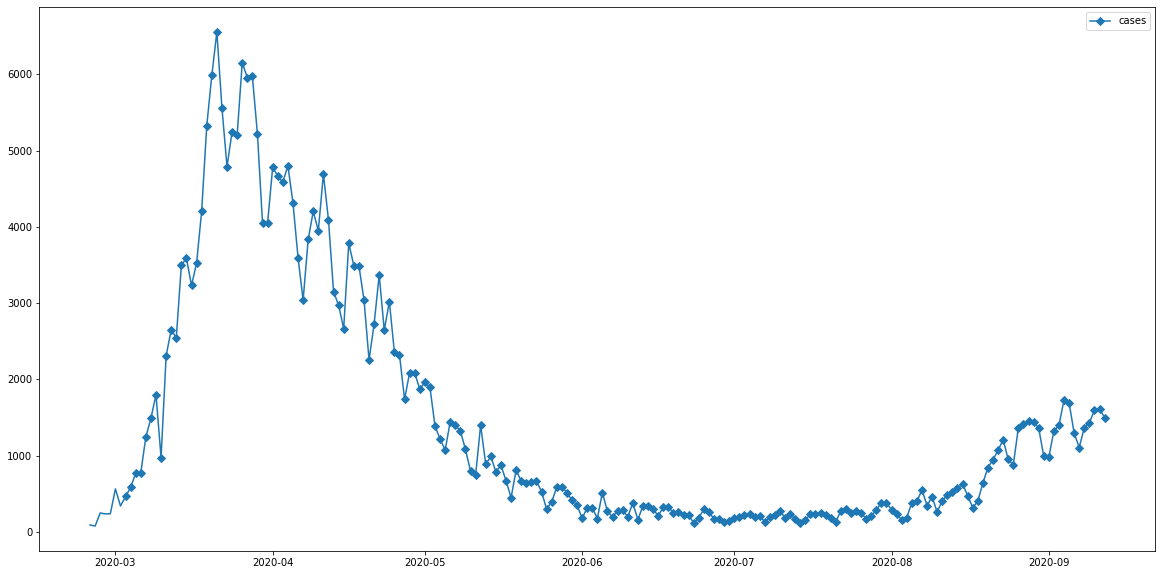

CPU times: user 14.5 s, sys: 3.04 s, total: 17.5 s
Wall time: 12.4 s


In [49]:

%%time
#fit on past, predict on current week with timestamp as input
from sklearn.ensemble import IsolationForest
dataset = datasets[dataset_number]
dataset_no_country = dataset[dataset['country']==country_code].copy().drop('country', axis='columns')
dataset_with_time = dataset_no_country.copy()
dataset_with_time['time']= dataset_with_time.index.values
dataset_with_time['time'] = dataset_with_time['time'].map(to_epoch)
dataset_with_time_no_deaths = dataset_with_time.copy().drop('deaths', axis='columns')
dataset_no_country_no_deaths = dataset_no_country.copy().drop('deaths', axis='columns')
#split in chuncks of x days
chunck_size = 7
chuncks = split_dataframe(dataset_with_time_no_deaths, chunck_size)
total_indices = []
for index, current in enumerate(chuncks[1:], start=1):
    until_current = join_dataframe(chuncks[:index])
    clf = IsolationForest(random_state=0).fit(until_current)
    pred = clf.predict(current).tolist()
    indices = [num + index * chunck_size for num, element in enumerate(pred) if element == -1]
    total_indices.extend(indices)
    vertical_marks = []
    pyplot.plot(dataset_no_country_no_deaths, '-D', markevery=indices)
    try:
        start_incides = index * chunck_size
        end_incides = ( index + 1 ) * chunck_size - 1 
        vertical_marks = [dataset_no_country_no_deaths.iloc[start_incides].name, dataset_no_country_no_deaths.iloc[end_incides].name]
        pyplot.axvline(x=vertical_marks[0])
        pyplot.axvline(x=vertical_marks[1])
    except:
        pass
    pyplot.legend(['cases'])
    pyplot.show()
    
print("overlapped")
print(f"total outliers: {len(total_indices)}")
pyplot.plot(dataset_no_country_no_deaths, '-D', markevery=total_indices)
pyplot.legend(['cases'])
pyplot.show()

overlapped
total outliers: 86


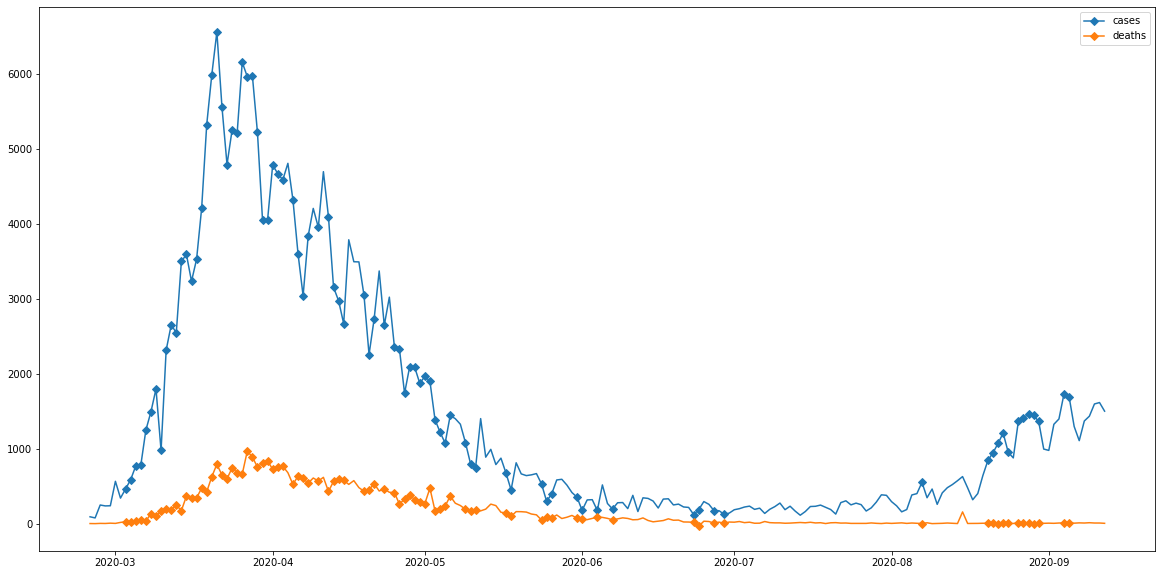

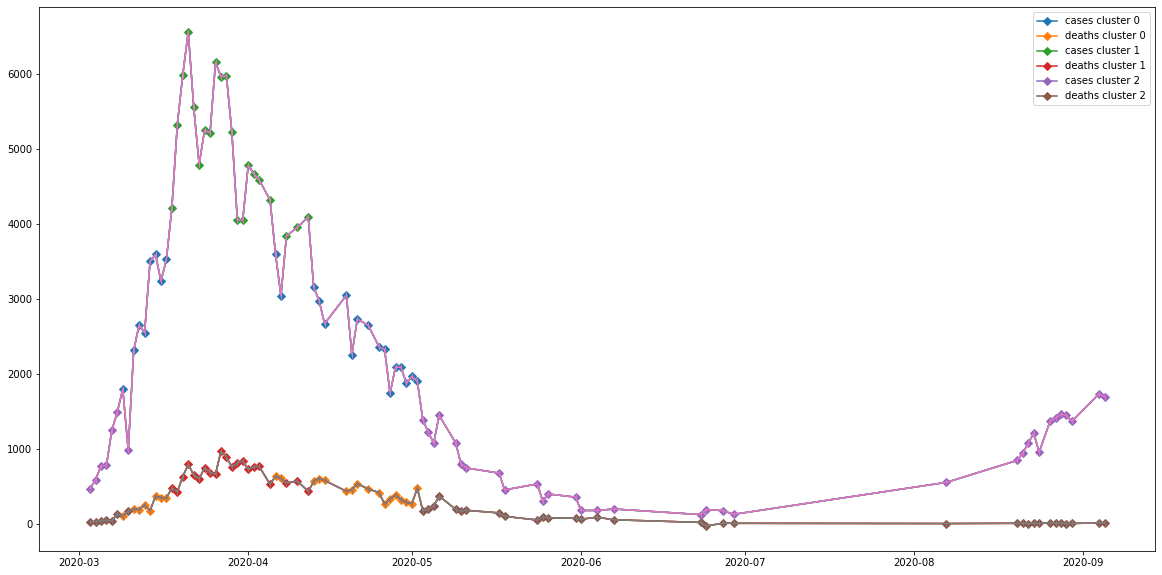

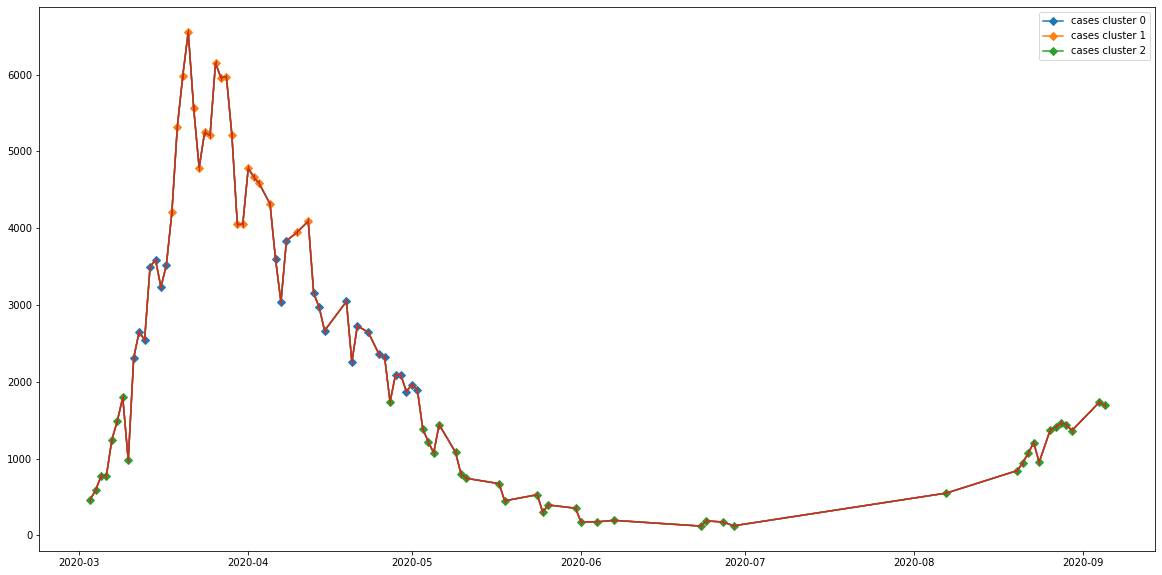

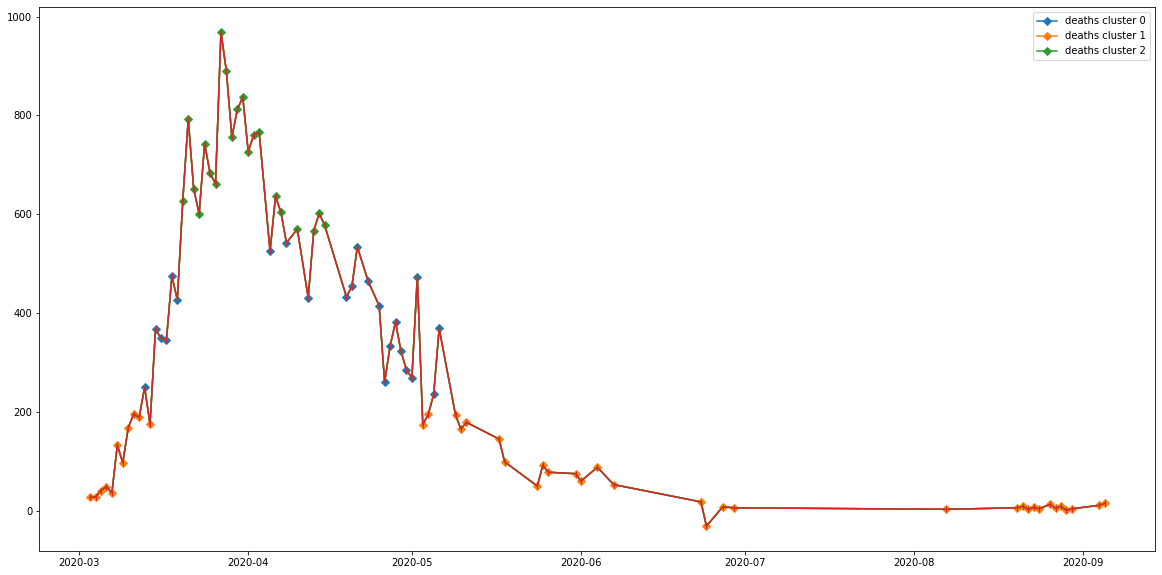

CPU times: user 5.69 s, sys: 58.9 ms, total: 5.75 s
Wall time: 5.75 s


In [82]:
%%time
#fit on past, predict on current week + n clusters
cluster_nr = 3
from sklearn.ensemble import IsolationForest
dataset = datasets[dataset_number]
dataset_no_country = dataset[dataset['country']==country_code].copy().drop('country', axis='columns')
#split in chuncks of x days
chunck_size = 7
chuncks = split_dataframe(dataset_no_country, chunck_size)
total_indices = []
for index, current in enumerate(chuncks[1:], start=1):
    until_current = join_dataframe(chuncks[:index])
    clf = IsolationForest(random_state=0).fit(until_current)
    pred = clf.predict(current).tolist()
    indices = [num + index * chunck_size for num, element in enumerate(pred) if element == -1]
    total_indices.extend(indices)
    vertical_marks = []
#     pyplot.plot(dataset_no_country, '-D', markevery=indices)
#     try:
#         start_incides = index * chunck_size
#         end_incides = ( index + 1 ) * chunck_size - 1 
#         vertical_marks = [dataset_no_country.iloc[start_incides].name, dataset_no_country.iloc[end_incides].name]
#         pyplot.axvline(x=vertical_marks[0])
#         pyplot.axvline(x=vertical_marks[1])
#     except:
#         pass
#     pyplot.legend(['cases', 'deaths'])
#     pyplot.show()
    
print("overlapped")
print(f"total outliers: {len(total_indices)}")
pyplot.plot(dataset_no_country, '-D', markevery=total_indices)
pyplot.legend(['cases', 'deaths'])
pyplot.show()

# cluster by Kmeans on all
anomaly =  dataset_no_country.copy()
from sklearn.cluster import KMeans
anomaly = anomaly.iloc[total_indices]
kmeans = KMeans(n_clusters=cluster_nr, random_state=0).fit(anomaly)
anomaly_cluster = []
for index_cluster in range(0, cluster_nr):
    anomaly_cluster.append([index for index, element in enumerate(kmeans.labels_) if element == index_cluster])
legend = []
for index_cluster in range(0, cluster_nr):
    pyplot.plot(anomaly, '-D', markevery=anomaly_cluster[index_cluster])
    legend.append(f'cases cluster {index_cluster}')
    legend.append(f"deaths cluster {index_cluster}")
pyplot.plot(anomaly, '-|')
pyplot.legend(legend)
pyplot.show()

# cluster by Kmeans on cases
anomaly =  dataset_no_country.copy()
anomaly =  anomaly.drop('deaths', axis='columns')
from sklearn.cluster import KMeans
anomaly = anomaly.iloc[total_indices]
kmeans = KMeans(n_clusters=cluster_nr, random_state=0).fit(anomaly)
anomaly_cluster = []
for index_cluster in range(0, cluster_nr):
    anomaly_cluster.append([index for index, element in enumerate(kmeans.labels_) if element == index_cluster])
legend = []
for index_cluster in range(0, cluster_nr):
    pyplot.plot(anomaly, '-D', markevery=anomaly_cluster[index_cluster])
    legend.append(f'cases cluster {index_cluster}')
pyplot.plot(anomaly, '-|')
pyplot.legend(legend)
pyplot.show()

# cluster by Kmeans on deaths
anomaly =  dataset_no_country.copy()
anomaly =  anomaly.drop('cases', axis='columns')
from sklearn.cluster import KMeans
anomaly = anomaly.iloc[total_indices]
kmeans = KMeans(n_clusters=cluster_nr, random_state=0).fit(anomaly)
anomaly_cluster = []
for index_cluster in range(0, cluster_nr):
    anomaly_cluster.append([index for index, element in enumerate(kmeans.labels_) if element == index_cluster])
legend = []
for index_cluster in range(0, cluster_nr):
    pyplot.plot(anomaly, '-D', markevery=anomaly_cluster[index_cluster])
    legend.append(f"deaths cluster {index_cluster}")
pyplot.plot(anomaly, '-|')
pyplot.legend(legend)
pyplot.show()